# GAの基本的な使い方(R編)
install.packages('GA')  
でパッケージをインストールしてください。  
↓パッケージGAの使い方  
https://www.jstatsoft.org/article/view/v053i04/v53i04.pdf  

https://cran.r-project.org/web/packages/GA/GA.pdf

In [1]:
library(GA)

Warning message:
“package ‘GA’ was built under R version 3.4.4”Loading required package: foreach
Loading required package: iterators
Warning message:
“package ‘iterators’ was built under R version 3.4.4”Package 'GA' version 3.1.1
Type 'citation("GA")' for citing this R package in publications.


GAのモードは3種類あります。
"real-valued", "binary", "permutation"の3つです。  
つまり、実数値、バイナリ、順列の3つです。
交差方法が異なるので、適切なものを選ばないといけません。
一つ一つ適用例をみていきます。

# 実数型
## 曲線の最小値を求める問題
テストケースとして、|x| + cos(x)の最小値を求める問題を解いてみます。
GAのパッケージとして、評価関数が大きな値が評価されるので、評価関数は正負反転したこの関数そのものであり、解の表現として、染色体は1つです。  
この場合、評価関数と最適化したいものが同じです。

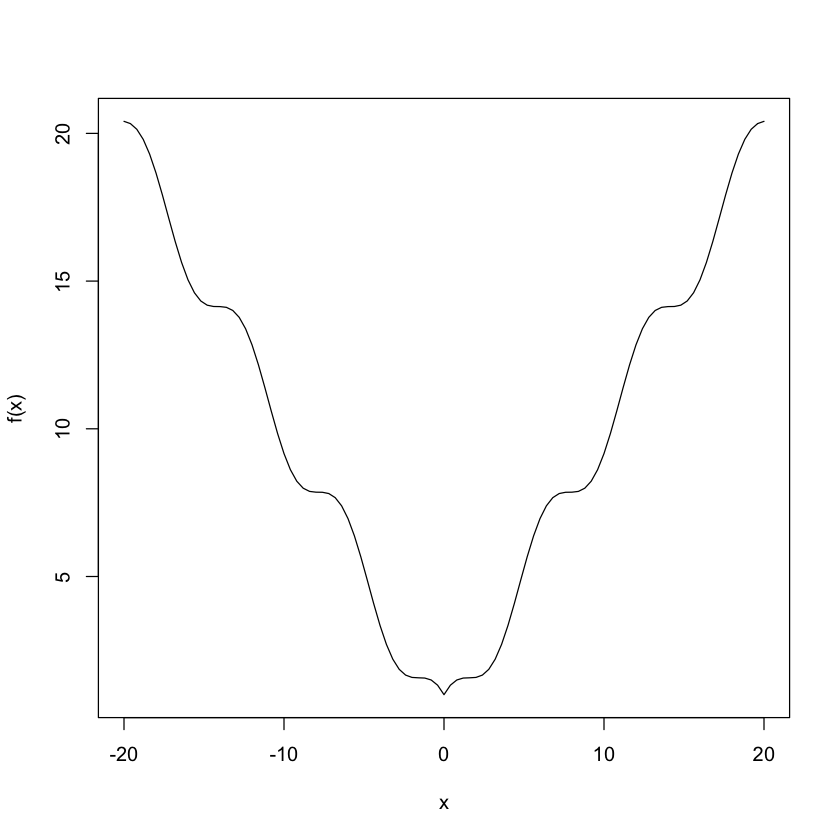

In [2]:
# |x| + cos(x)で実験(p11)
f <- function(x){abs(x) + cos(x)}
min <- -20
max <- +20
curve(f, min, max)

In [3]:
fitness <- function(x){-f(x)}
GA1 <- ga(type = "real-valued", fitness = fitness, lower = min, upper = max, 
           popSize = 50, maxiter = 100,optim = TRUE )

### 引数の説明
typeはタイプ。  
fitnessは評価関数。  
lower,upperは、探索範囲の下限値と上限値  
popSizeは個体数。  
maxiterは進化する繰り返し数。  
optimは、局所探索をするかどうか。  
局所探索とは、近傍を探すというアルゴリズムを入れるかどうかである。
今回のものは近傍探索しないとたどり着けそうにないので、入れた。
局所探索のアルゴリズムは以下。  
1.解を一つランダムに生成する。  
2.現在の解の近傍の内一つをある条件で選び近傍解とする。  
3.定義した条件を満たすなら、近傍解を現在の解と入れ換える。  
4.終了条件を満たすまで 2. 以下を繰り返す。  
詳しくは資料でもみてください。

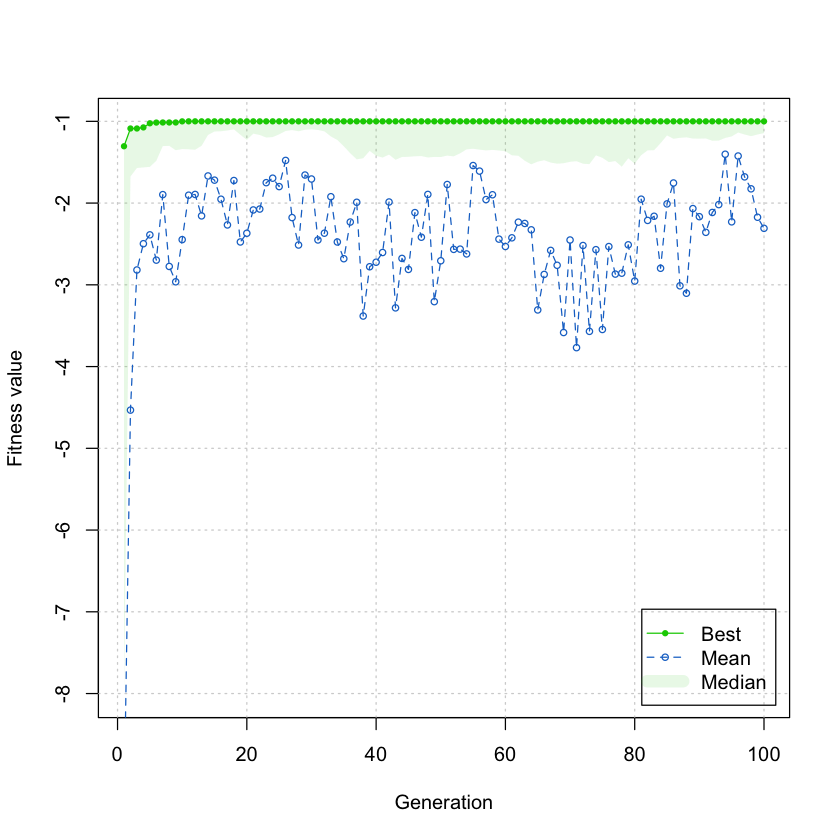

In [4]:
plot(GA1)

In [5]:
summary(GA1)

─ Genetic Algorithm ────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.8 
Mutation probability  =  0.1 
Search domain = 
       x1
lower -20
upper  20

GA results: 
Iterations             = 100 
Fitness function value = -1 
Solution = 
     x1
[1,]  0

In [6]:
# 最小値のx
GA1@solution

x1
[1,] 0

In [7]:
#　値
- GA1@fitnessValue

[1] 1

最小値を発見している模様。

## 染色体が1つだと寂しいので2つのやつをやる。
## 多峰性関数

多峰性関数は最小値ではない極値にハマりやすいので、最適化アルゴリズムのテストによく使われる。

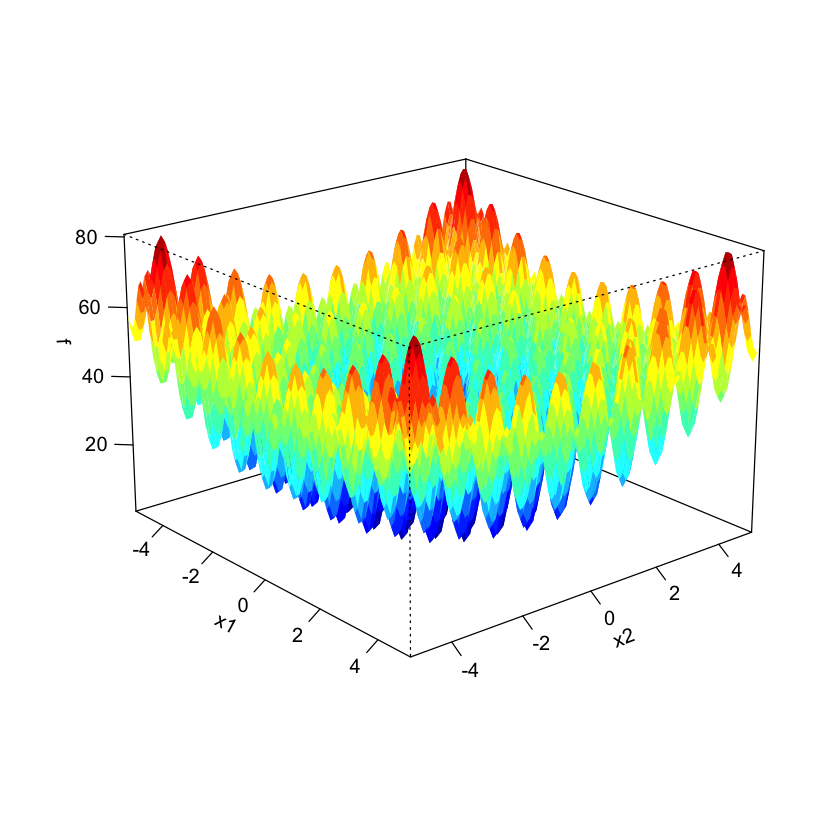

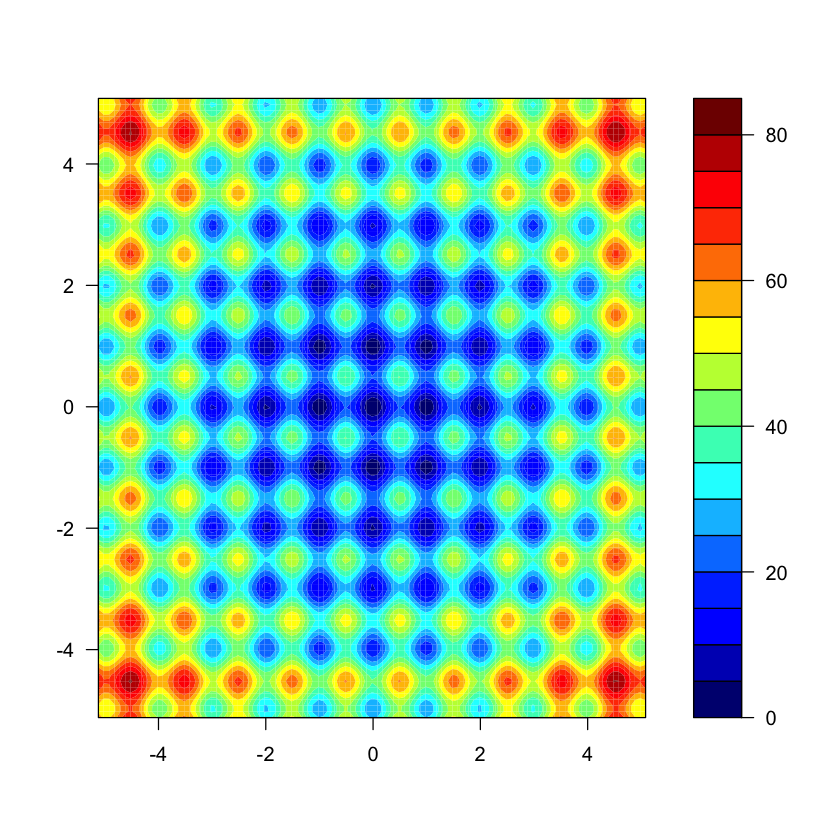

In [8]:
# よく最適化のテストに使われる多峰性関数
Rastrigin <- function(x1, x2){
    20 + x1^2 + x2^2 - 10*(cos(2*pi*x1) + cos(2*pi*x2))
}

x1 <- x2 <- seq(-5.12, 5.12, by = 0.1)
f <- outer(x1, x2, Rastrigin)
persp3D(x1, x2, f, theta = 50, phi = 20)
filled.contour(x1, x2, f, color.palette = jet.colors)

In [9]:
GA2 <- ga(type = "real-valued", fitness =  function(x){-Rastrigin(x[1], x[2])},
         lower = c(-5.12, -5.12), upper = c(5.12, 5.12),
         popSize = 50, maxiter = 100,optim=TRUE)

In [10]:
summary(GA2)

─ Genetic Algorithm ────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.8 
Mutation probability  =  0.1 
Search domain = 
         x1    x2
lower -5.12 -5.12
upper  5.12  5.12

GA results: 
Iterations             = 100 
Fitness function value = 0 
Solution = 
     x1 x2
[1,]  0  0

こういう関数は、局所探索をするとすごくうまくいく  
optim=FALSEだと意外とうまく行かない

# バイナリ型
0か1を取るバイナリ型のGAで問題を解いてみる  
## ナップサック問題

ナップサック問題とは、状況として、値段のついた物が色々あって、リュックに詰められる重さ(体積)が決まってます。その場合リュックの制限容量に対して最適な組み合わせで、値段が最大になるようにものを選んでいくと言う問題。  

In [11]:
# 4.7. Constrained optimization(p27)
# ナップサック問題
p <- c(6, 5, 8, 9, 6, 7, 3)  # price list
w <- c(2, 3, 6, 7, 5, 9, 4)  # weight list
W <- 9  # maximum weight capacity

In [12]:
knapsack <- function(x) {
    f <- sum(x * p)
    penalty <- sum(w) * abs(sum(x * w)-W)
    f - penalty
}

In [13]:
GA3 <- ga(type = "binary", fitness = knapsack, nBits = length(w),
         maxiter = 1000, run = 200, popSize = 20)

summary(GA3)

─ Genetic Algorithm ────────── 

GA settings: 
Type                  =  binary 
Population size       =  20 
Number of generations =  1000 
Elitism               =  1 
Crossover probability =  0.8 
Mutation probability  =  0.1 

GA results: 
Iterations             = 349 
Fitness function value = 15 
Solution = 
     x1 x2 x3 x4 x5 x6 x7
[1,]  1  0  0  1  0  0  0

## 特徴量抽出みたいなこと。

<適当な直訳>  
統計的モデリングにおけるバイナリＧＡの典型的な用途はサブセット選択である。一組のｐ個の予測子が与えられると、サブセット選択は、応答変数の変動を説明するのに最も関連性のある予測子を識別することを目的とする。これは未知のパラメータの節約を達成することを可能にし、より良い推定とより明確な回帰係数の解釈の両方をもたらします。サブセット選択の問題は、1が予測子の存在を示し、0が所定の候補サブセットからの不在を示す、2進ストリングを使用してGAによって自然に処理することができます。候補サブセットの適合度は、AIC、BICなど、いくつかのモデル選択基準のうちの1つによって測定できます。

In [14]:
# type='binary'の問題でもう一個(p20)
# 4.5 Subset selection
data("fat", package = "UsingR")
mod <- lm(body.fat.siri ~ age + weight + height + neck + chest + abdomen +
          hip + thigh + knee + ankle + bicep + forearm + wrist, data = fat)
summary(mod)


Call:
lm(formula = body.fat.siri ~ age + weight + height + neck + chest + 
    abdomen + hip + thigh + knee + ankle + bicep + forearm + 
    wrist, data = fat)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1687  -2.8639  -0.1014   3.2085  10.0068 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -18.18849   17.34857  -1.048  0.29551    
age           0.06208    0.03235   1.919  0.05618 .  
weight       -0.08844    0.05353  -1.652  0.09978 .  
height       -0.06959    0.09601  -0.725  0.46925    
neck         -0.47060    0.23247  -2.024  0.04405 *  
chest        -0.02386    0.09915  -0.241  0.81000    
abdomen       0.95477    0.08645  11.044  < 2e-16 ***
hip          -0.20754    0.14591  -1.422  0.15622    
thigh         0.23610    0.14436   1.636  0.10326    
knee          0.01528    0.24198   0.063  0.94970    
ankle         0.17400    0.22147   0.786  0.43285    
bicep         0.18160    0.17113   1.061  0.28966    
forearm       0.45

In [15]:
x <- model.matrix(mod)[, -1]
y <- model.response(model.frame(mod))
# Then, the fitness function to be maximized can be defined as follows:
fitness <- function(string) {
    inc <- which(string == 1)
    X <- cbind(1, x[,inc])
    mod <- lm.fit(X, y)
    class(mod) <- "lm"
    -AIC(mod)
}

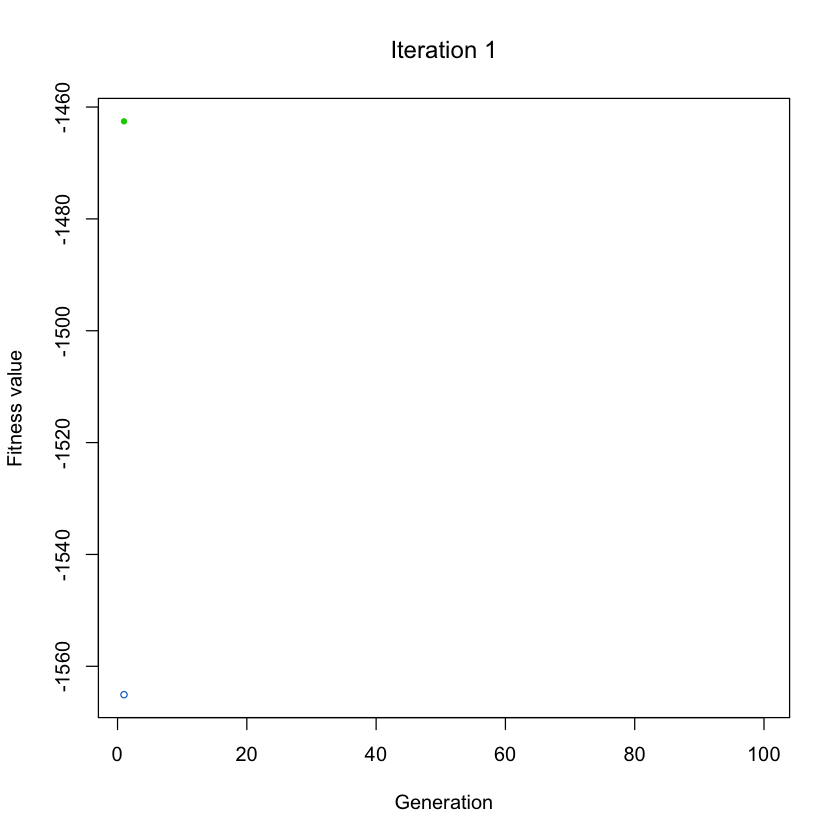

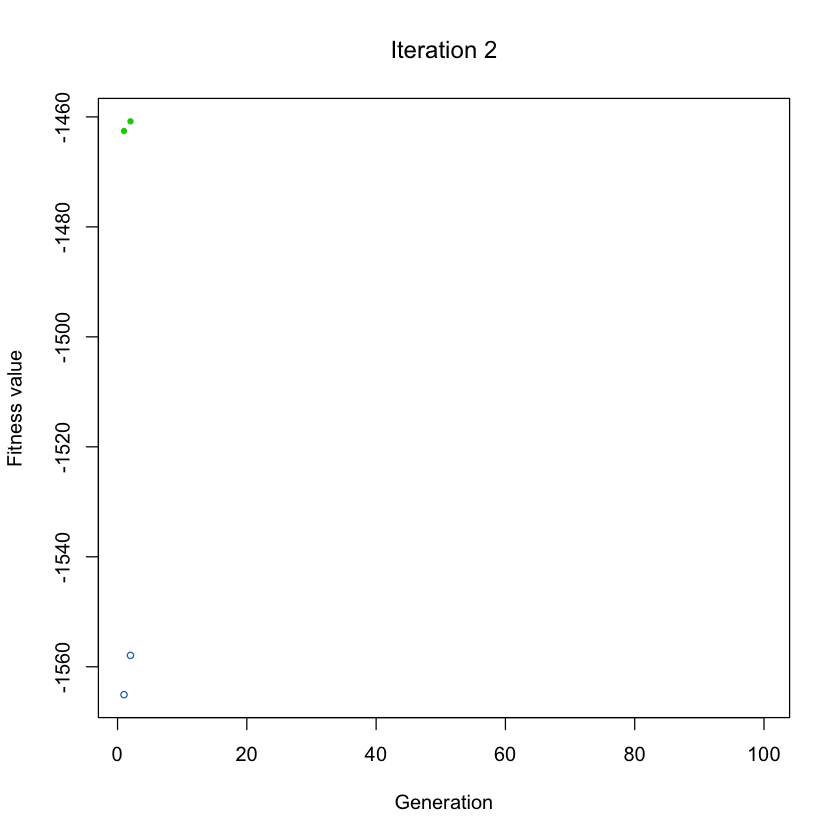

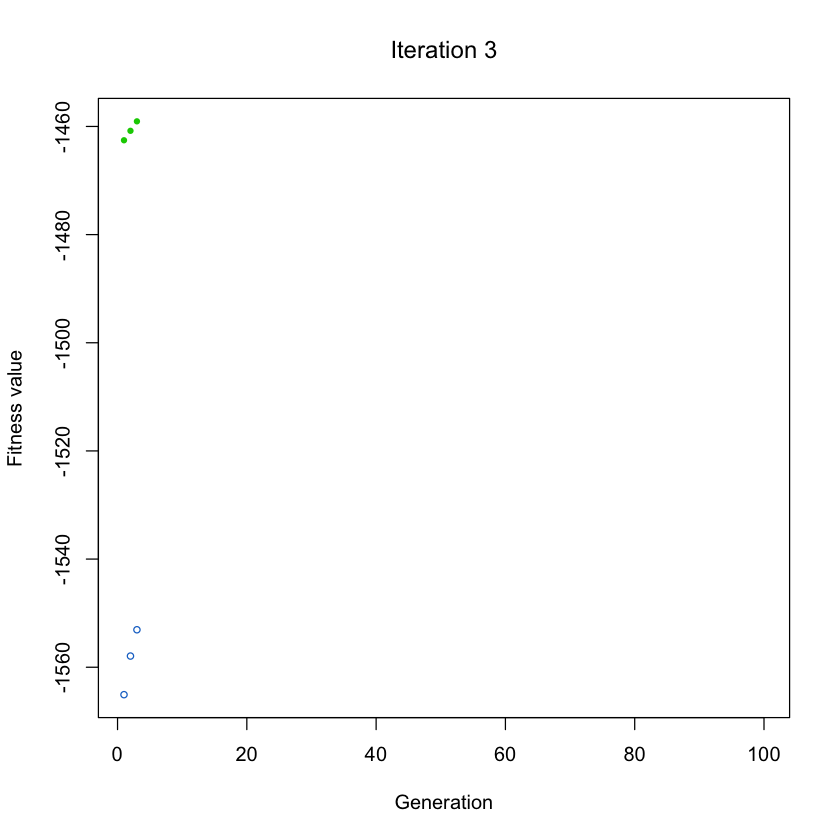

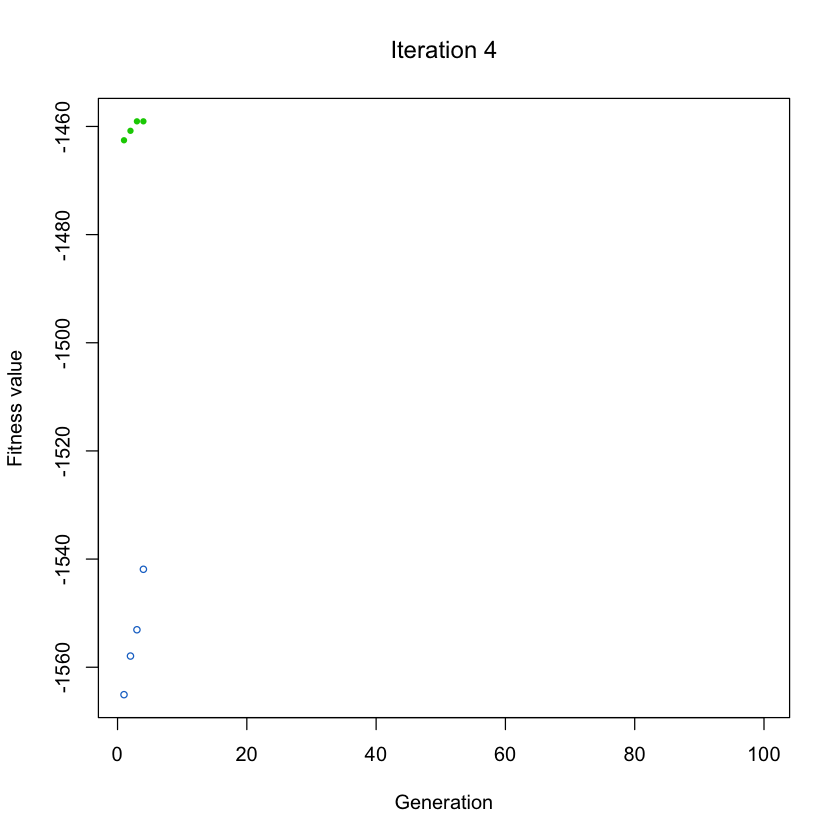

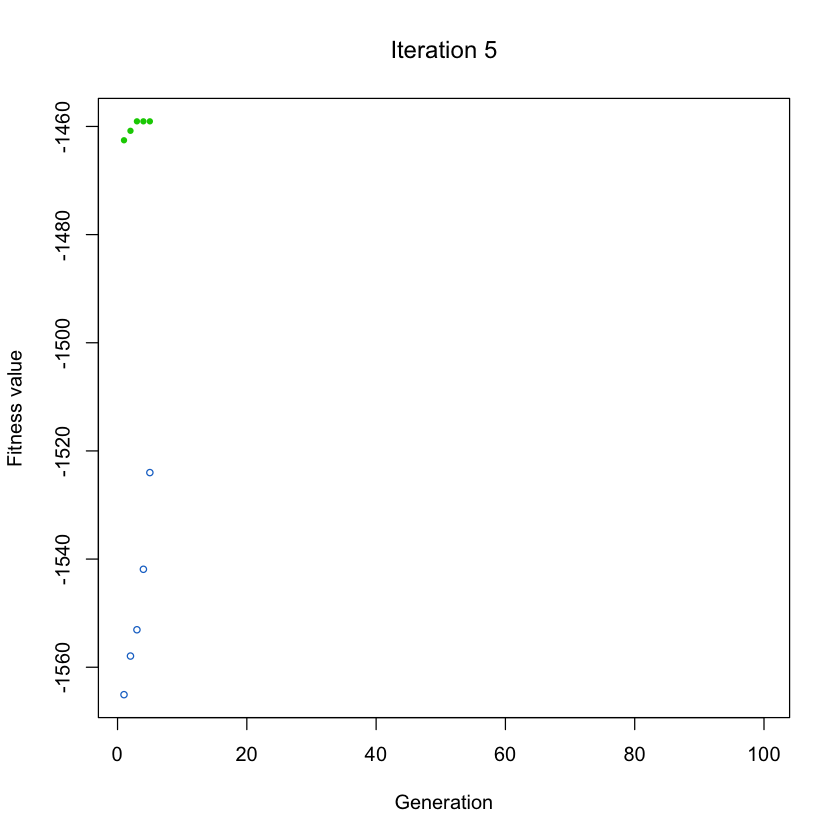

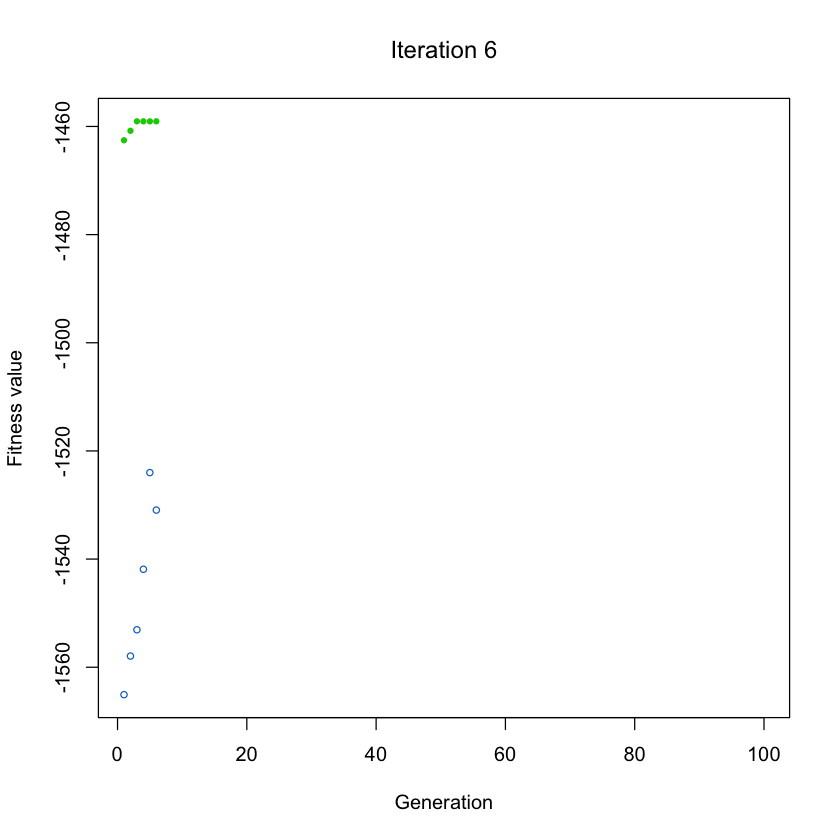

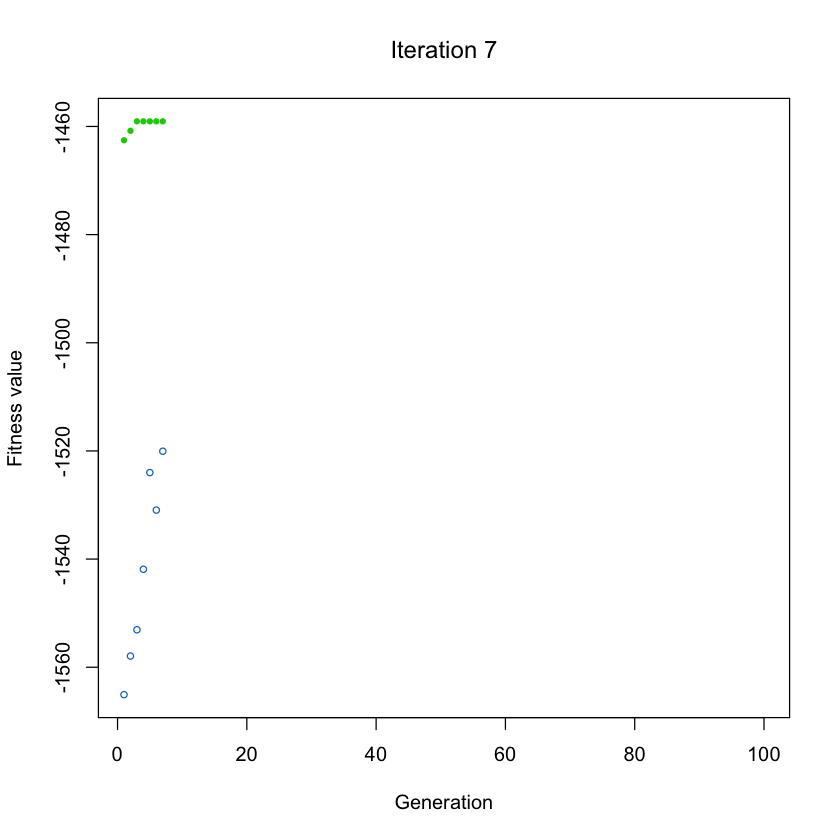

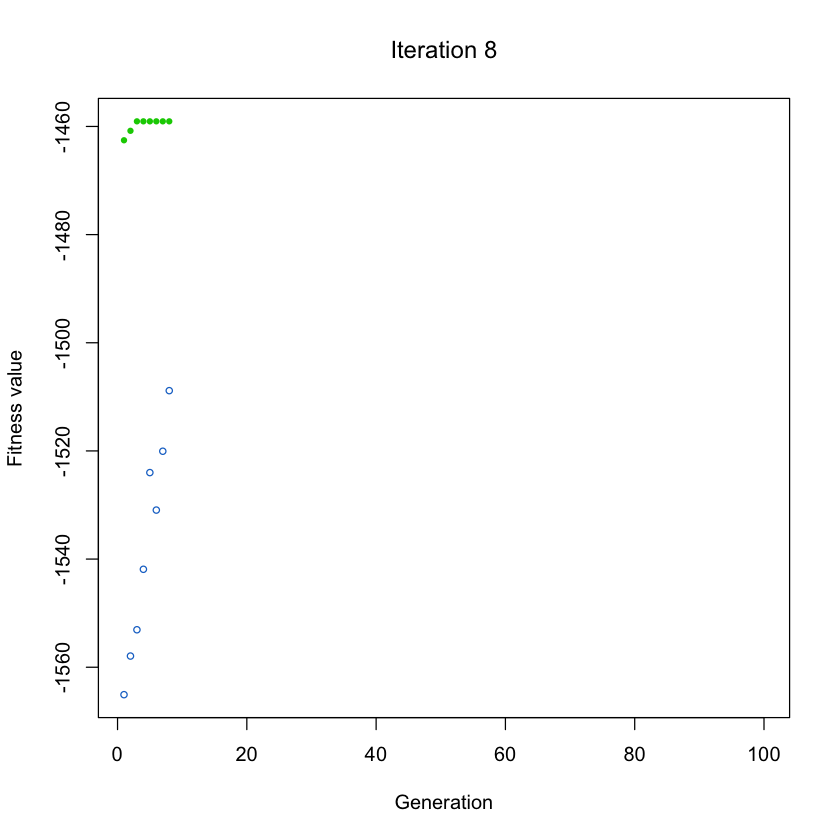

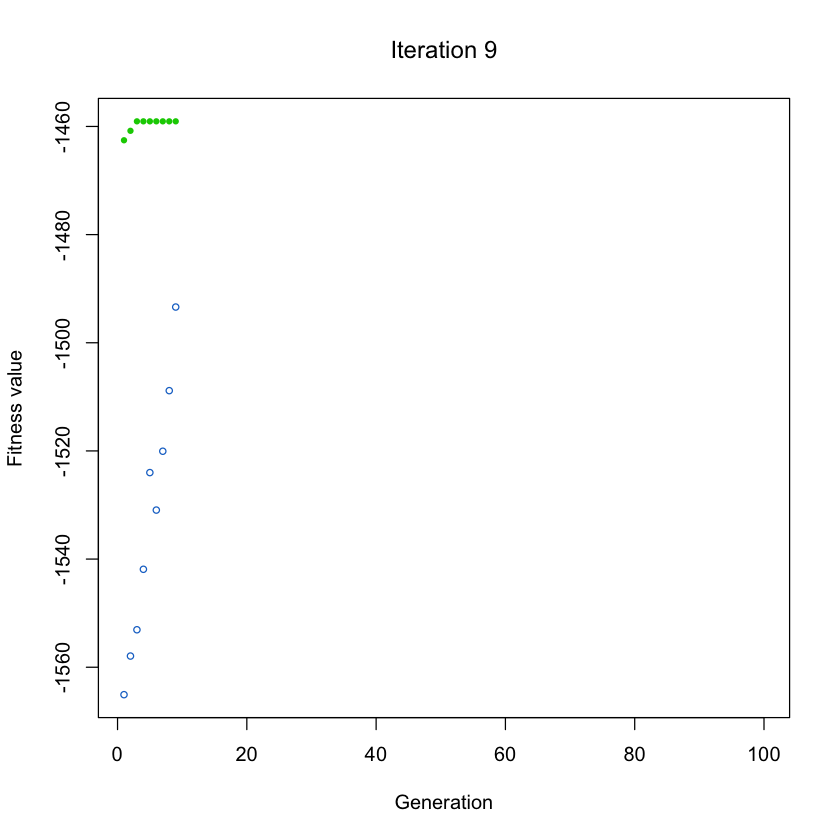

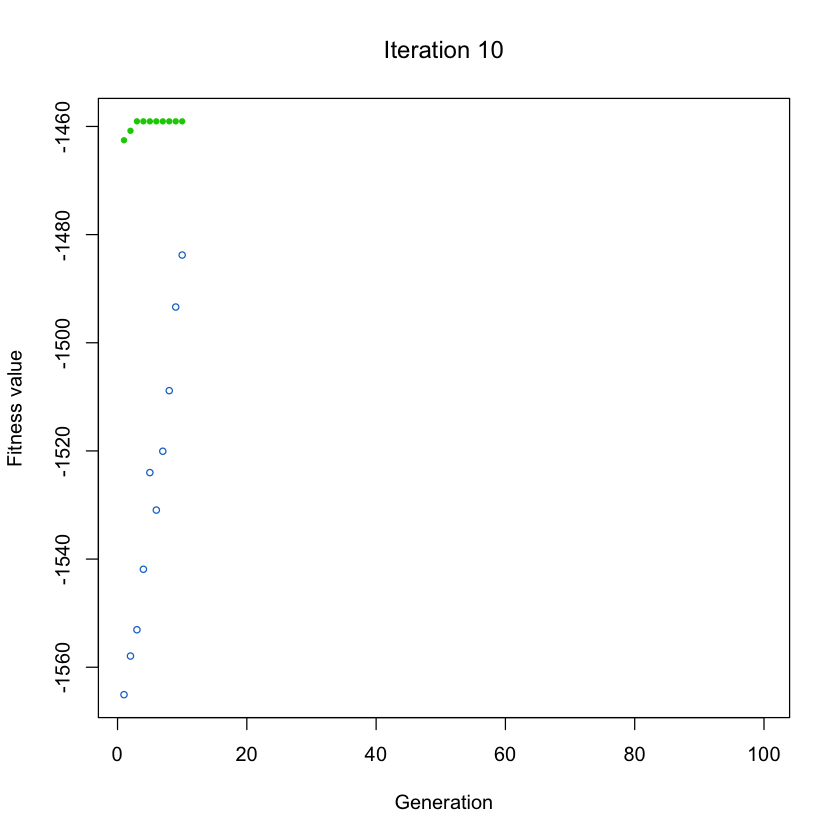

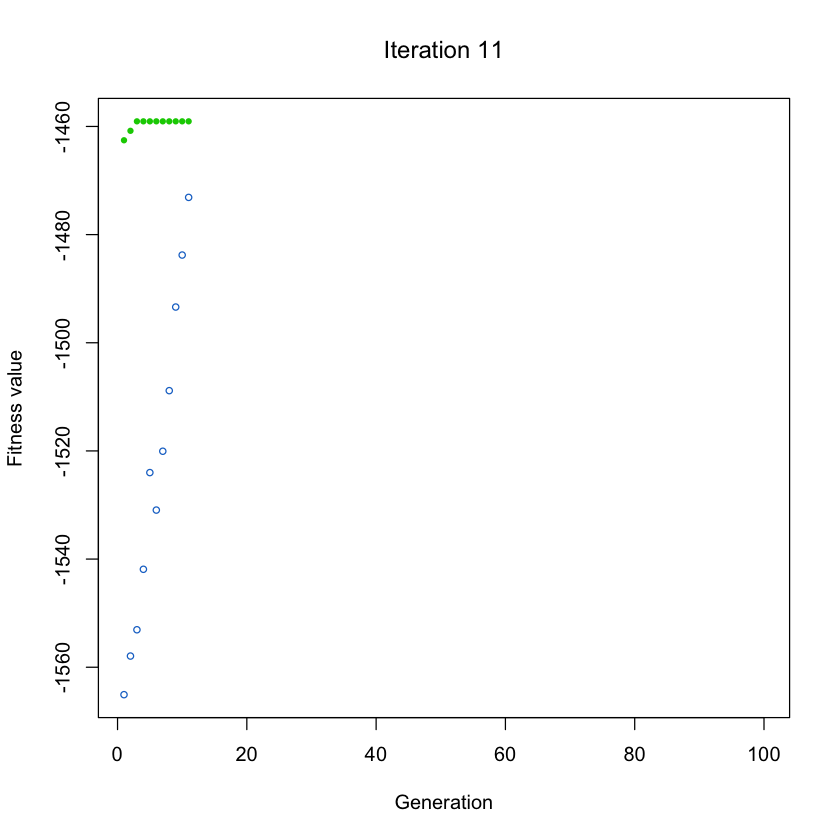

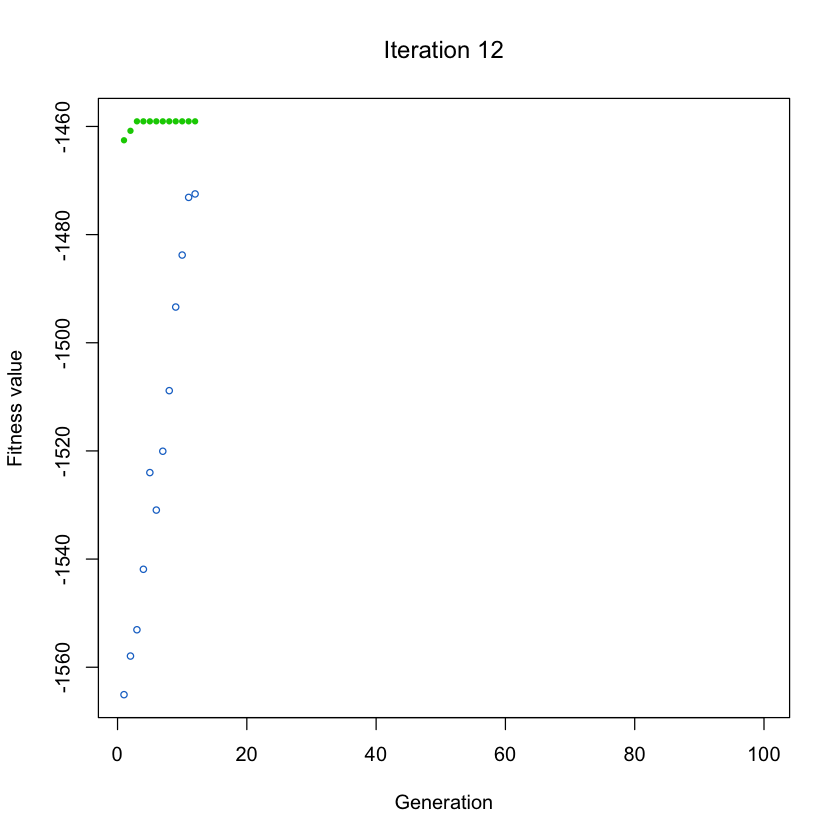

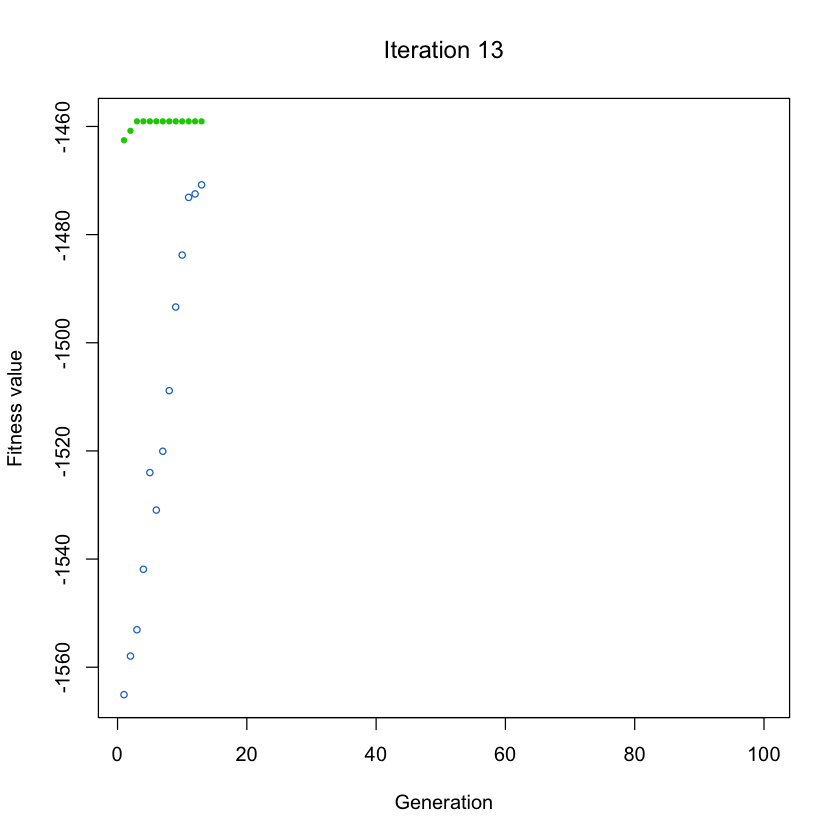

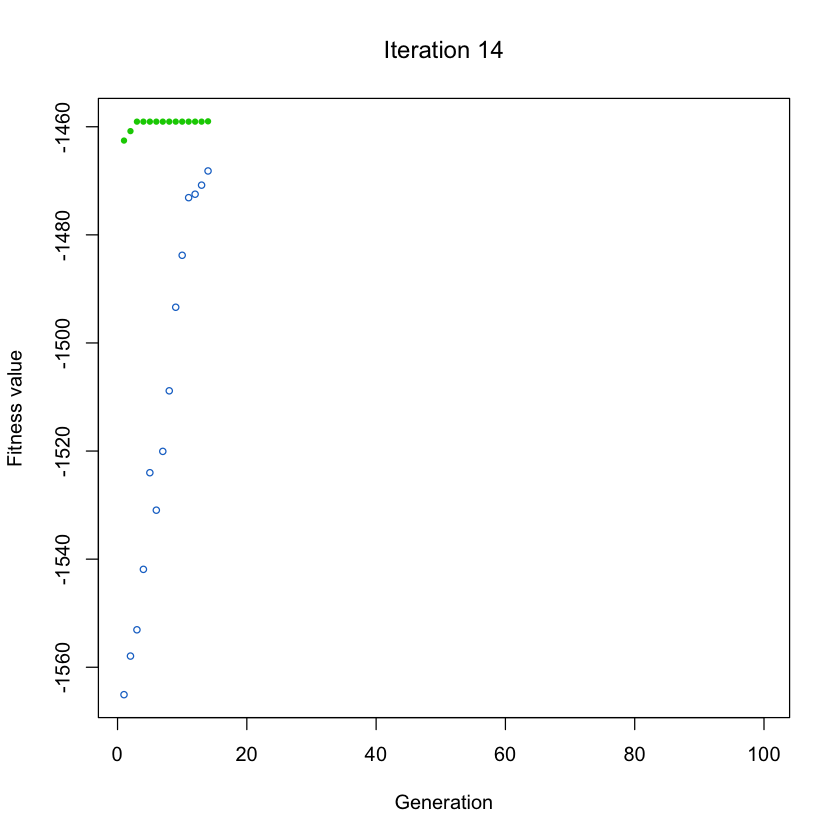

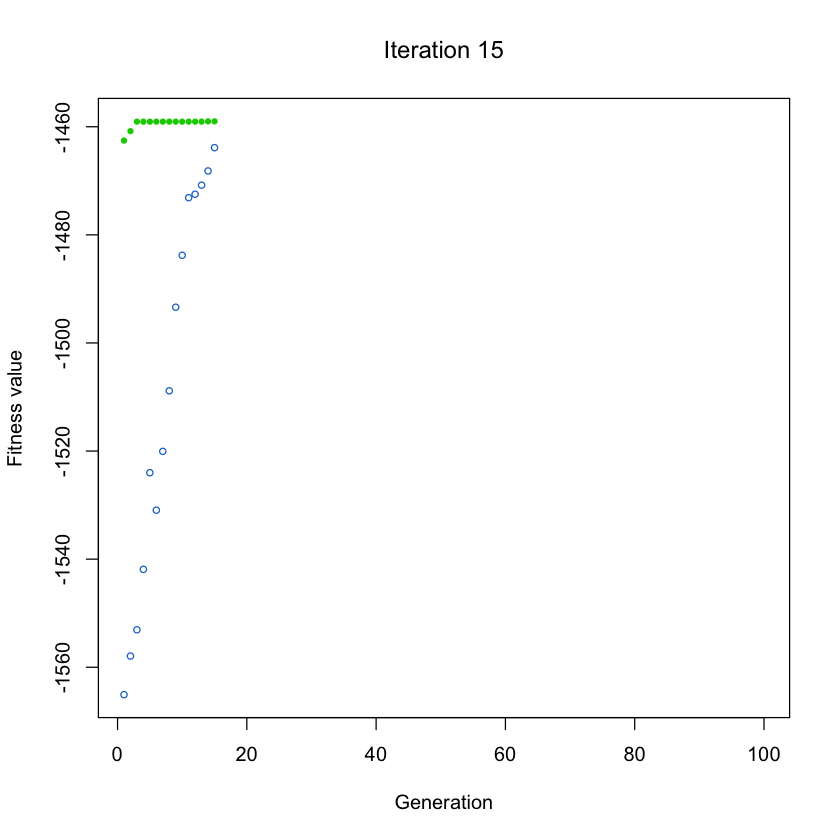

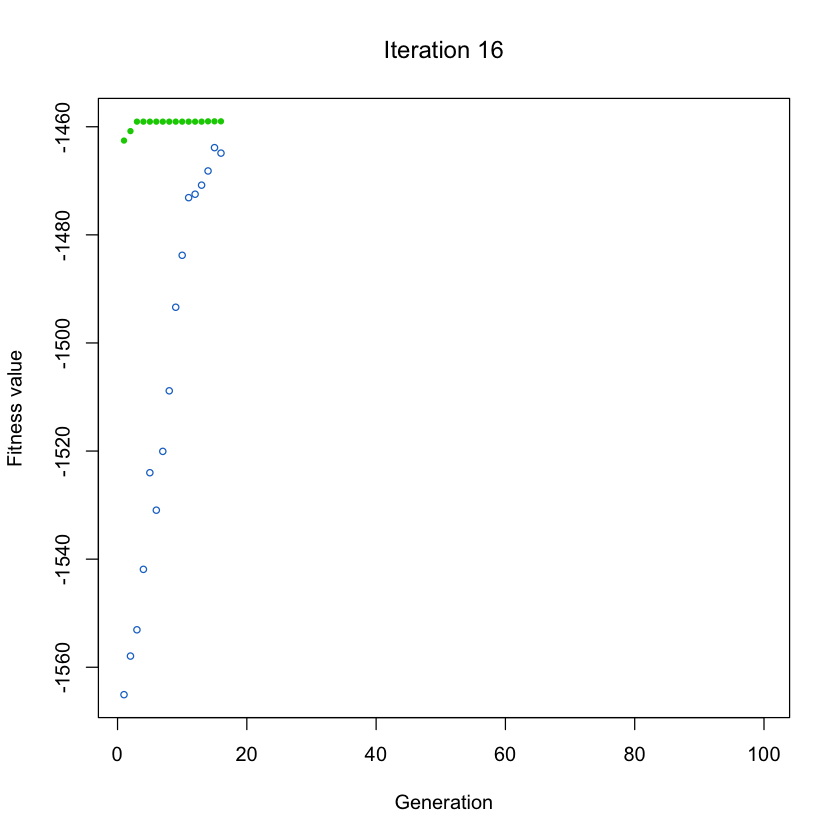

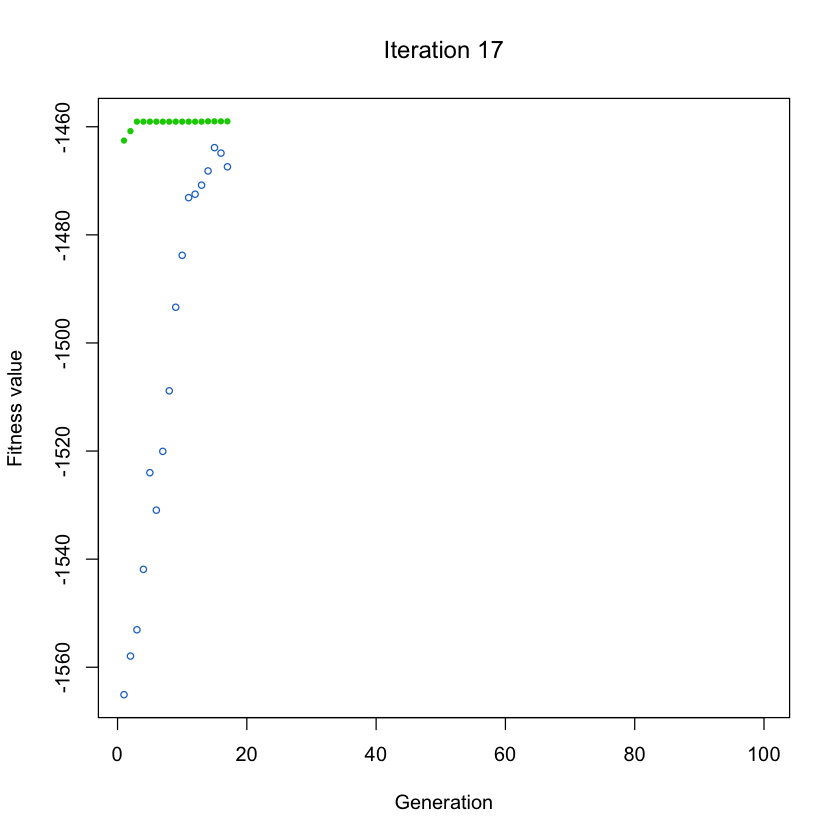

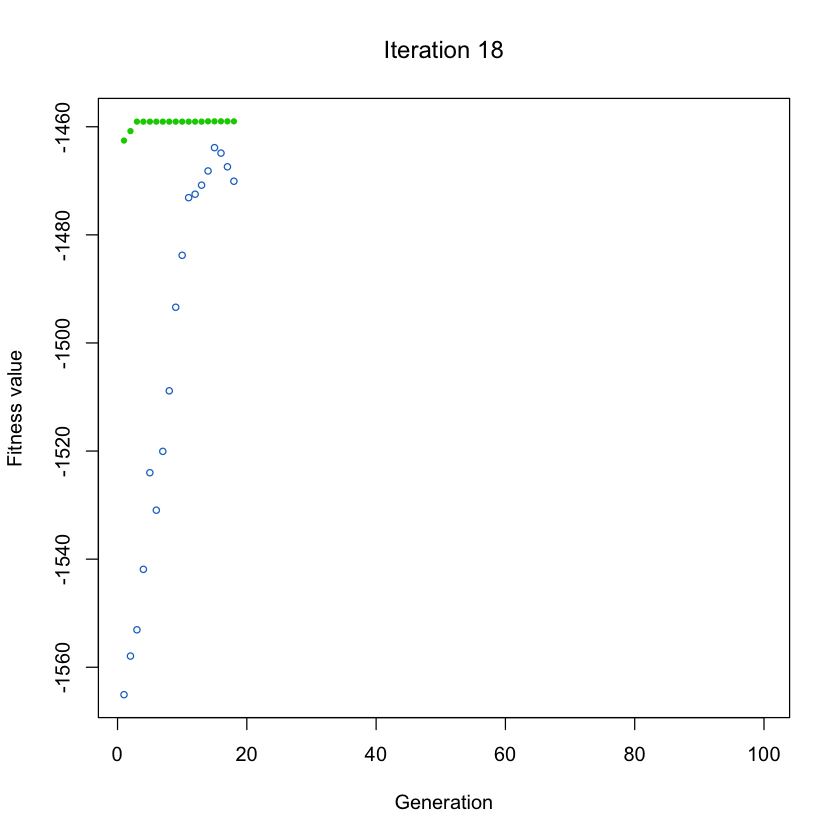

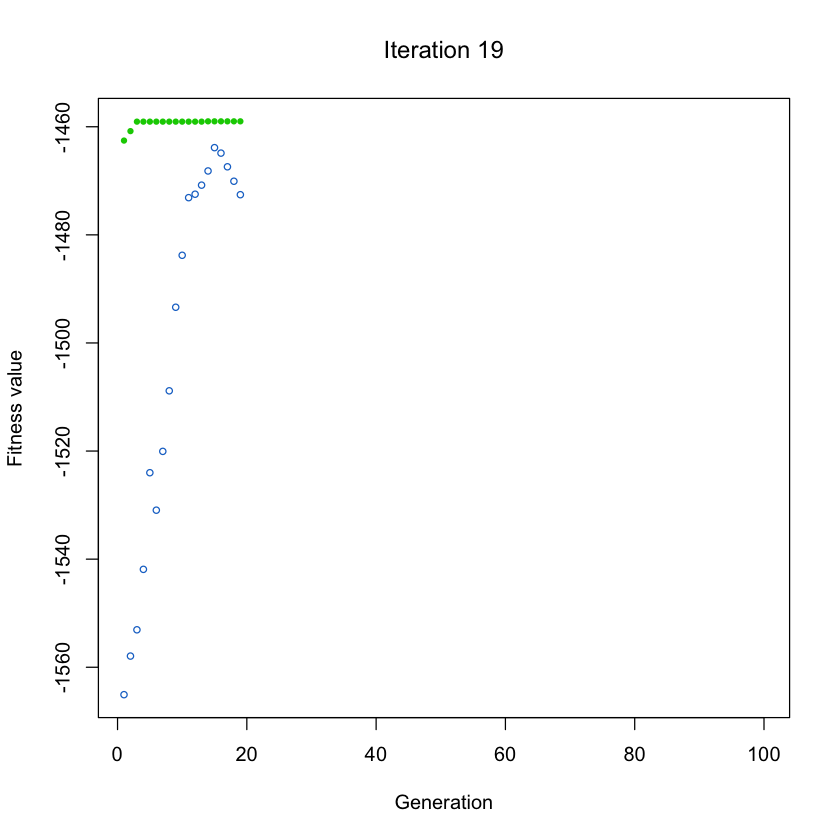

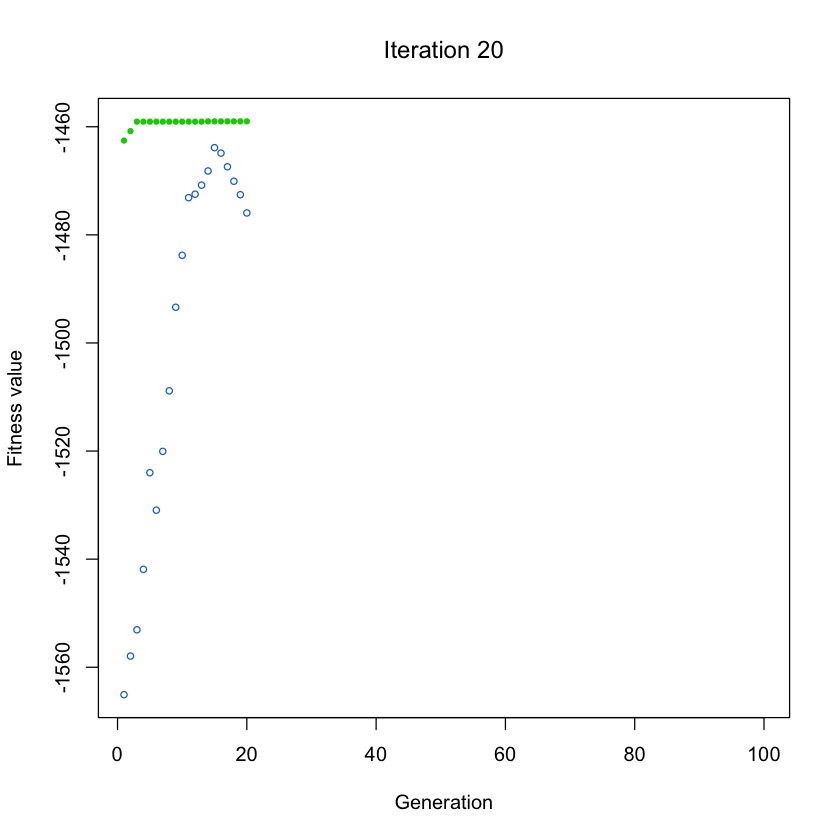

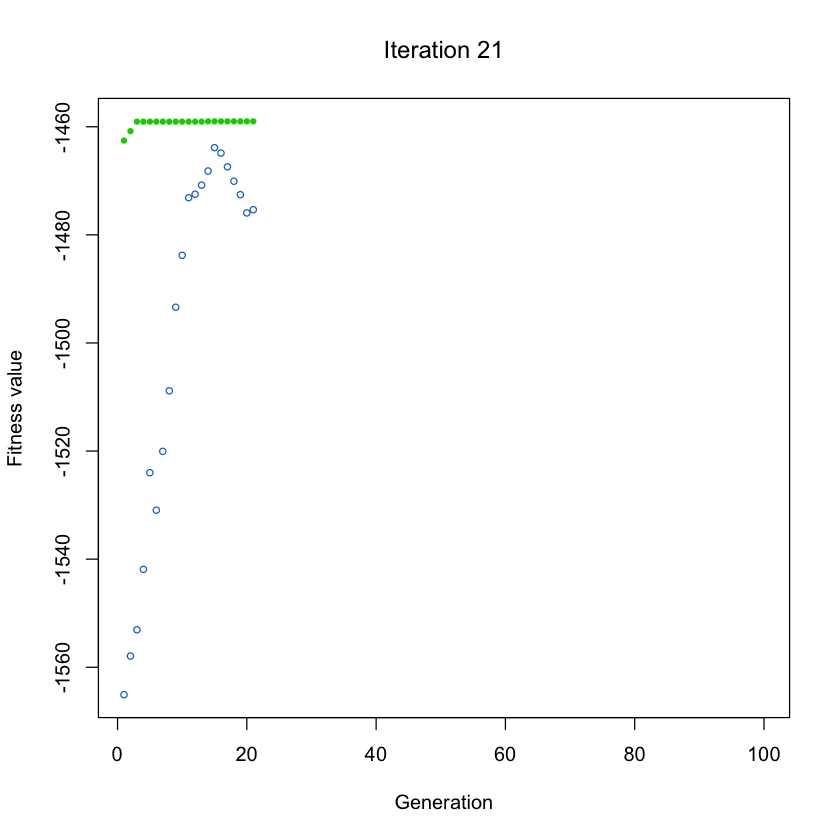

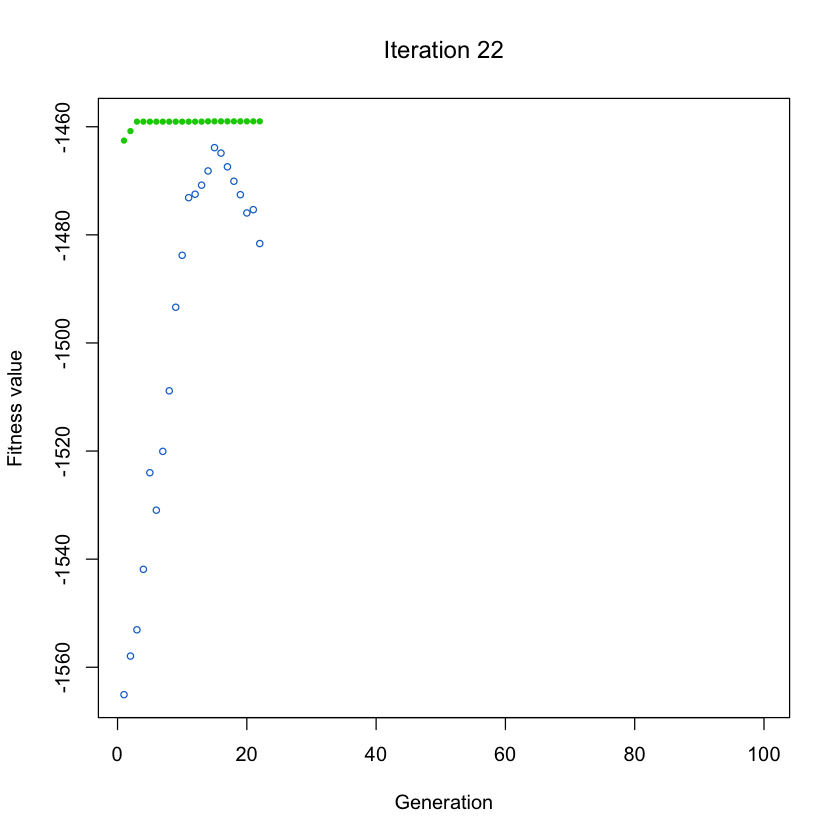

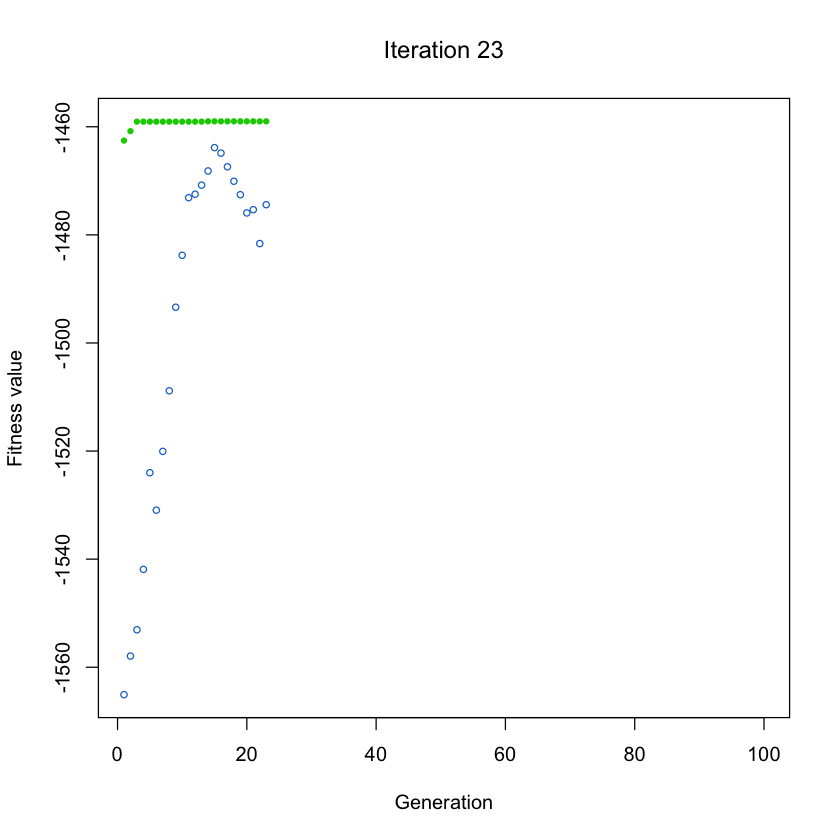

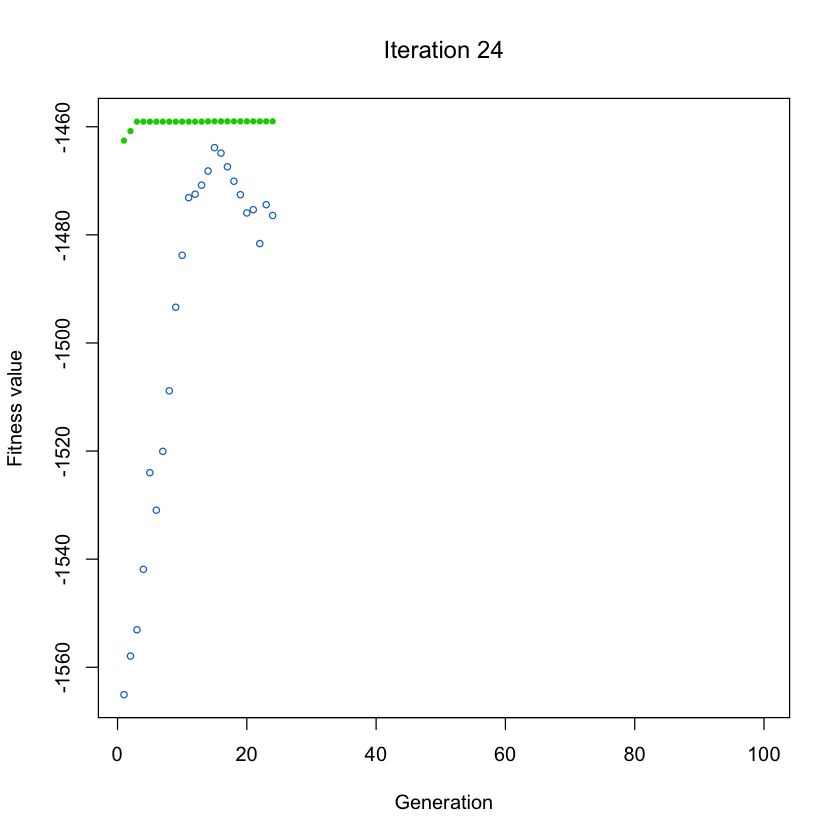

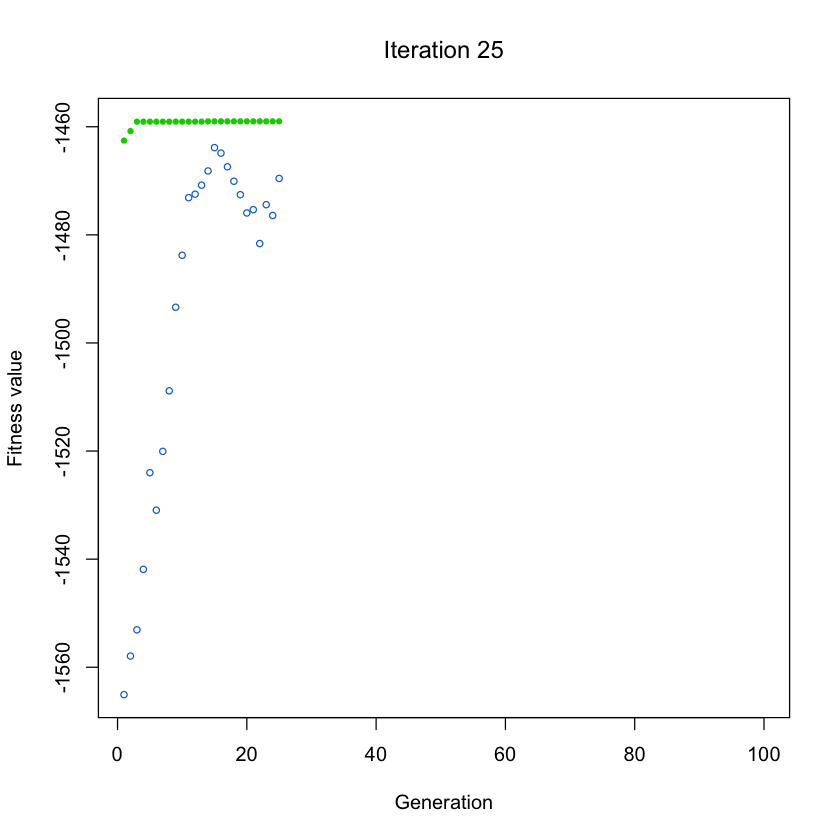

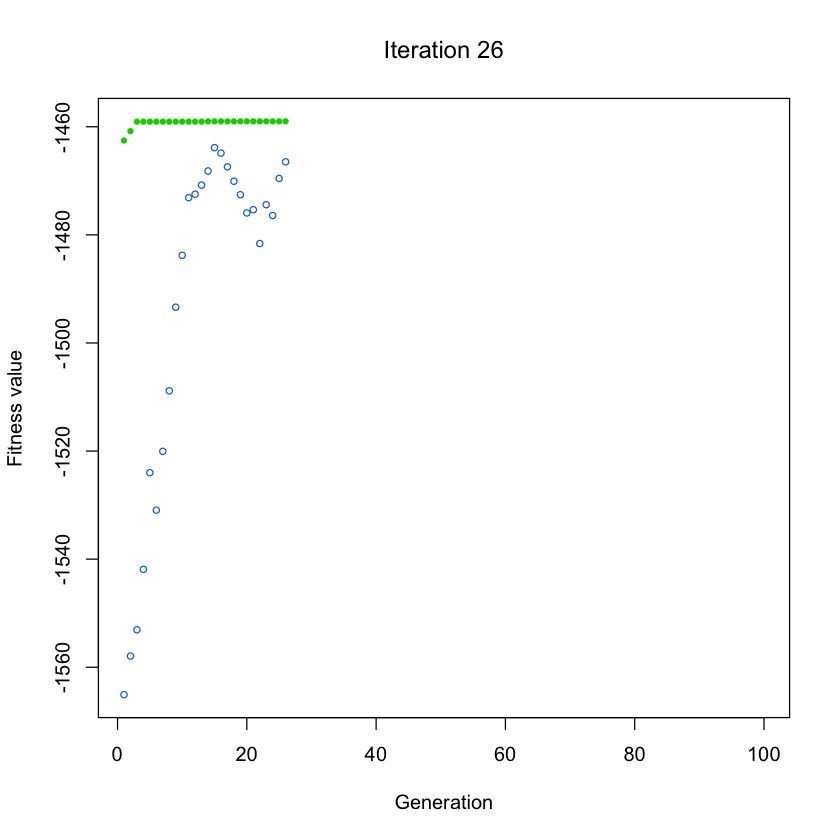

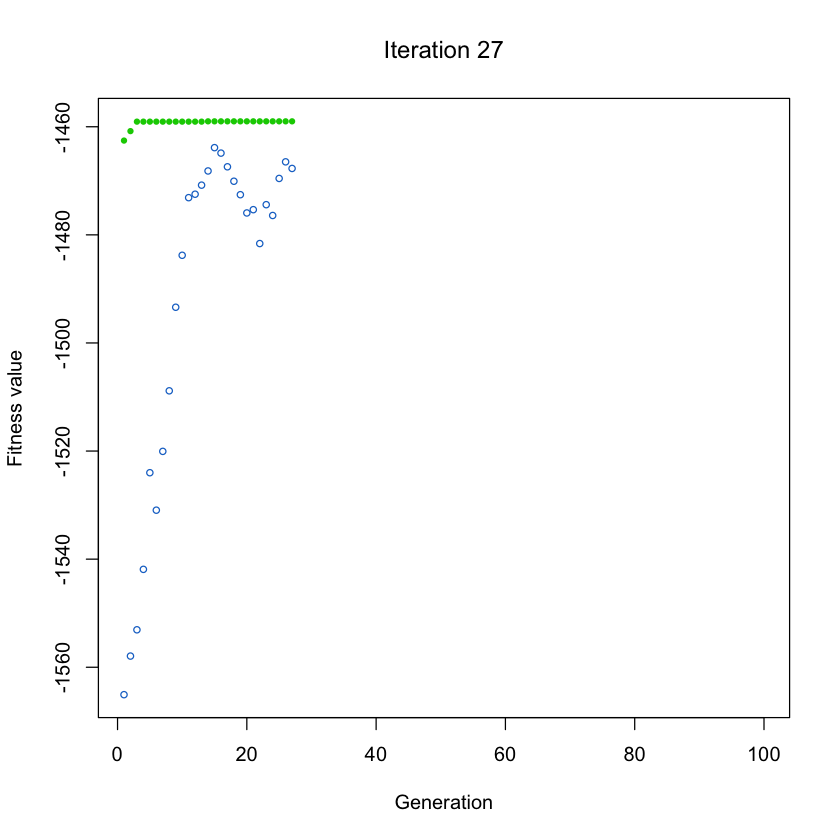

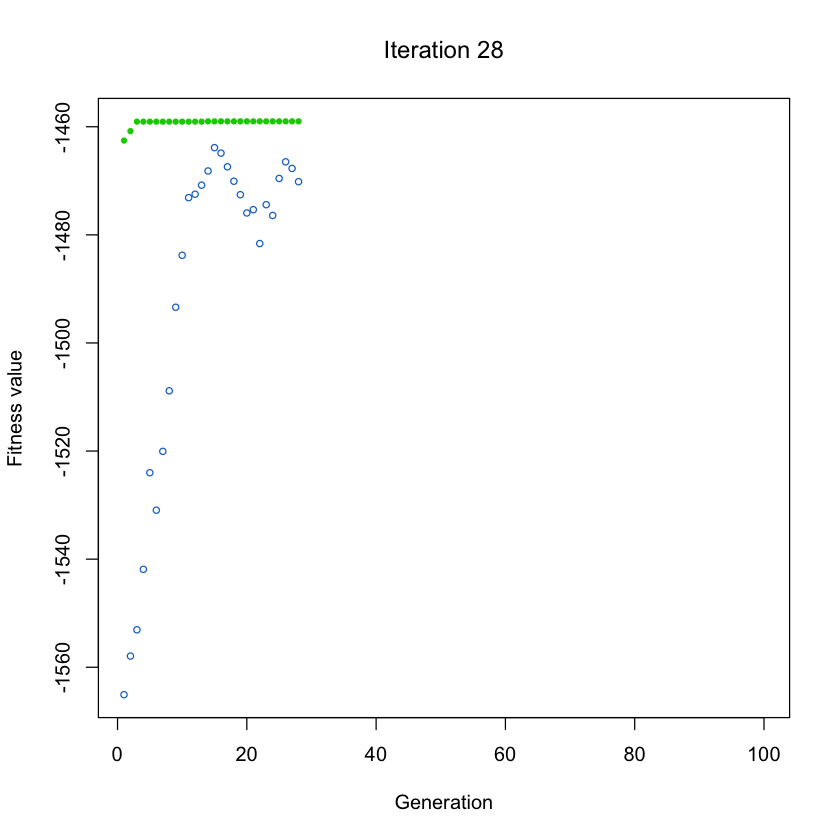

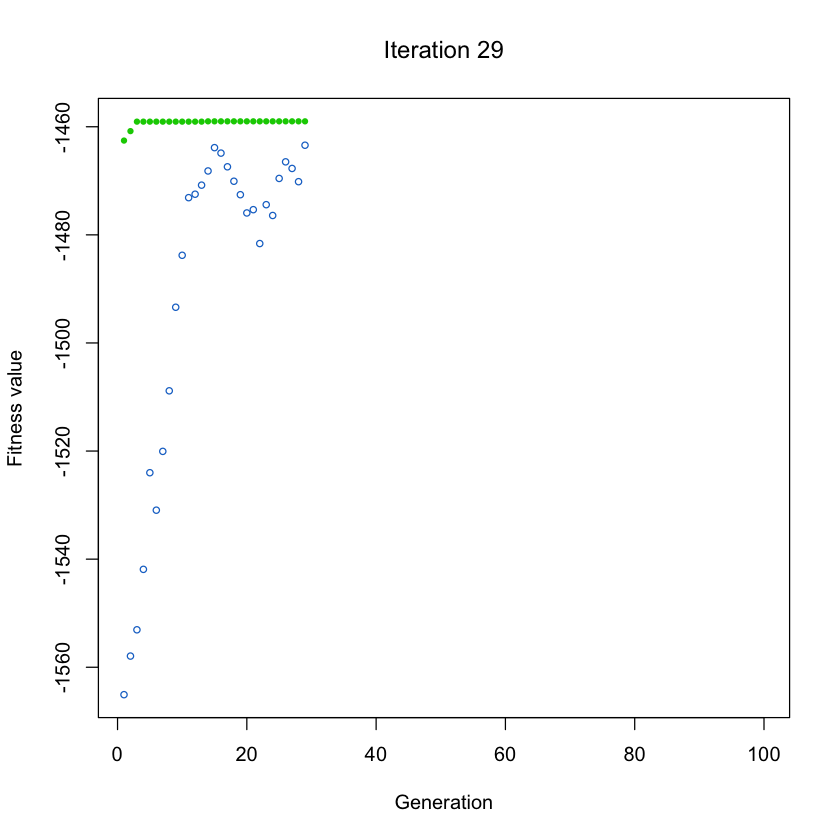

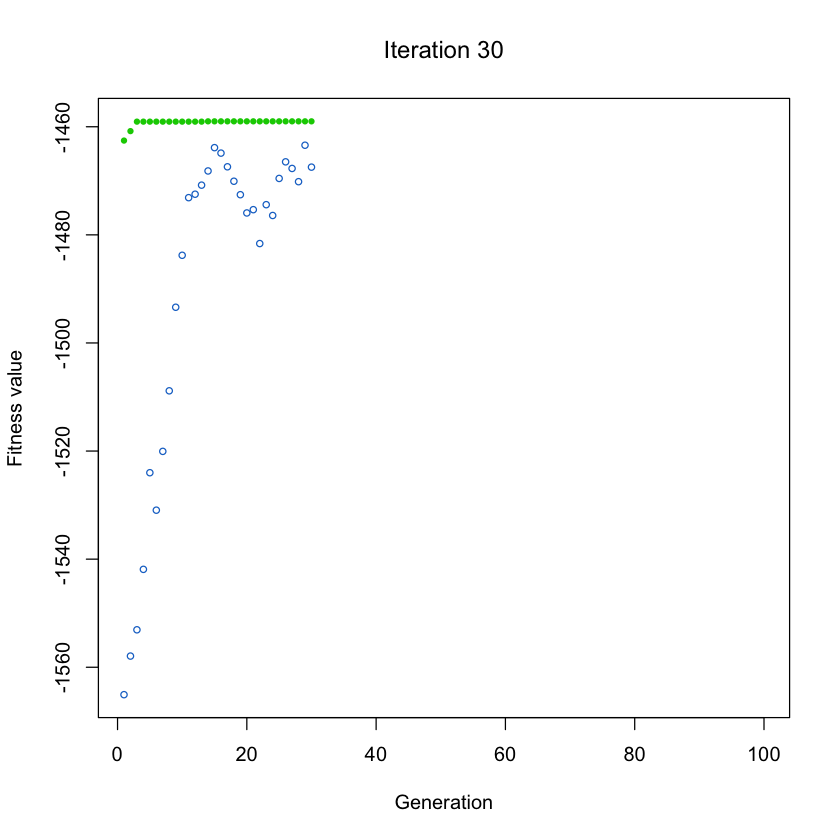

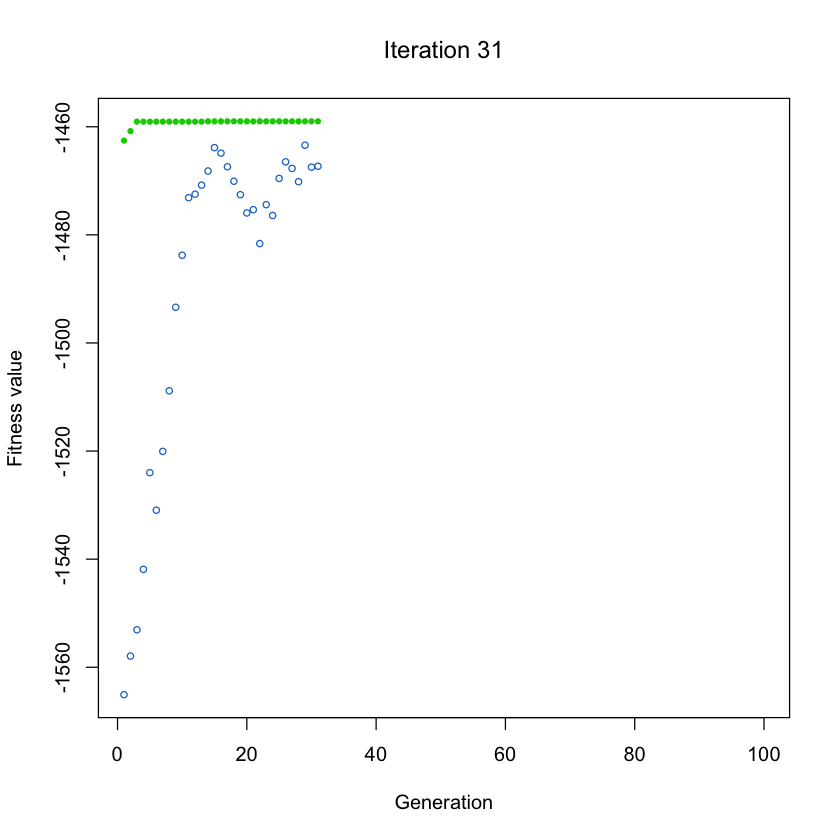

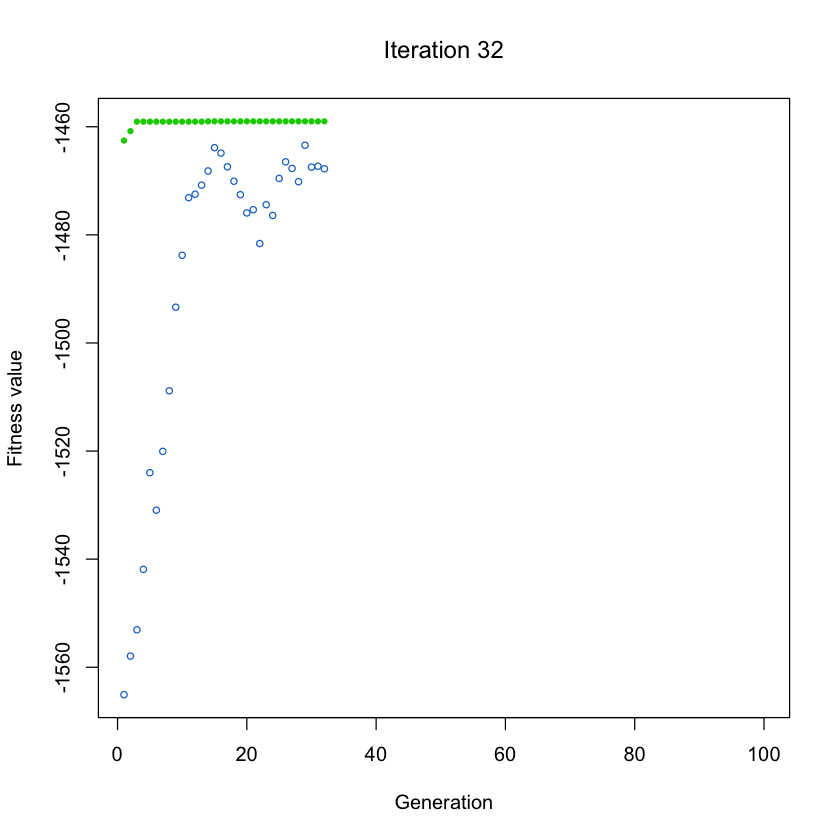

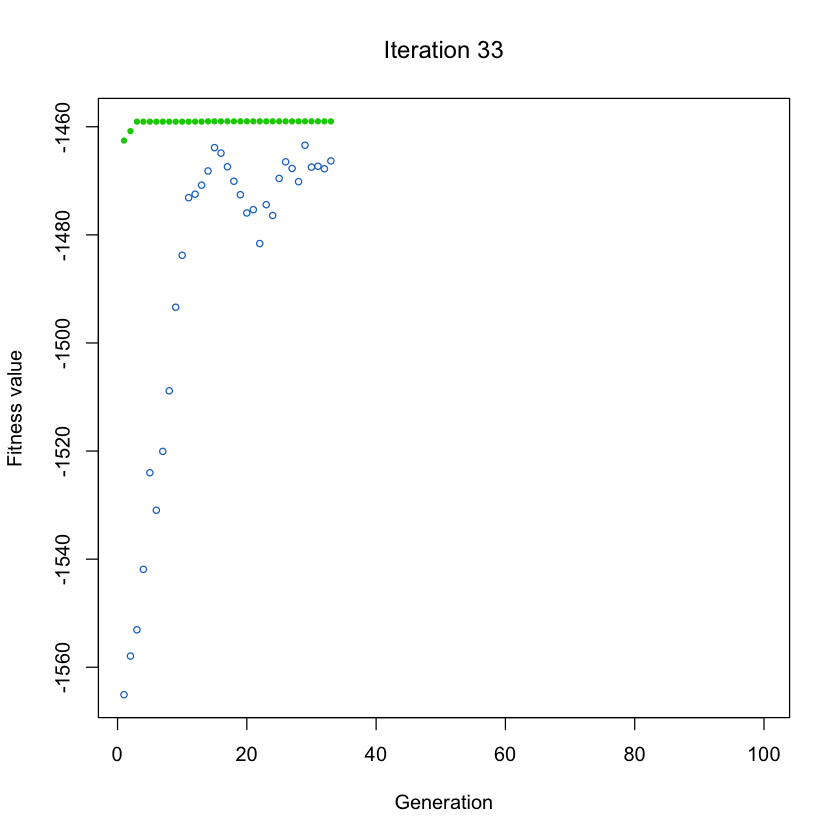

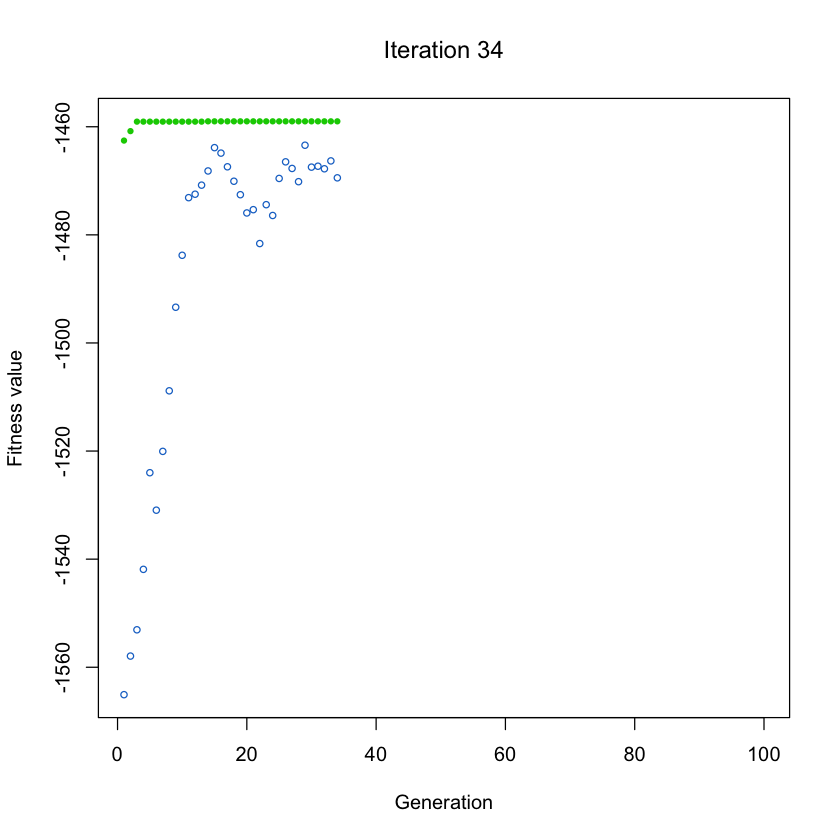

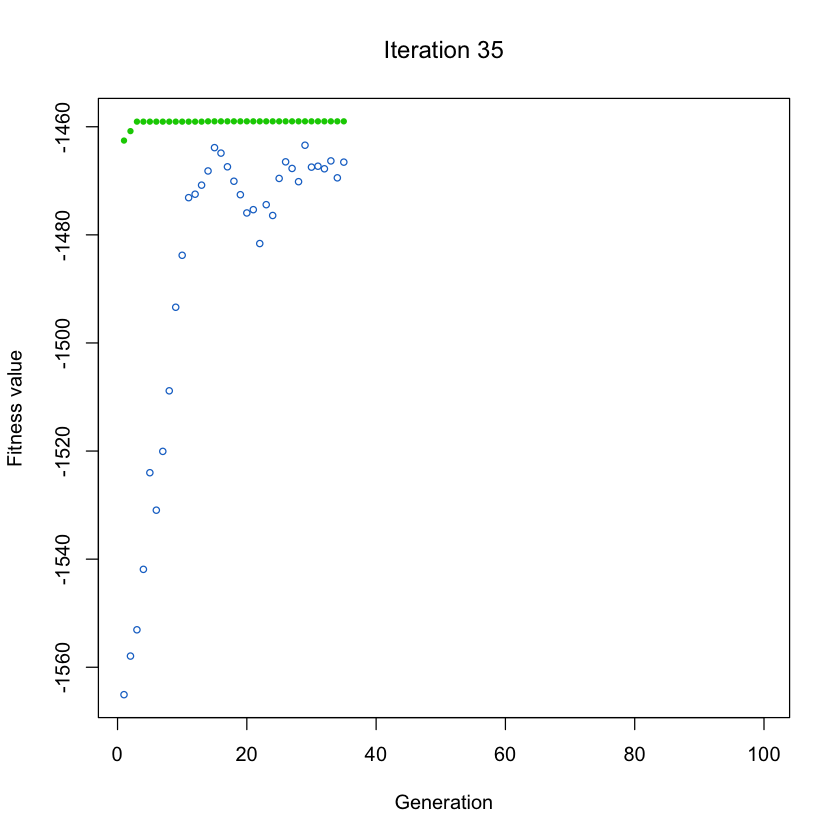

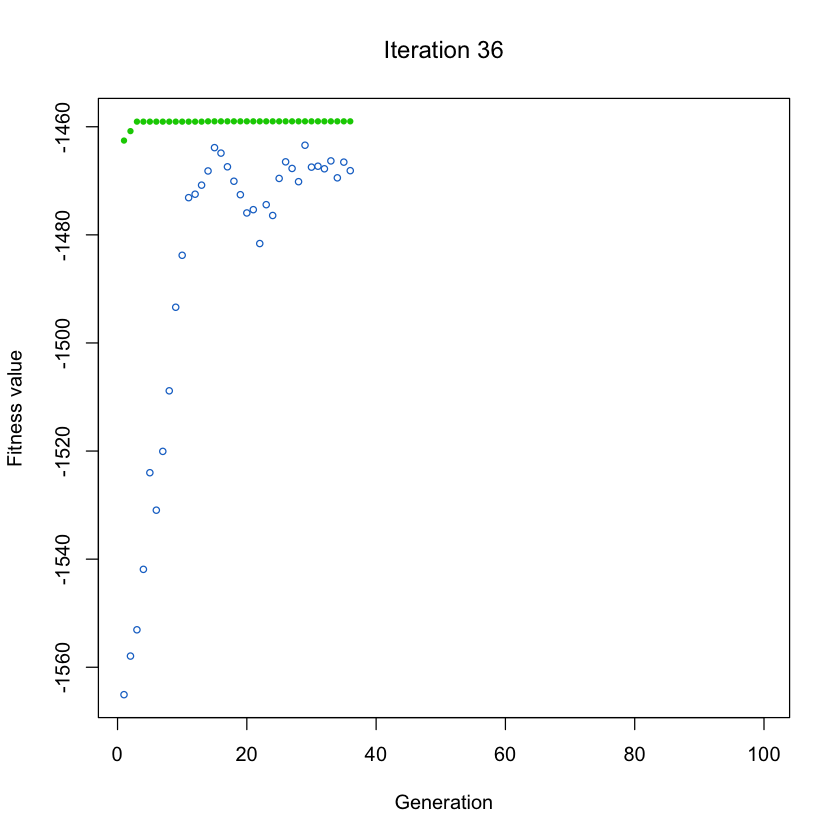

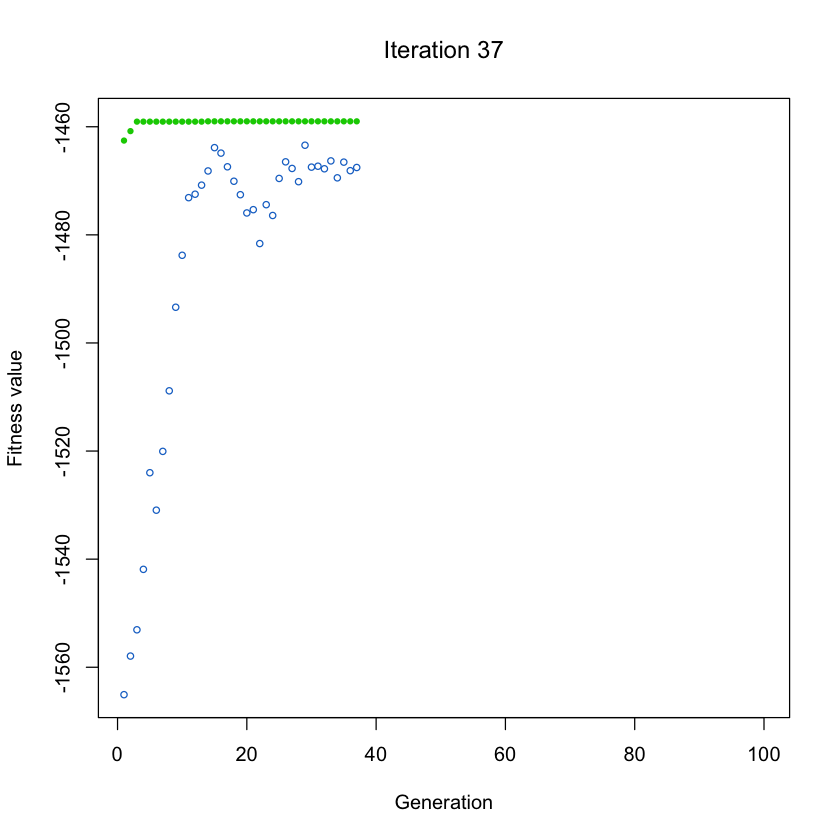

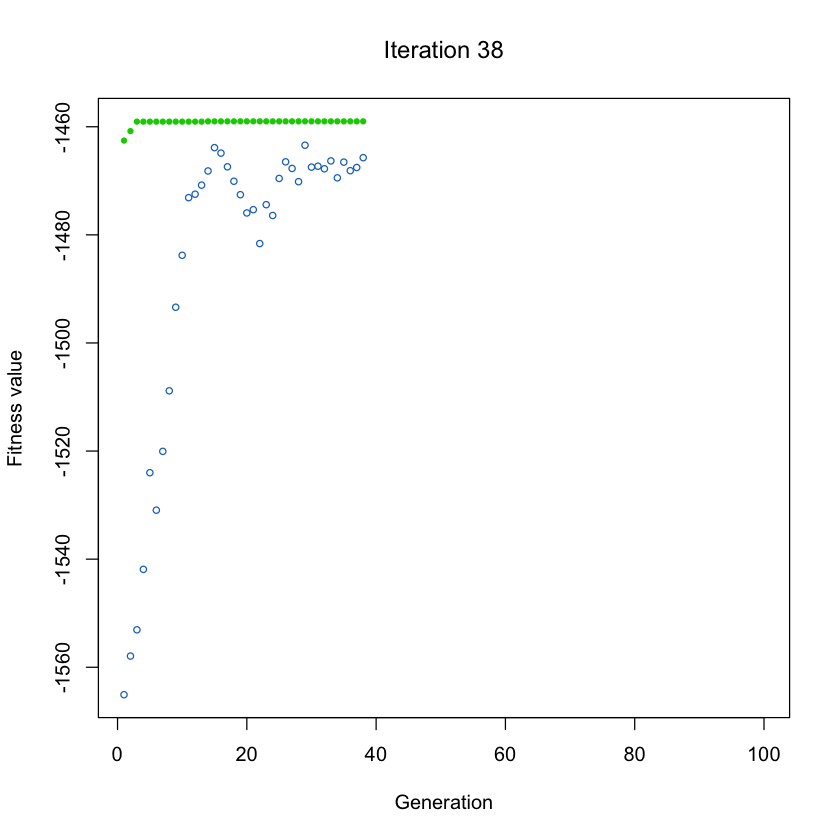

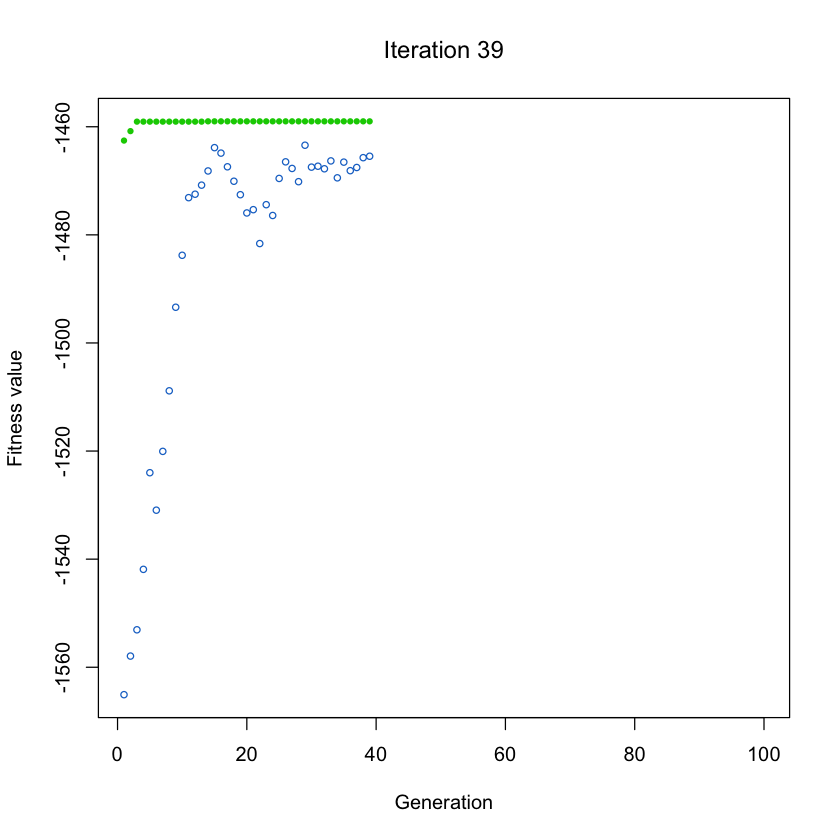

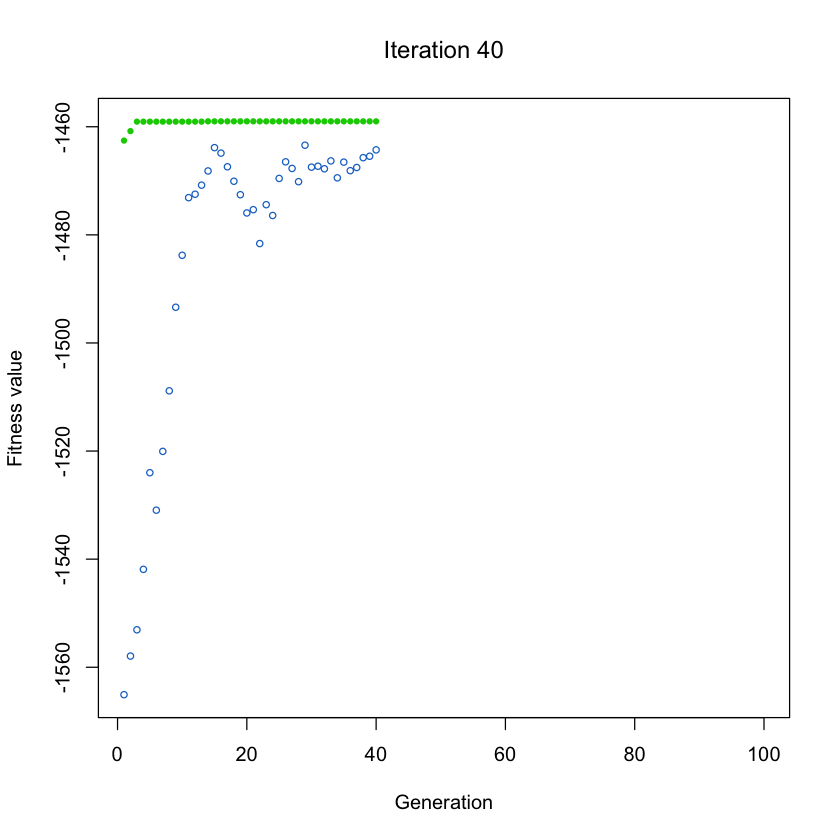

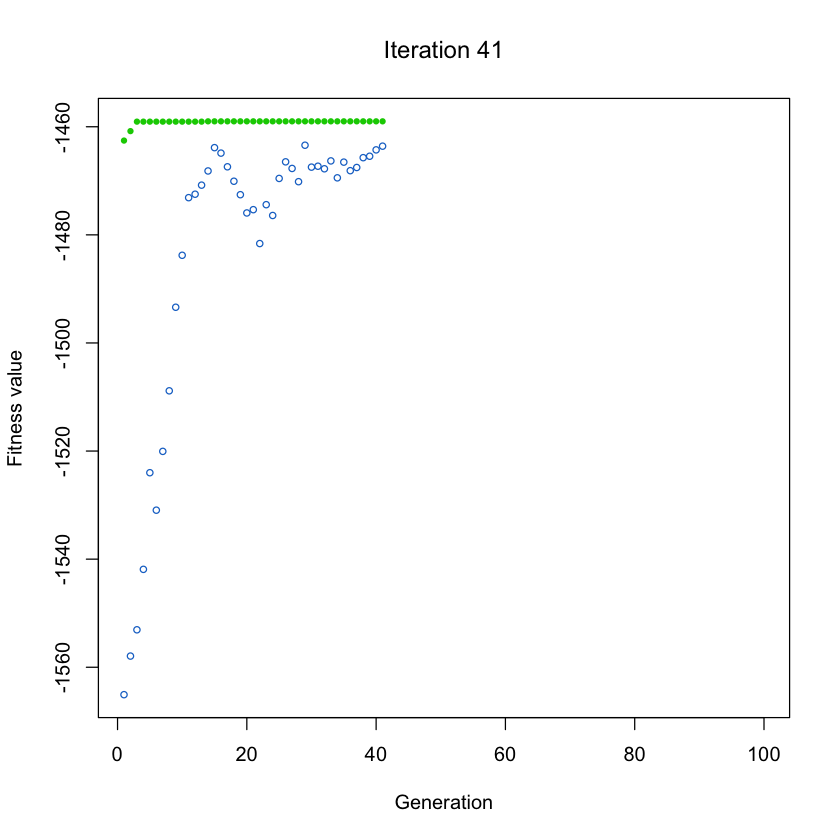

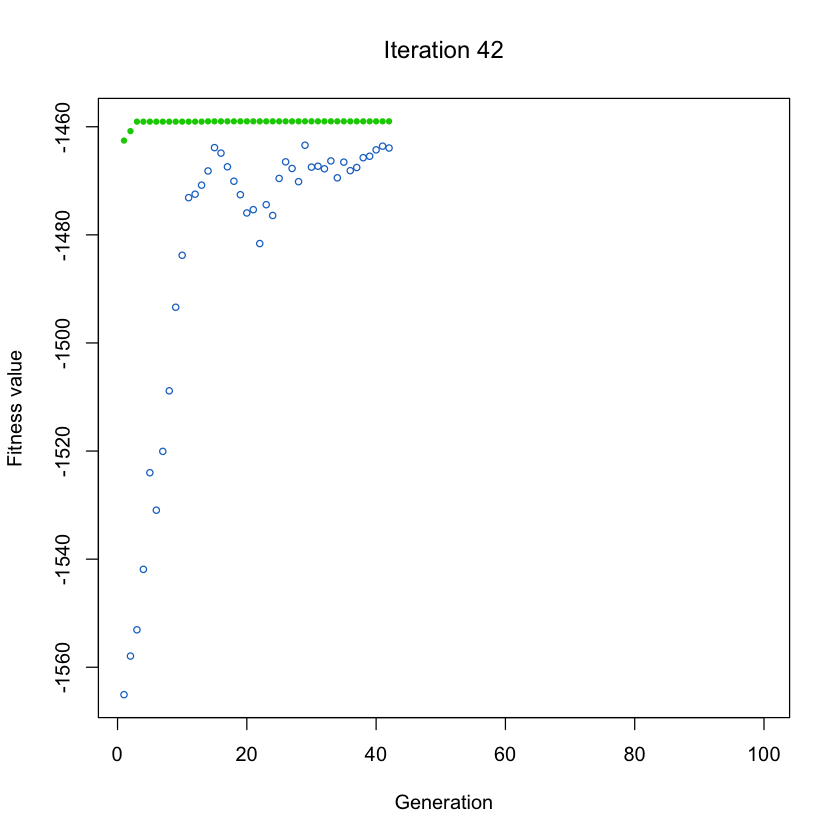

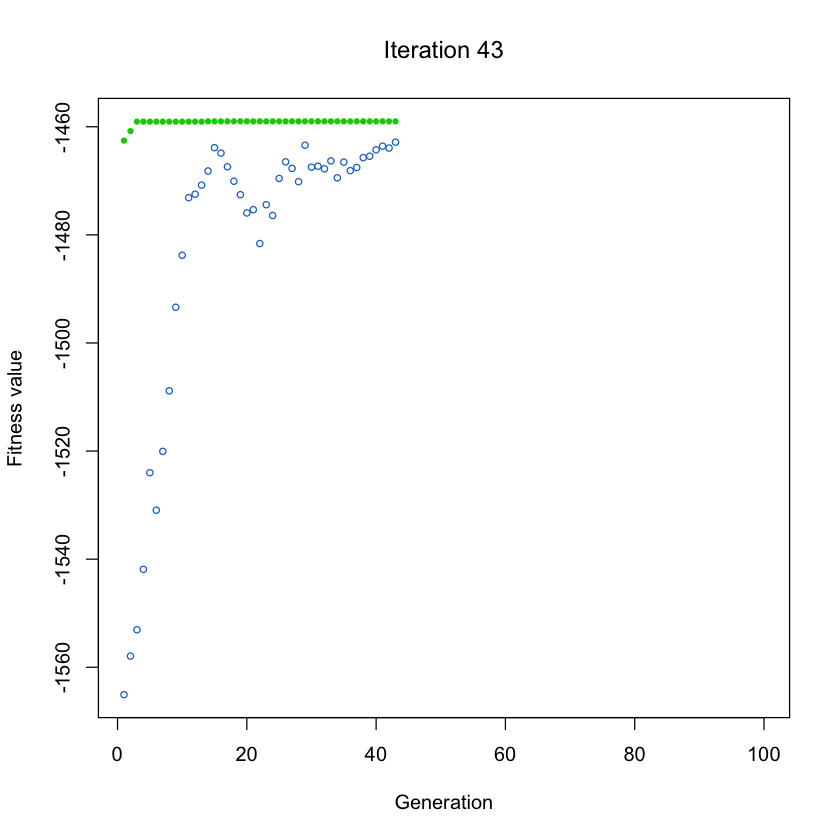

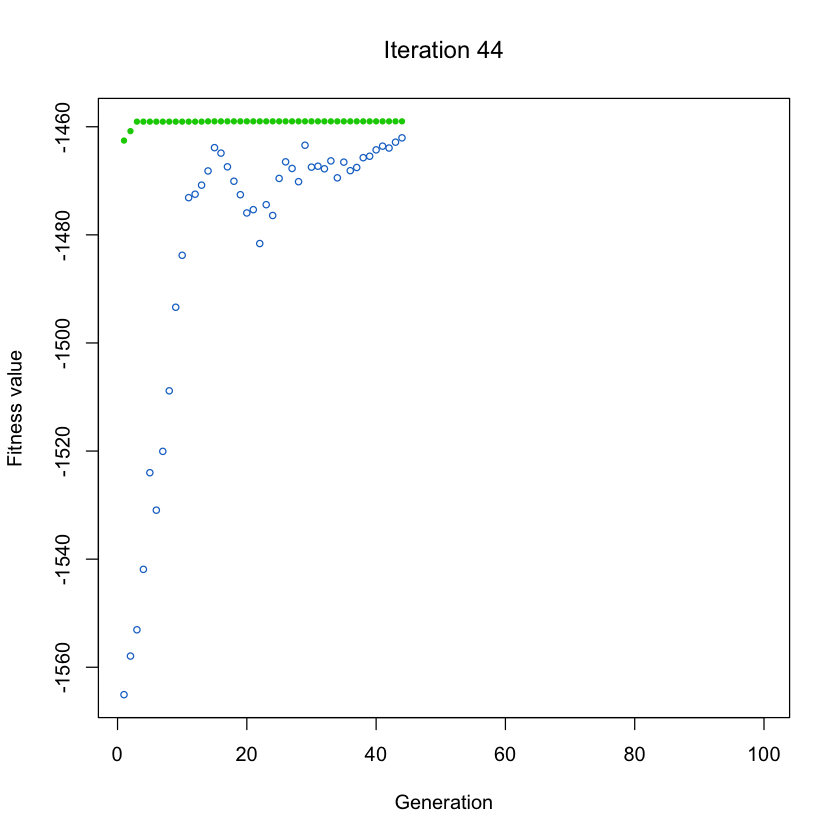

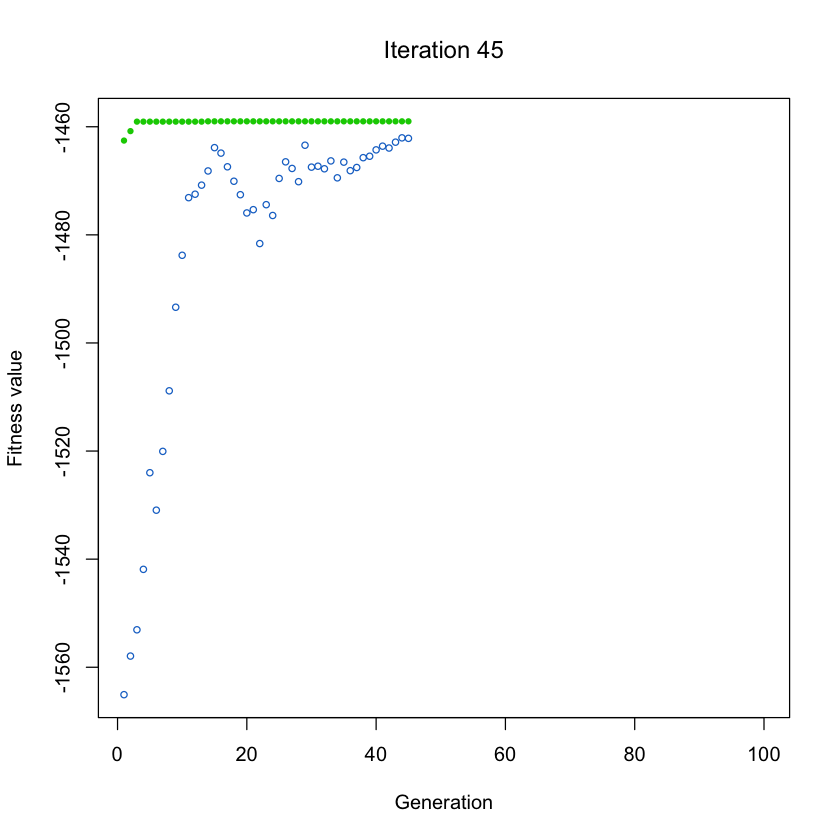

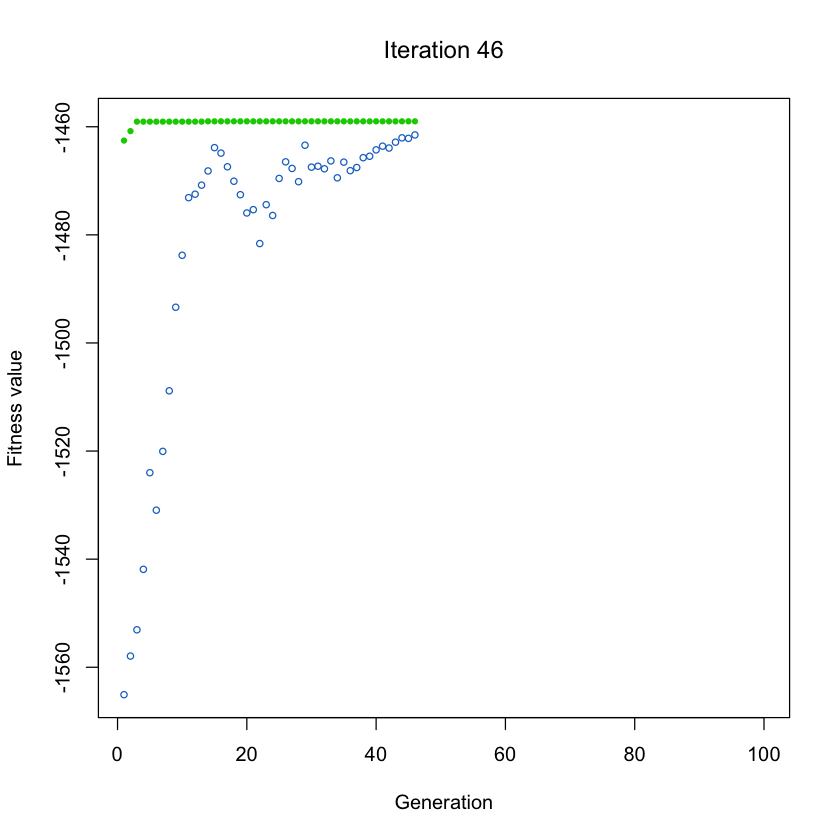

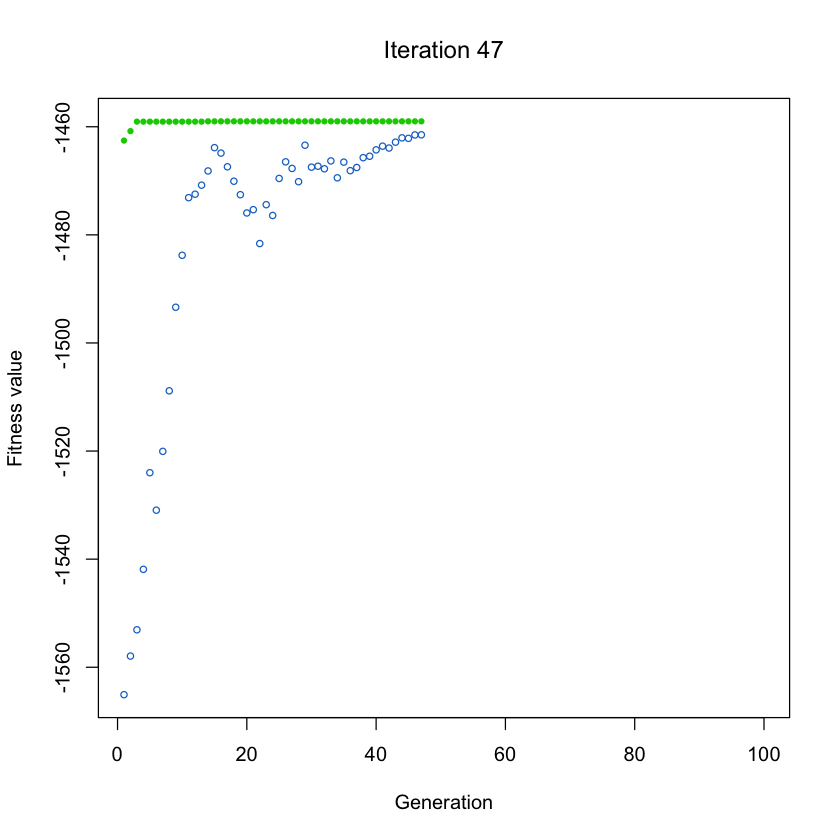

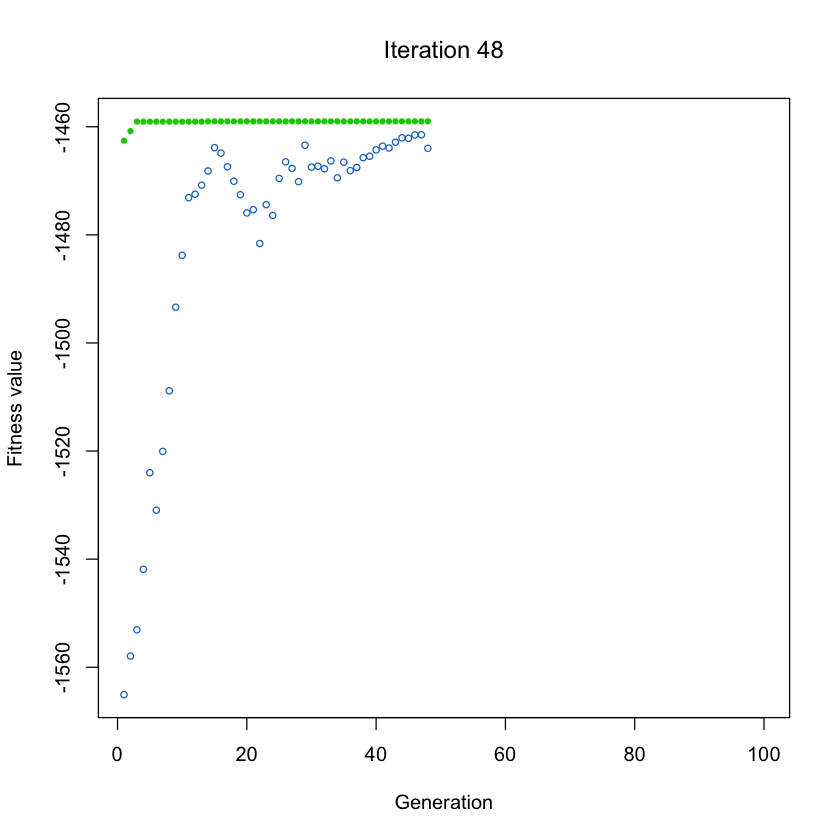

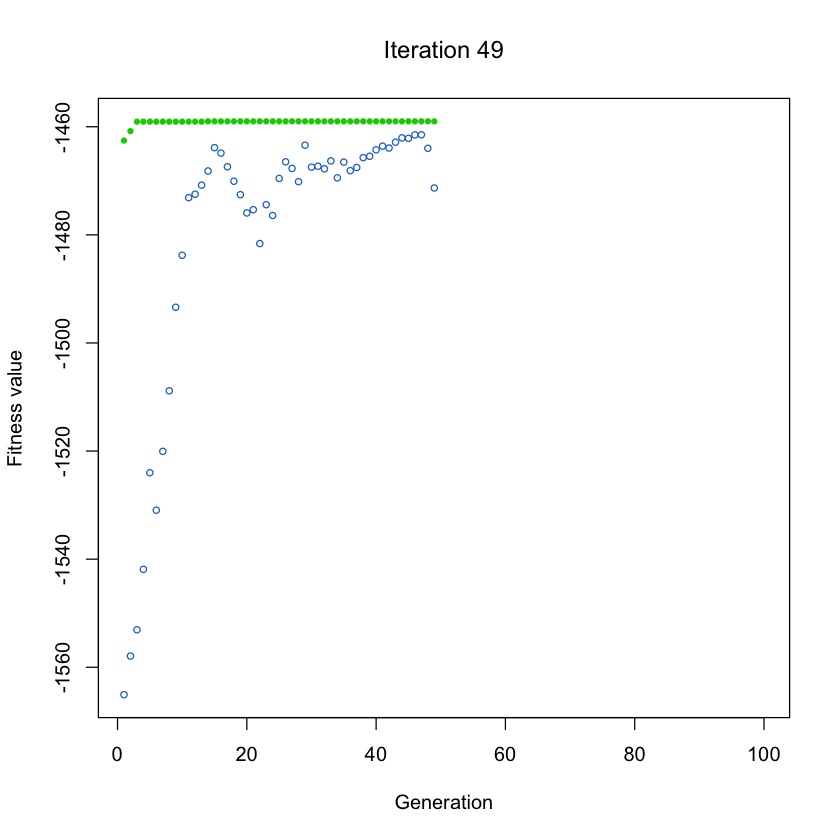

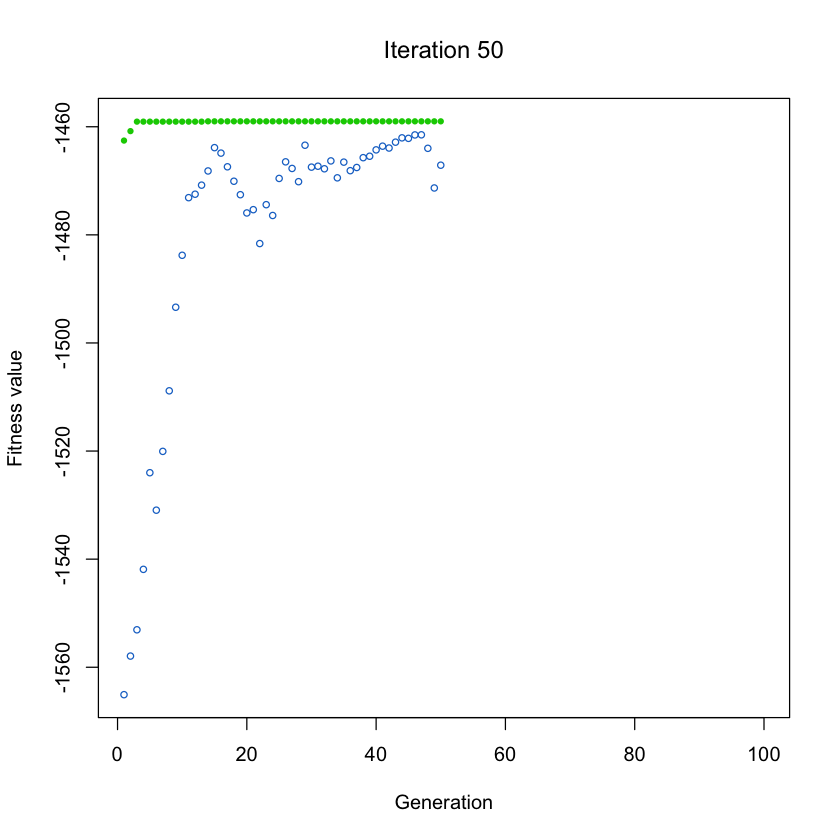

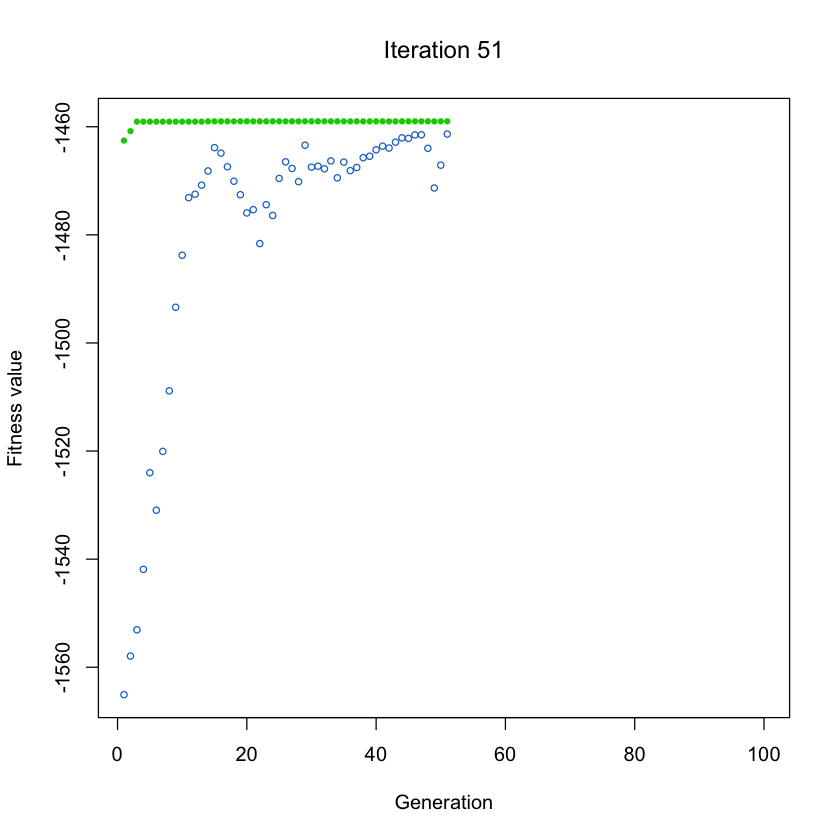

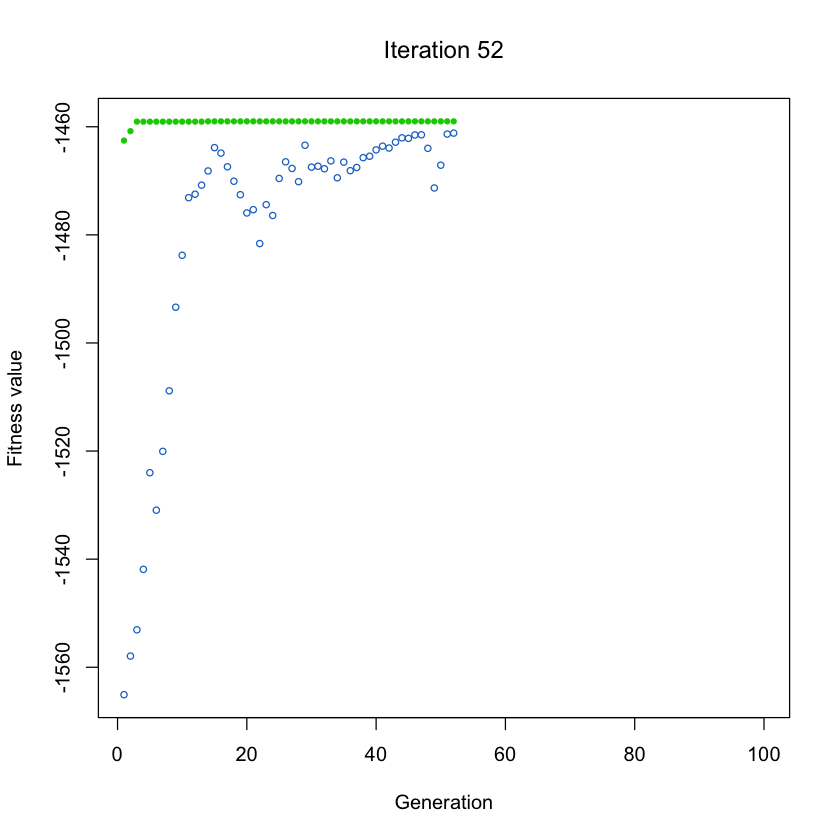

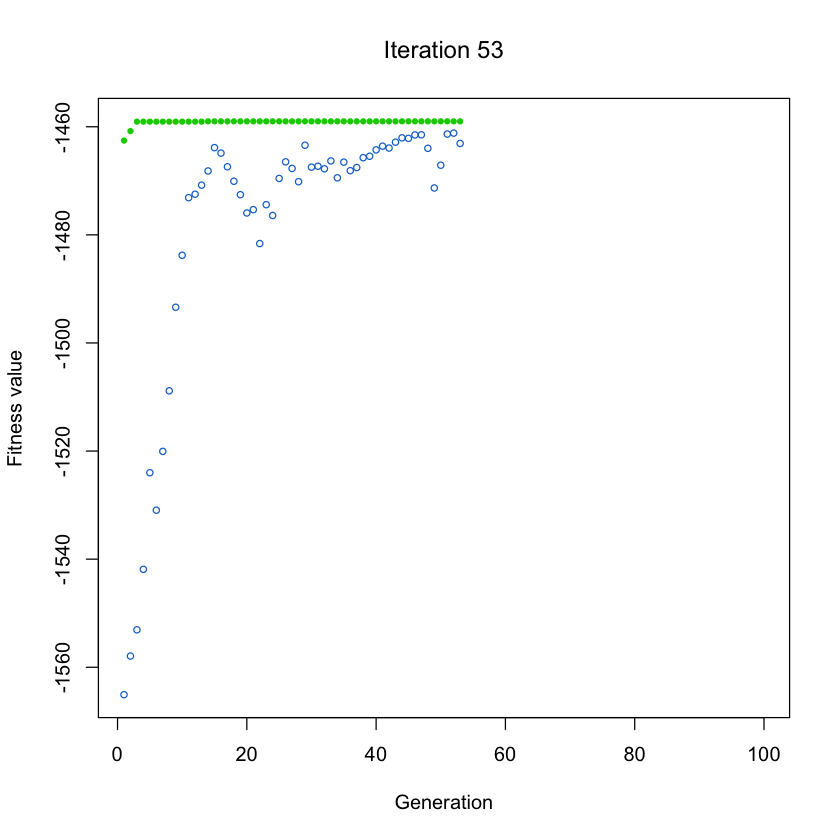

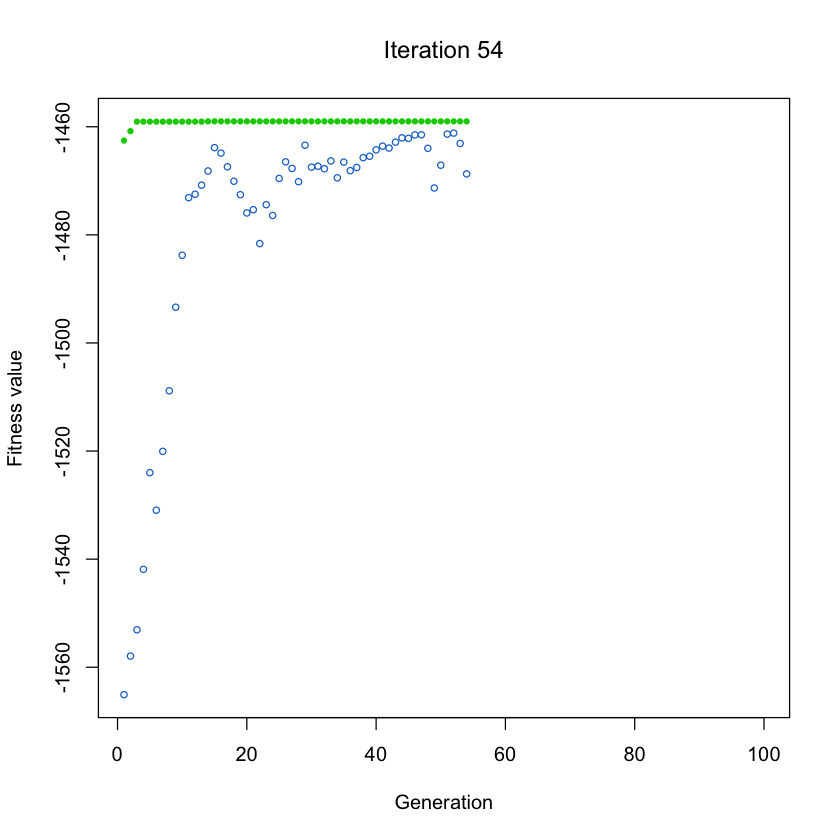

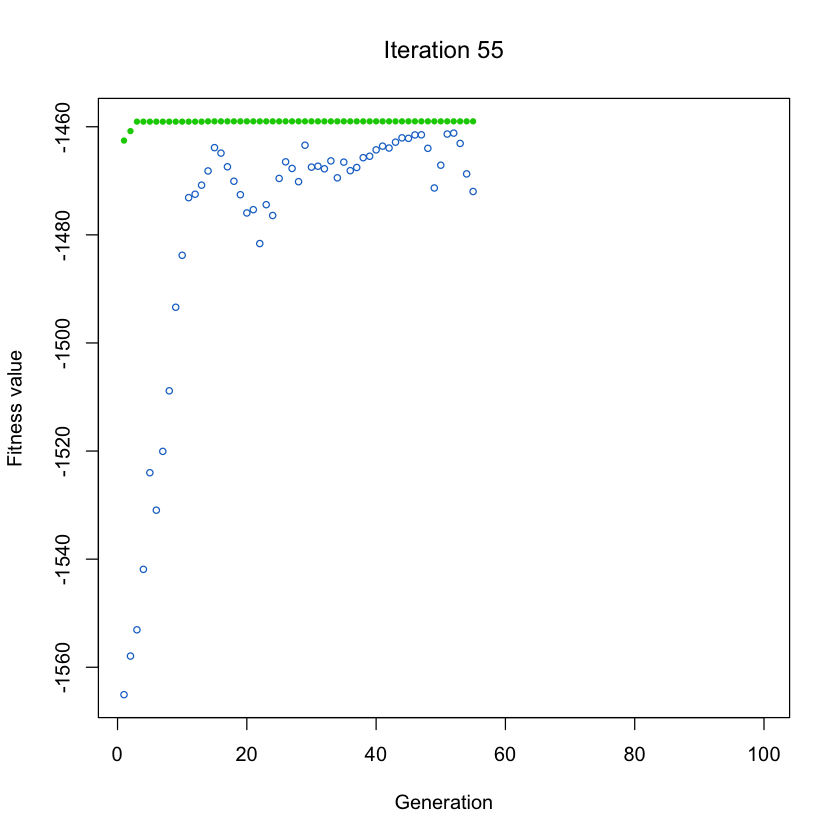

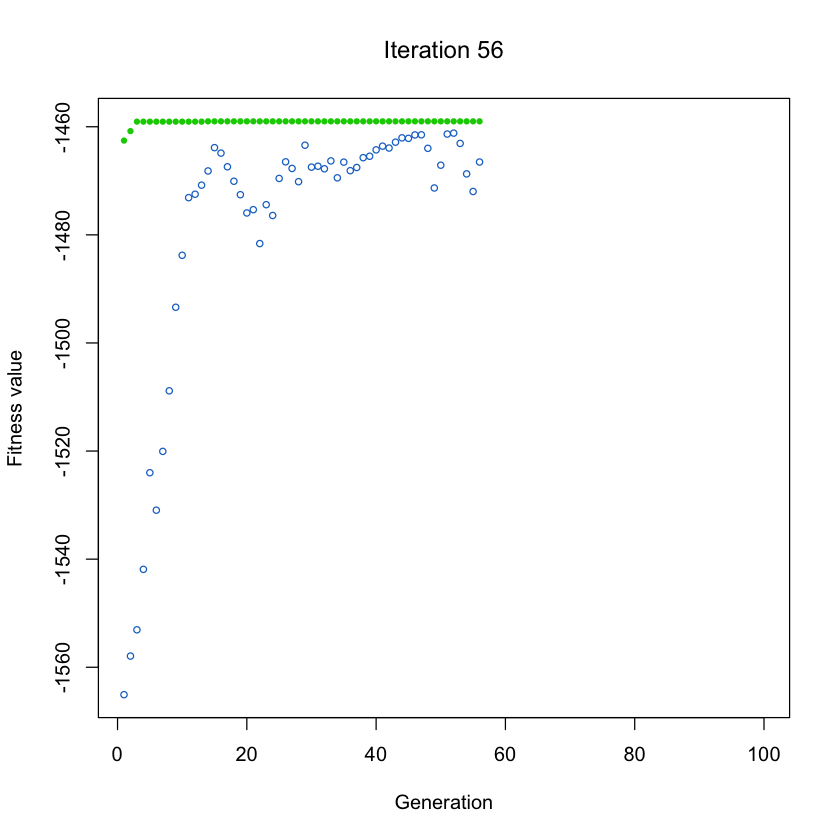

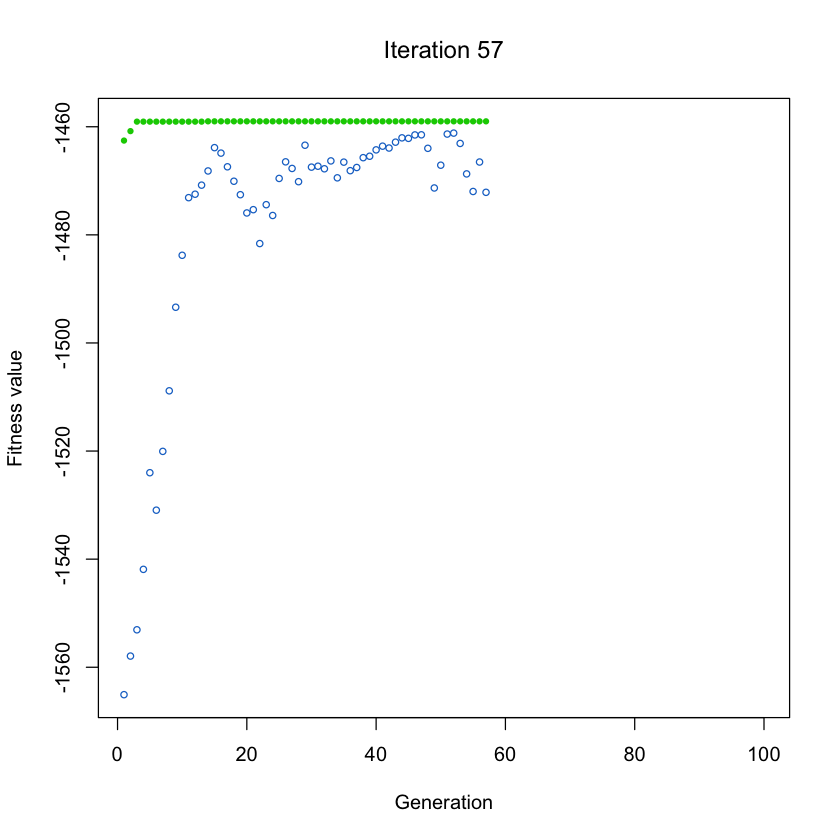

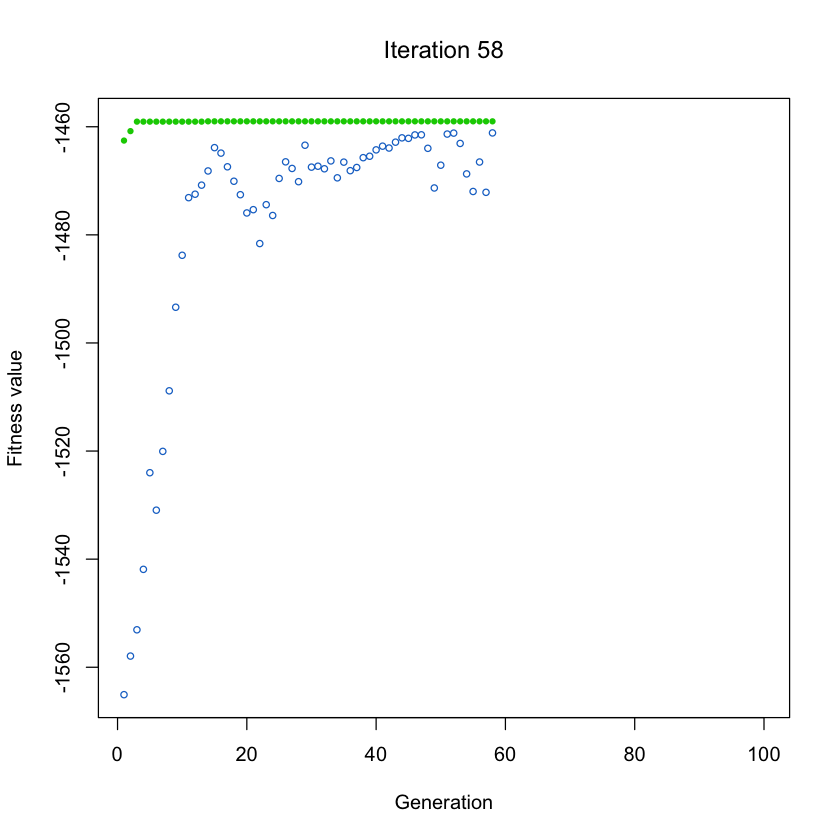

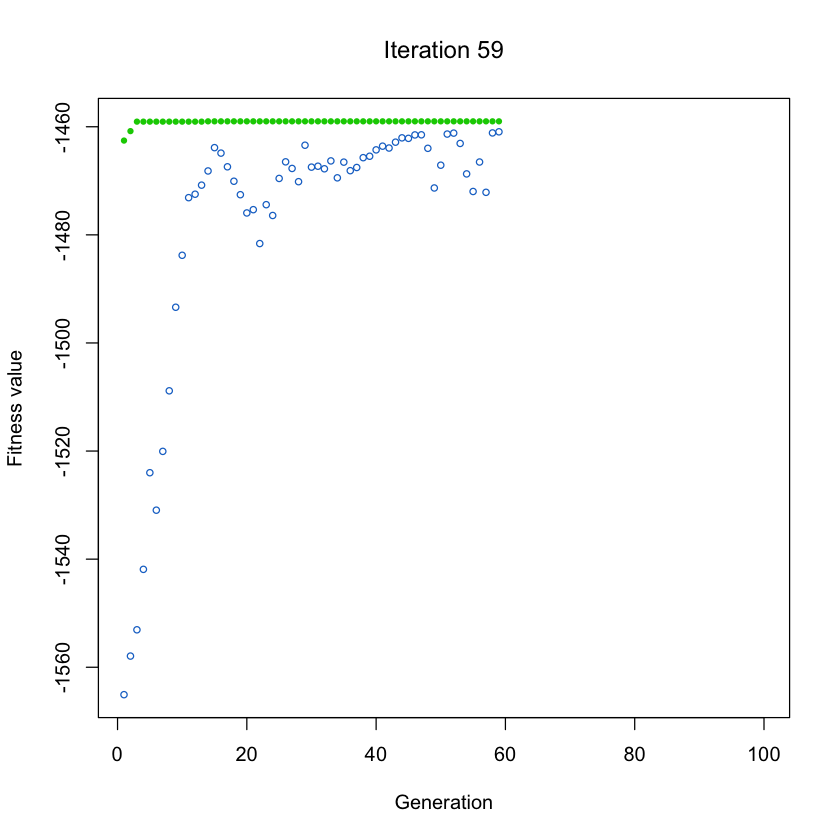

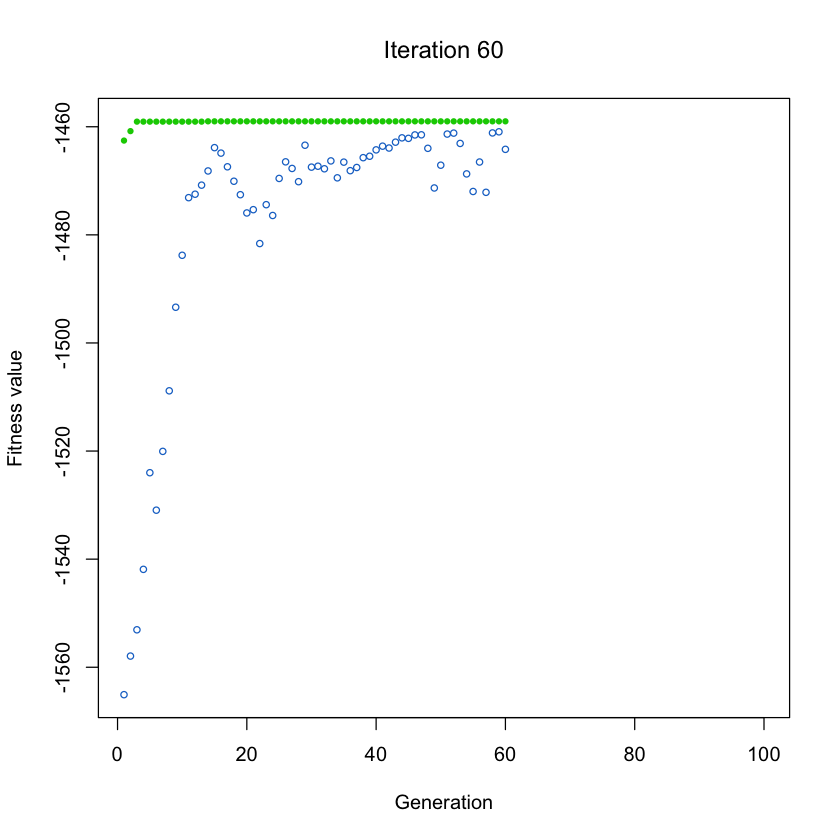

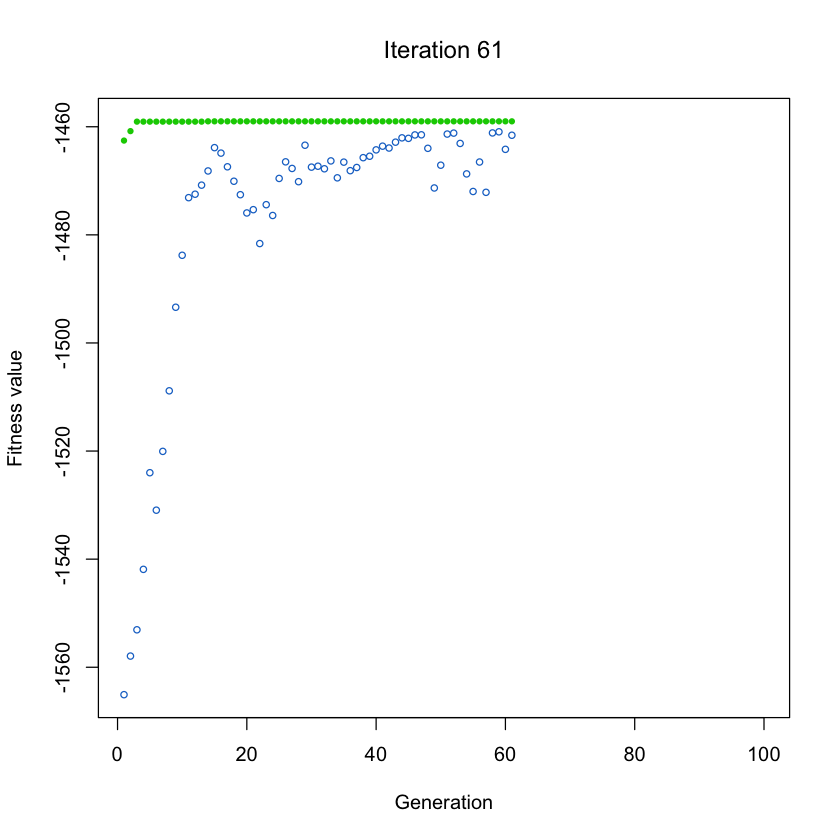

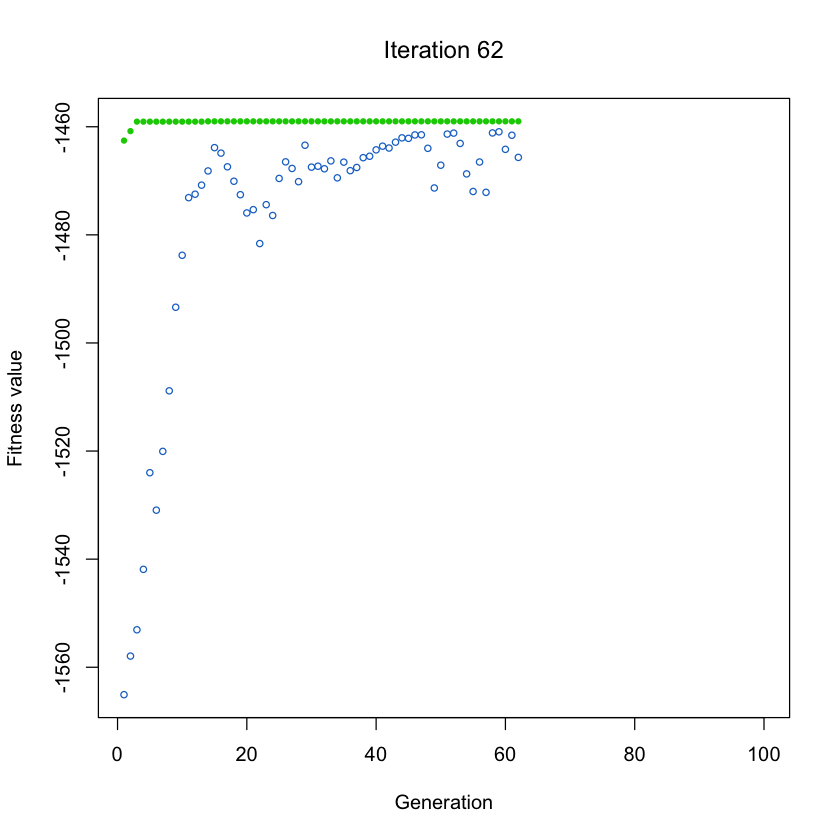

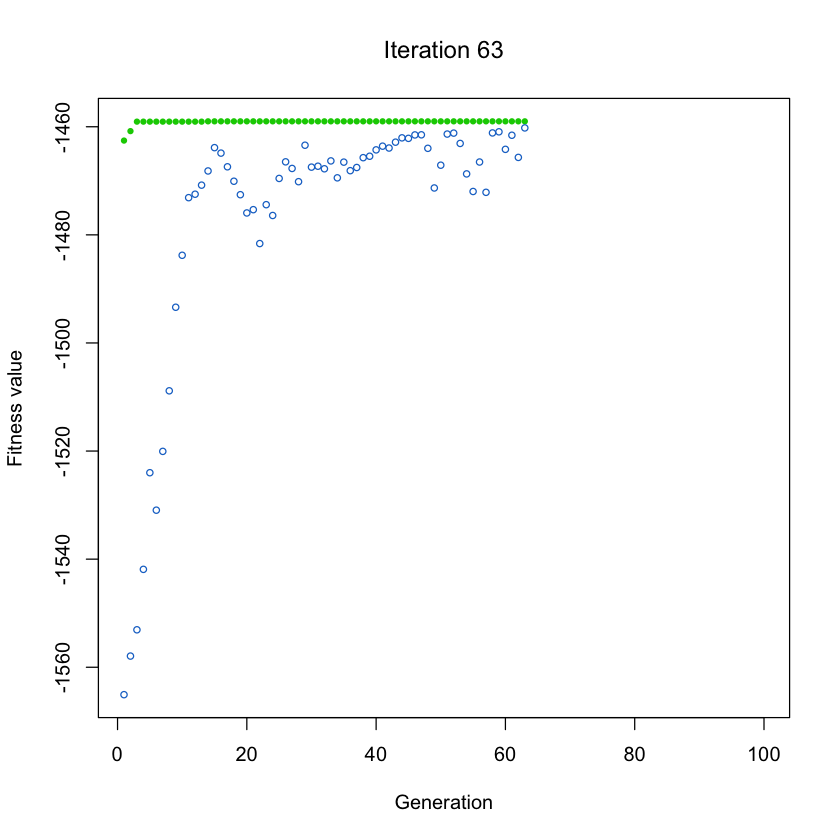

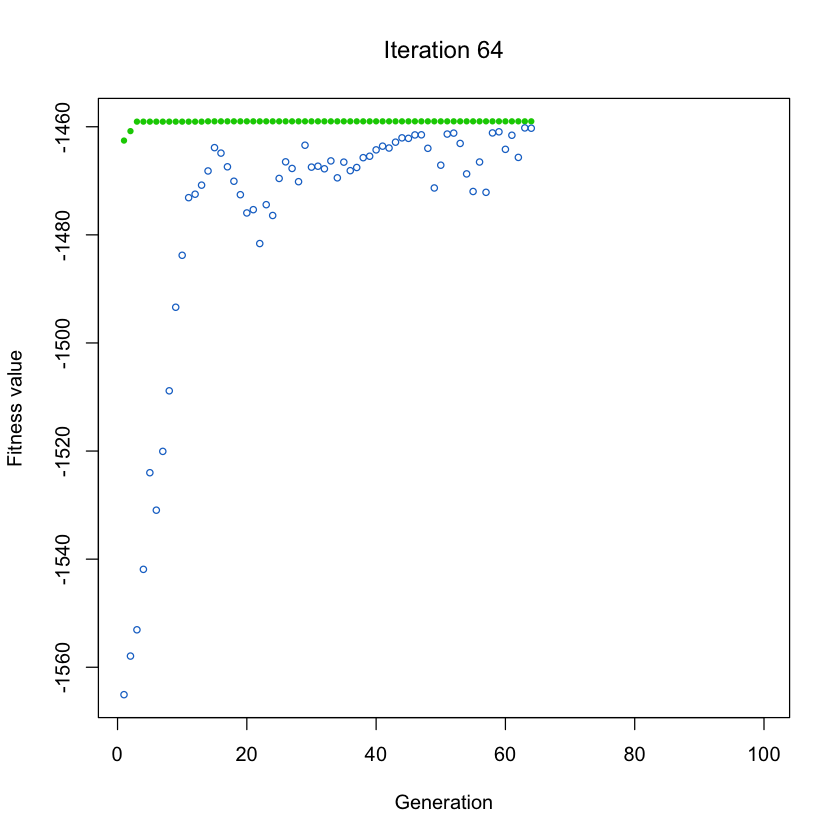

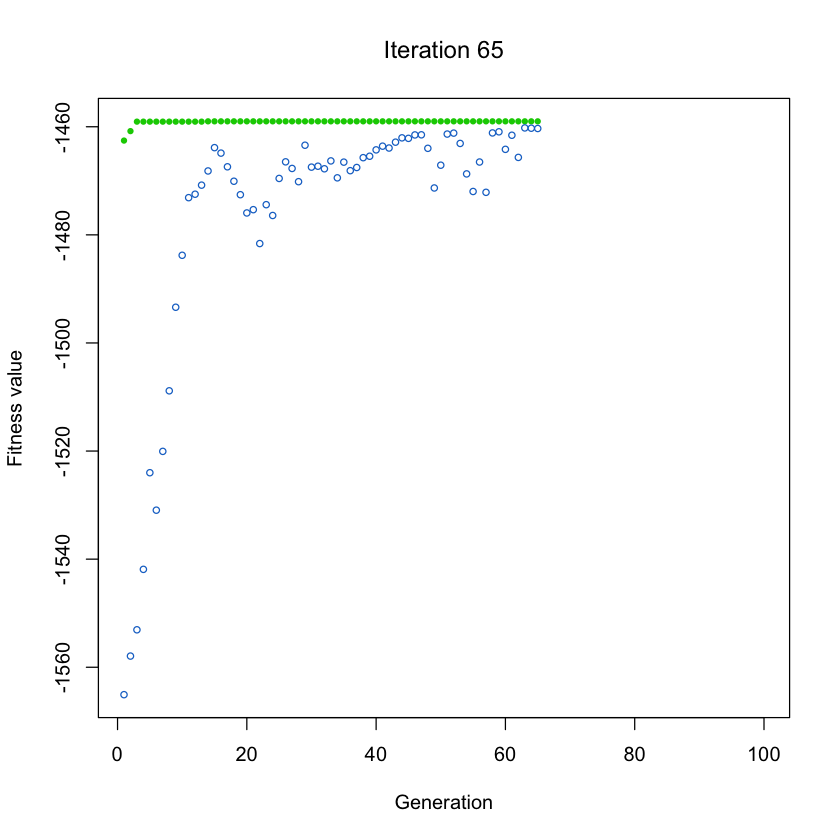

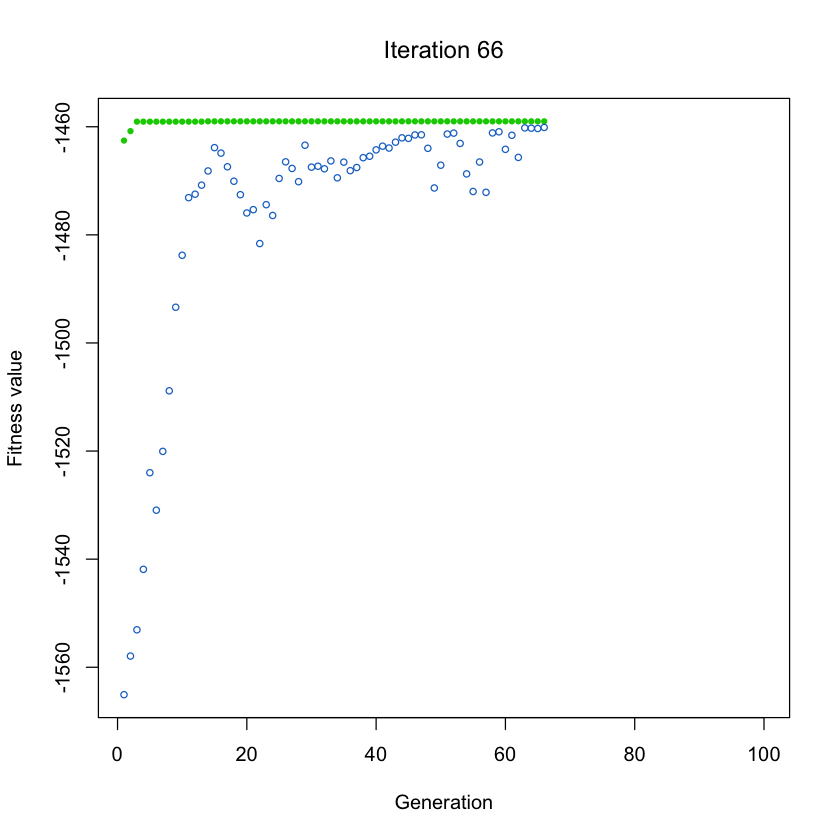

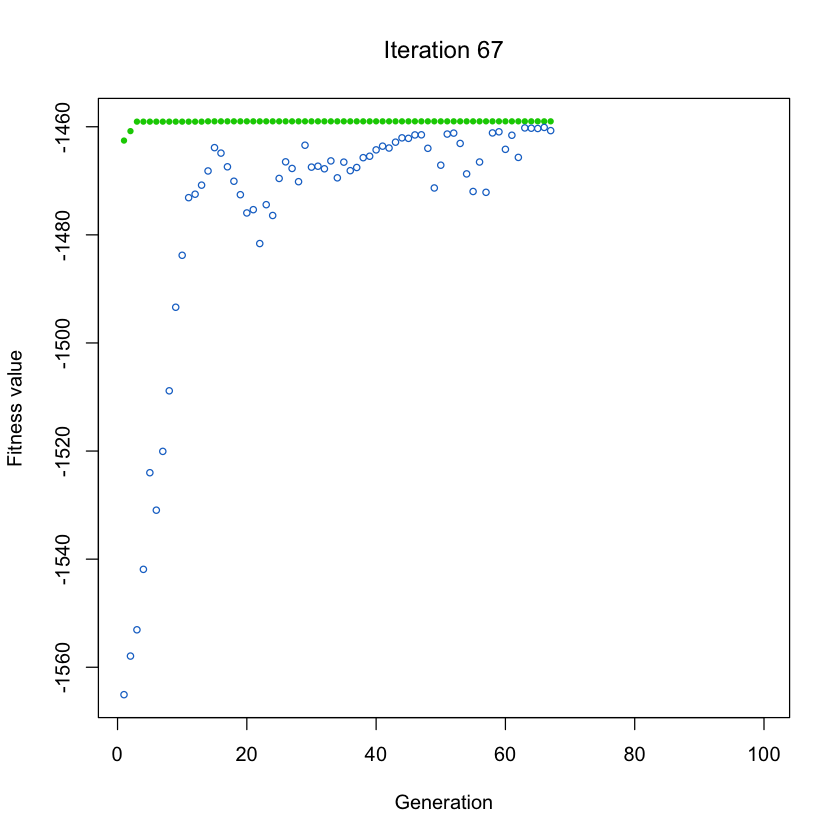

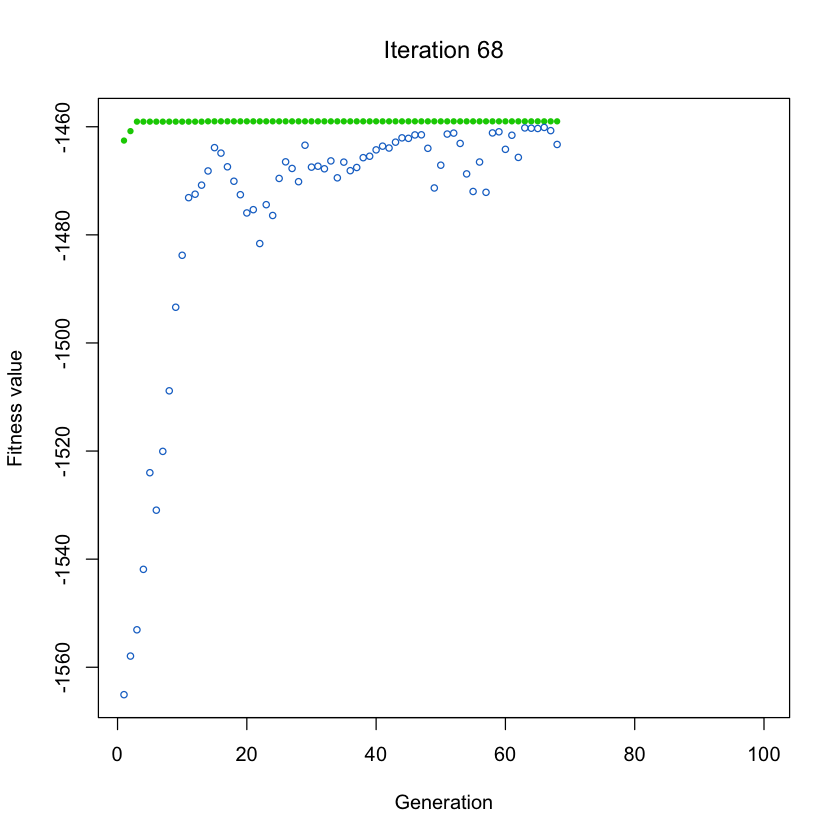

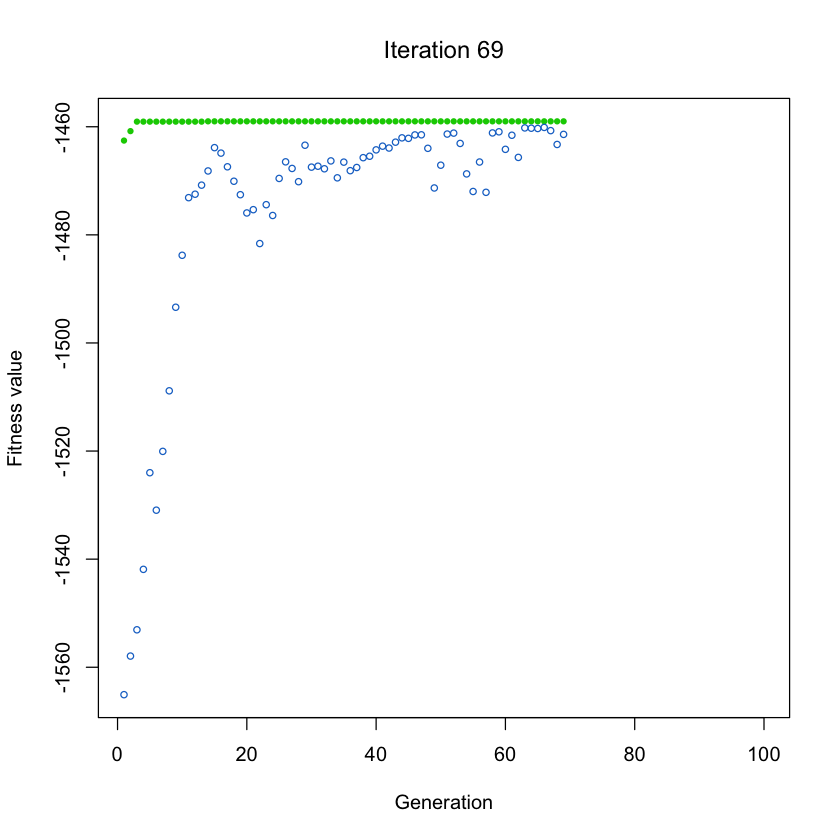

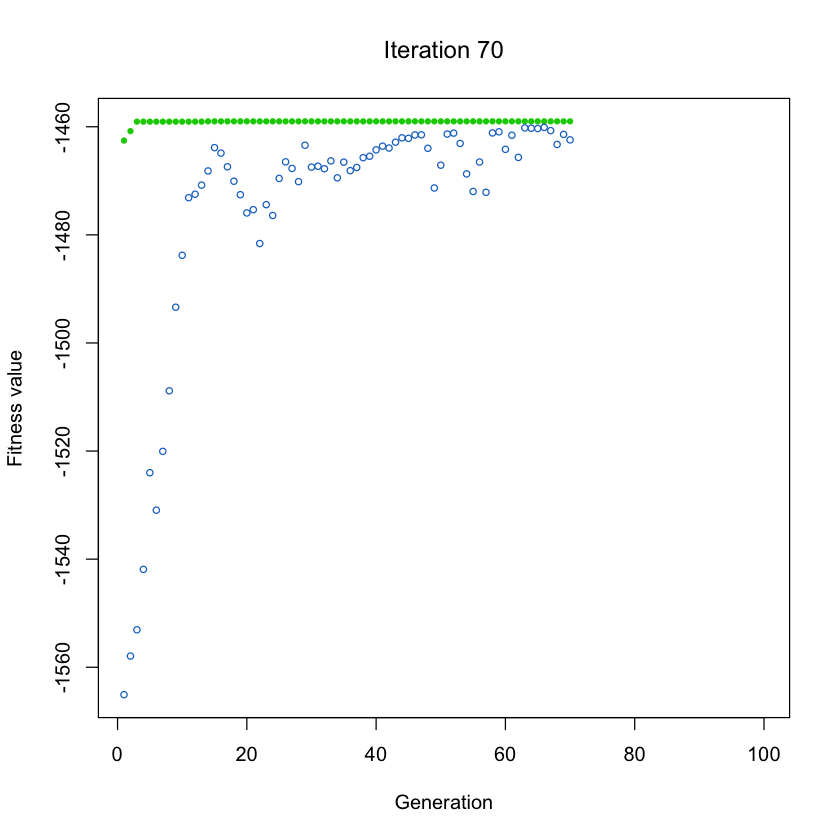

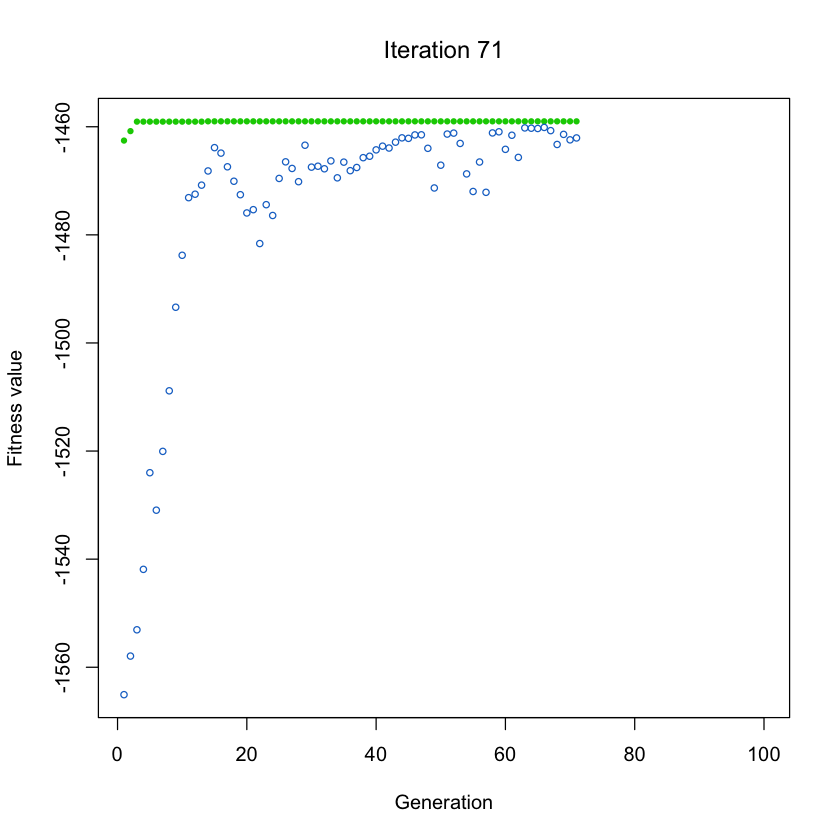

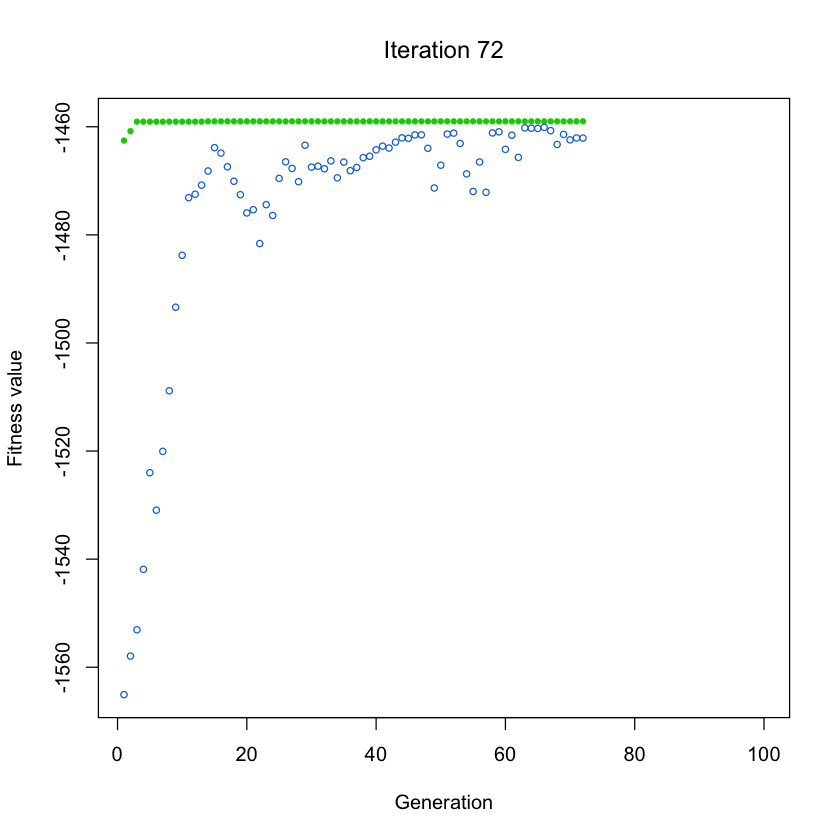

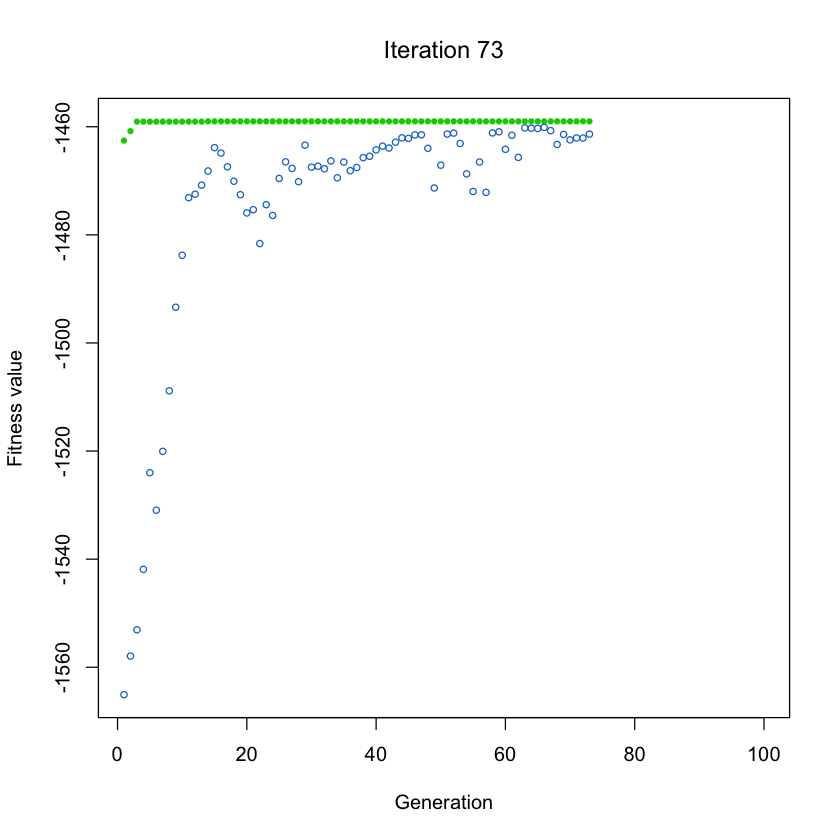

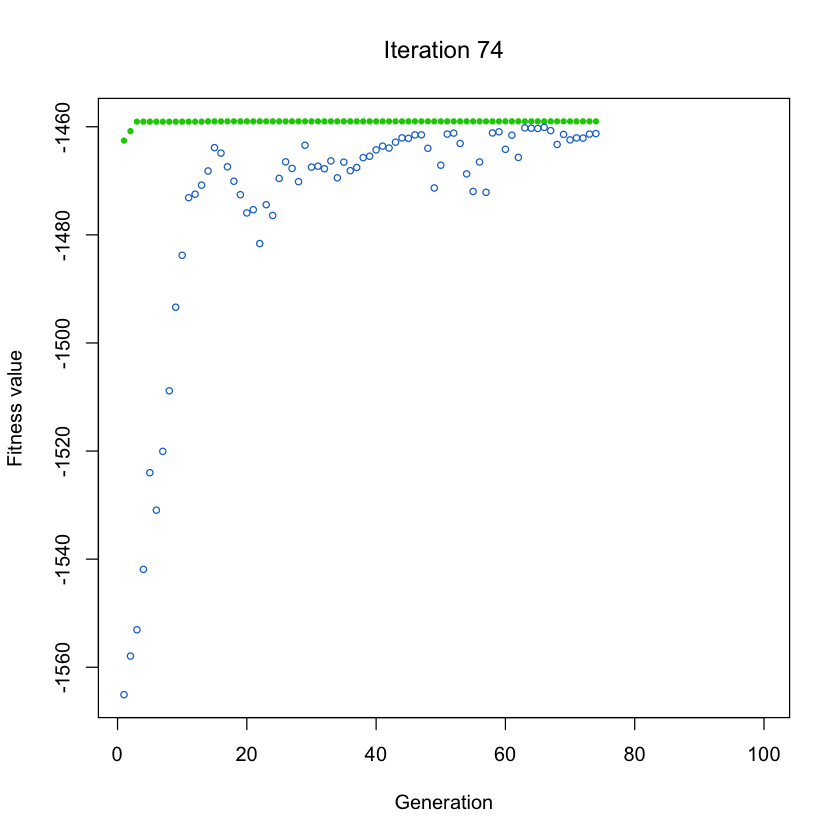

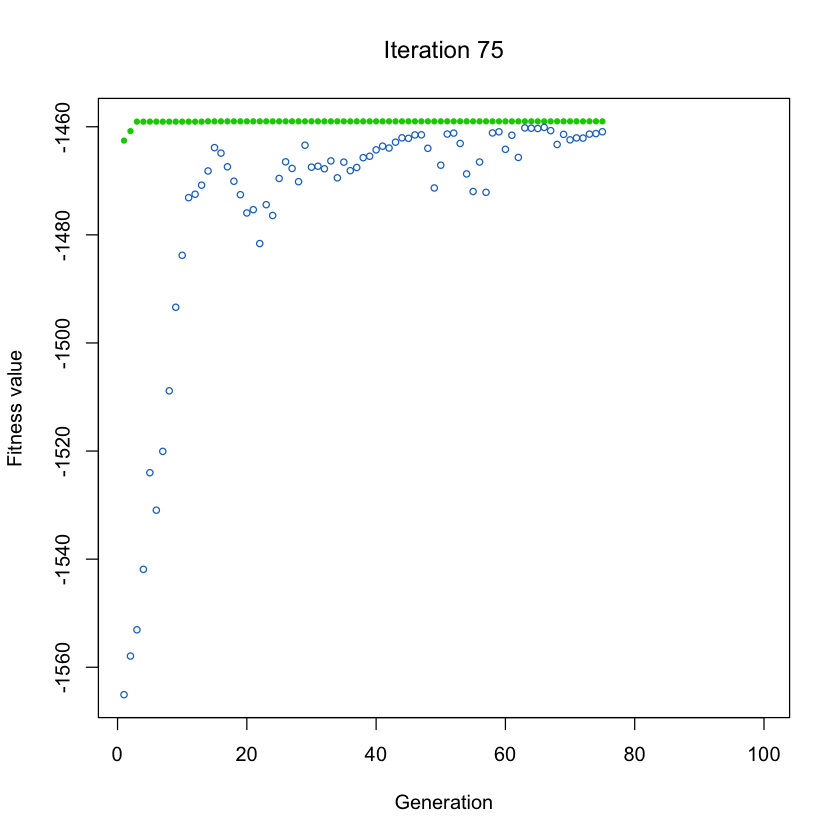

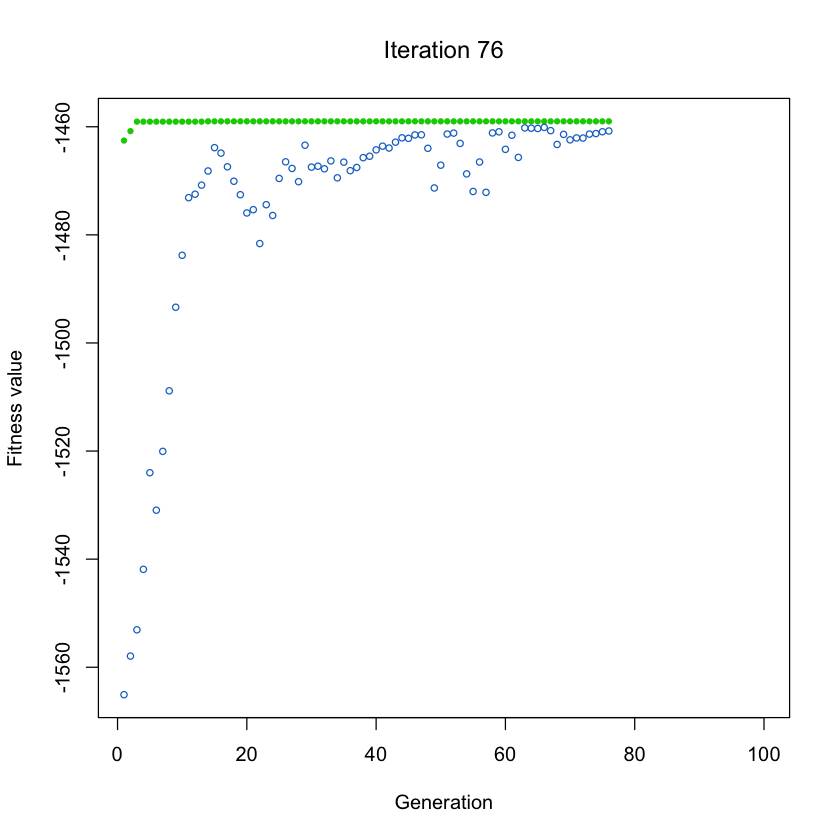

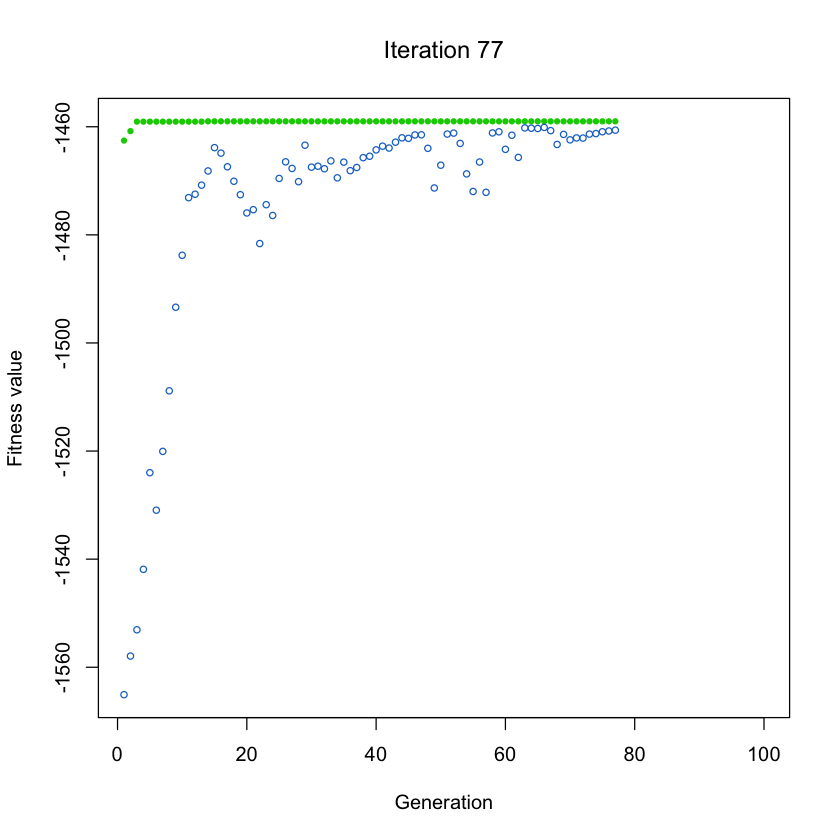

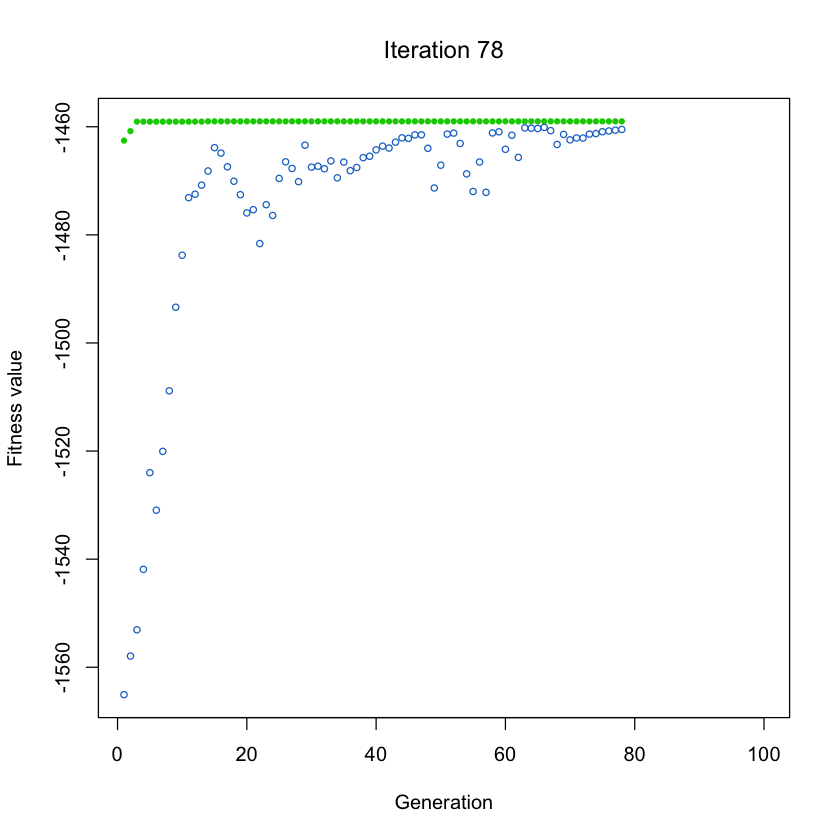

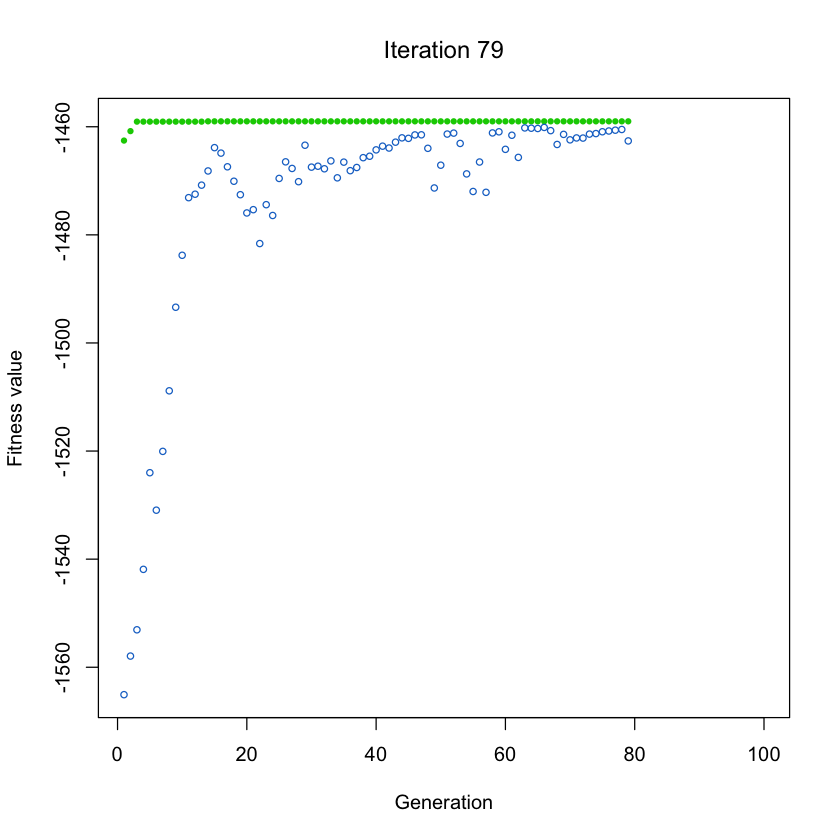

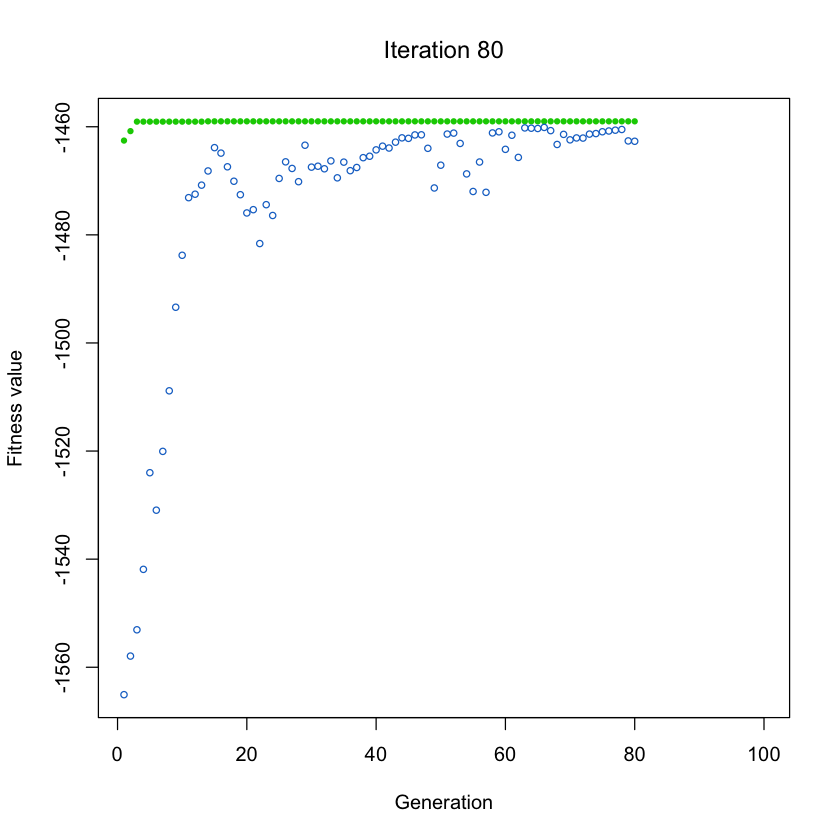

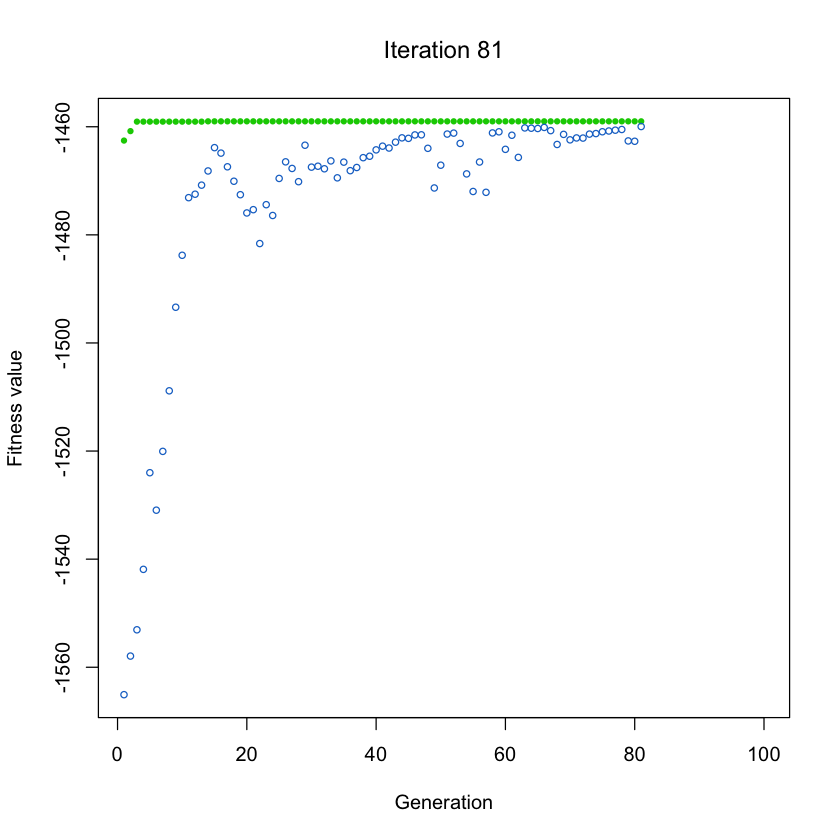

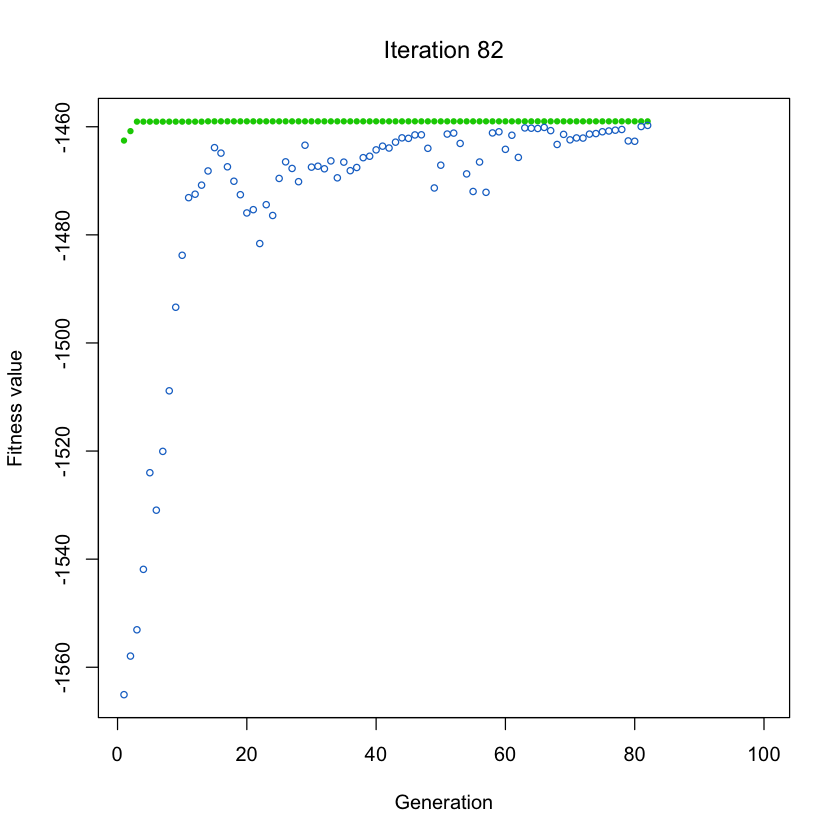

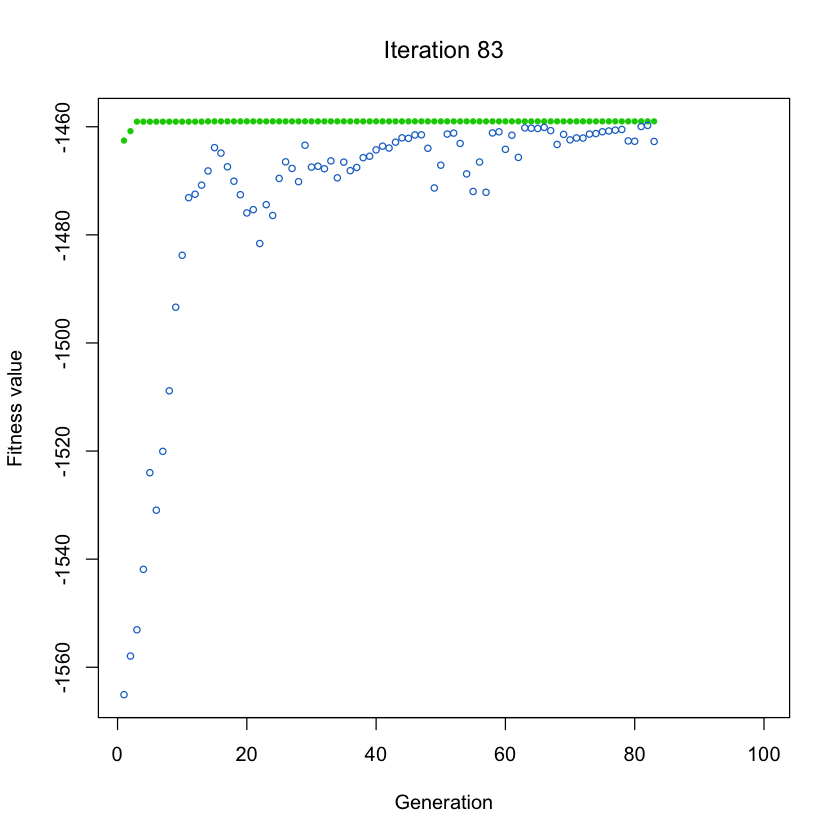

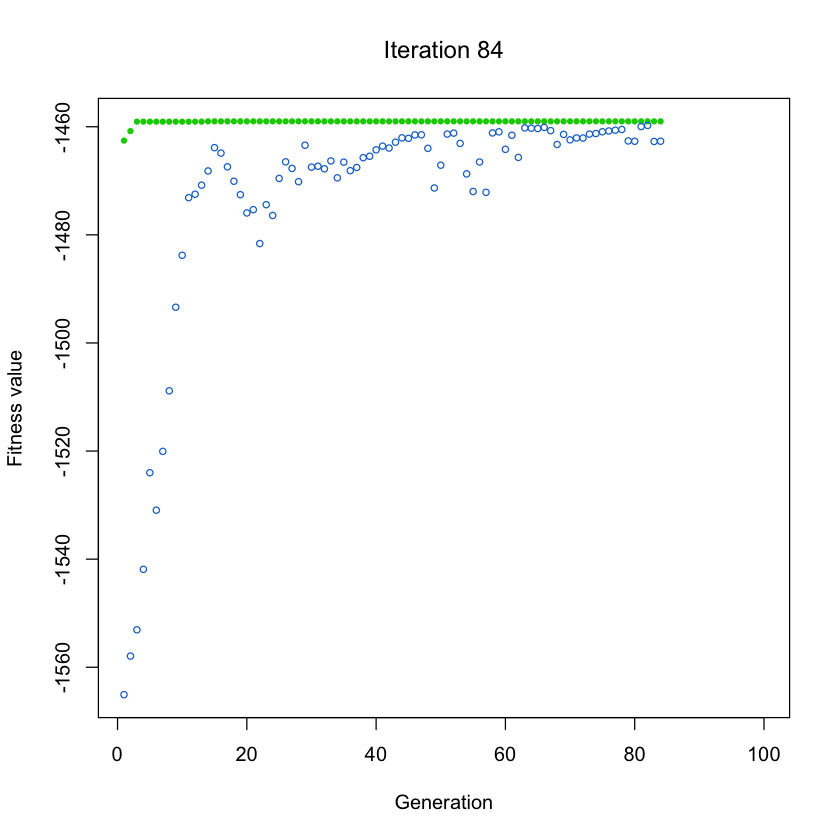

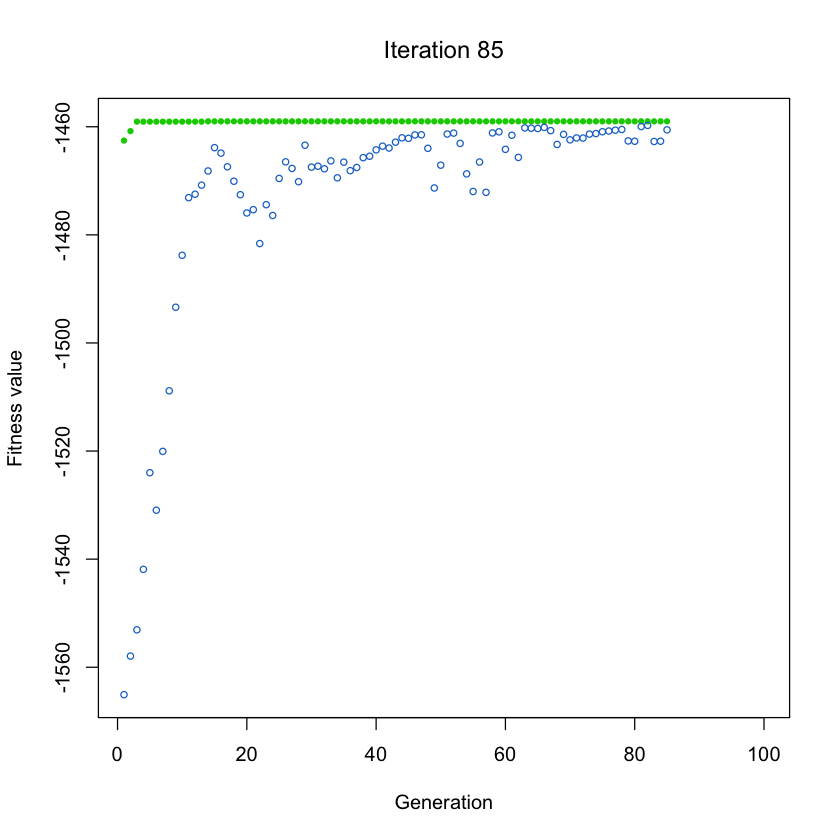

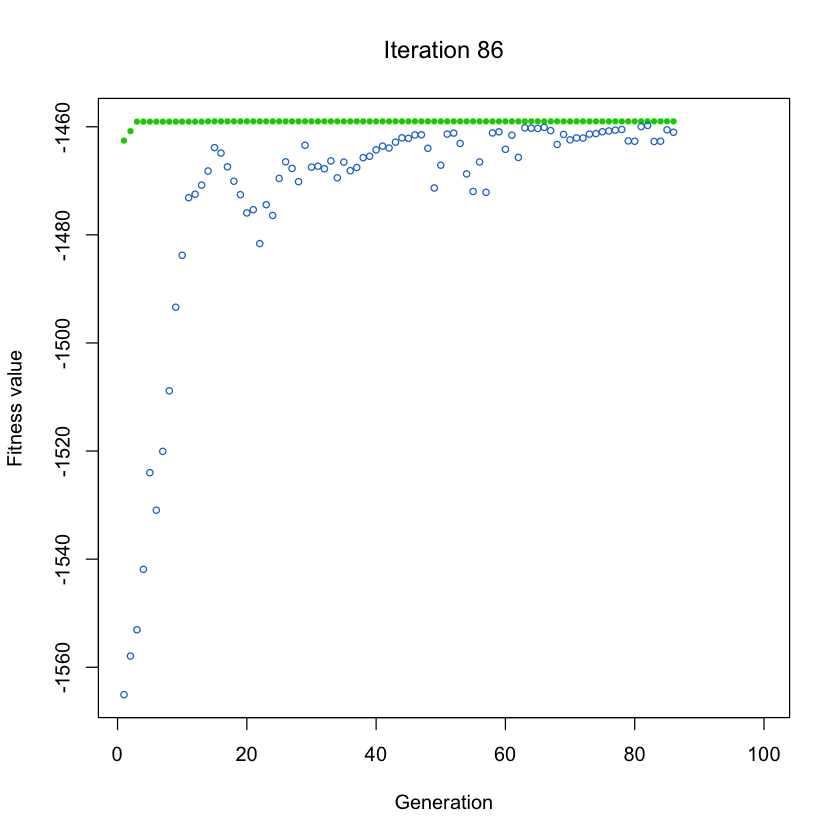

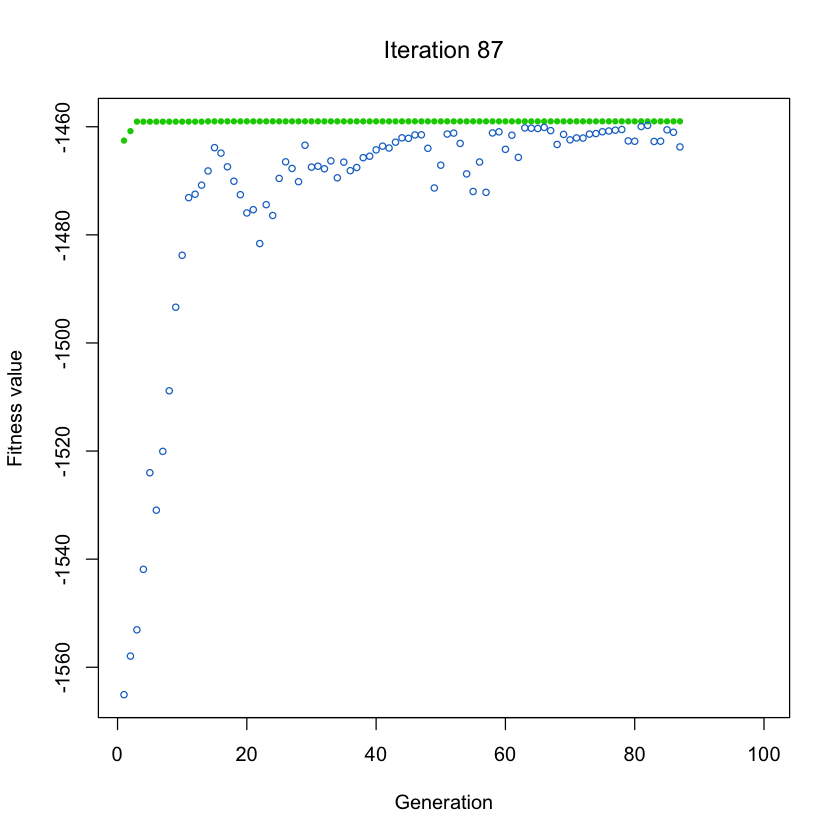

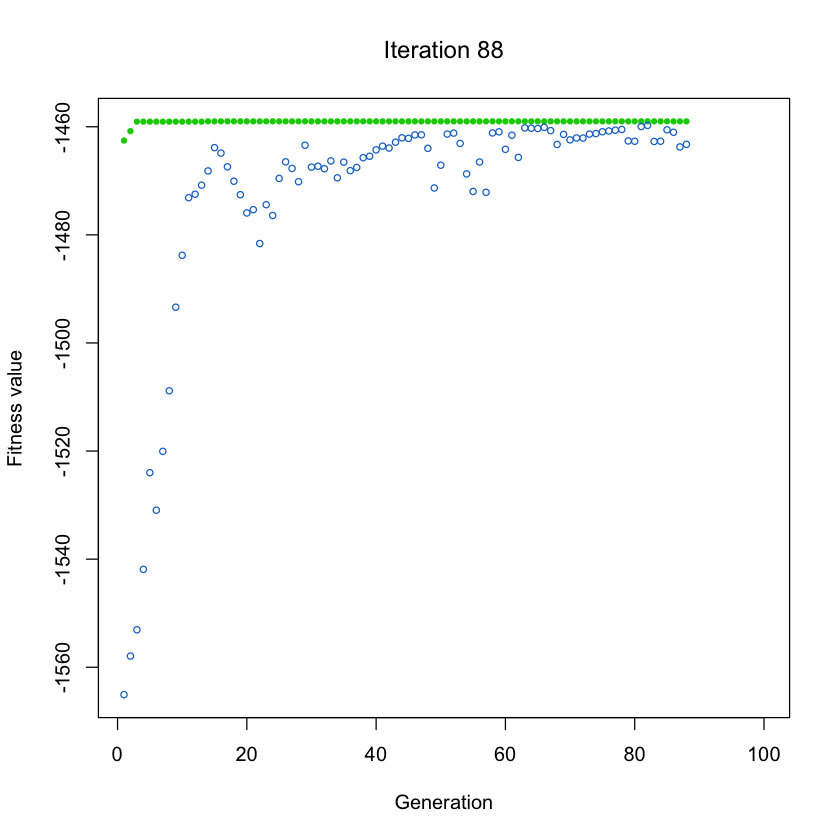

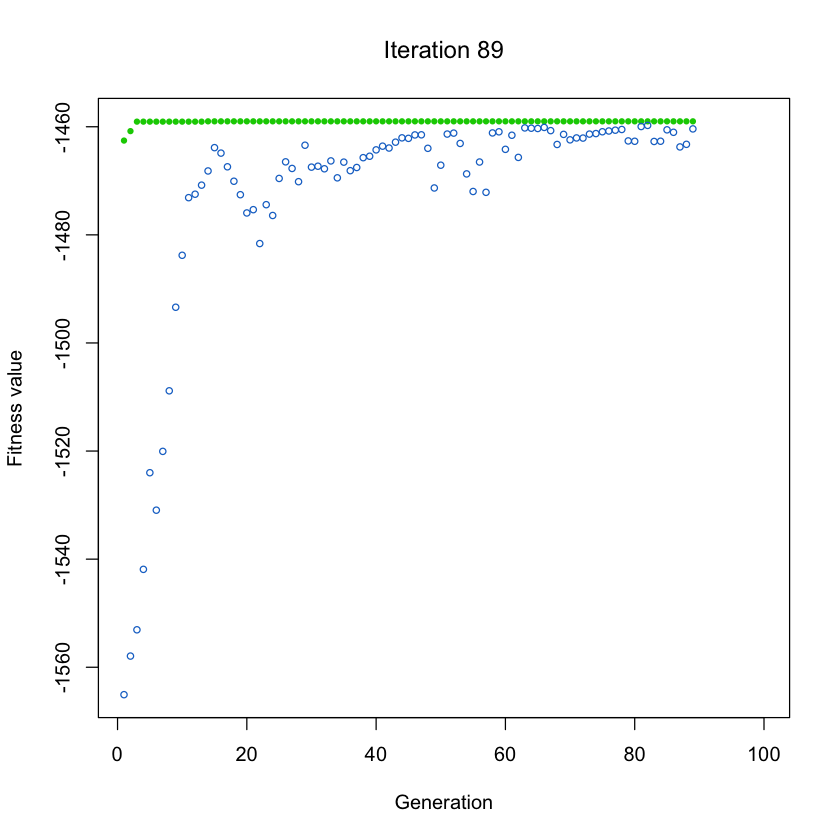

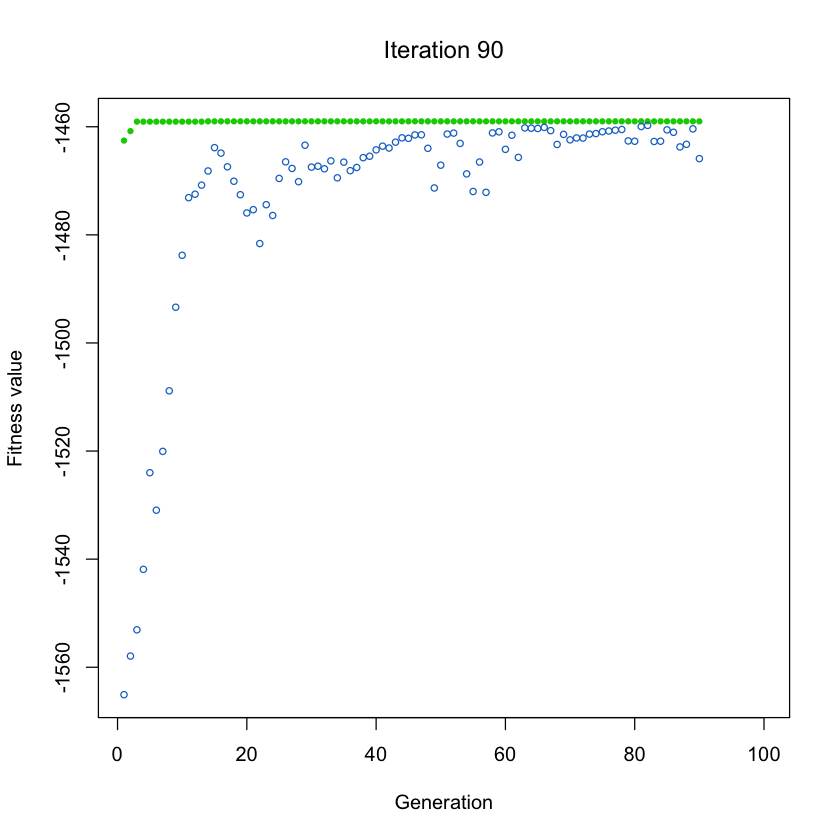

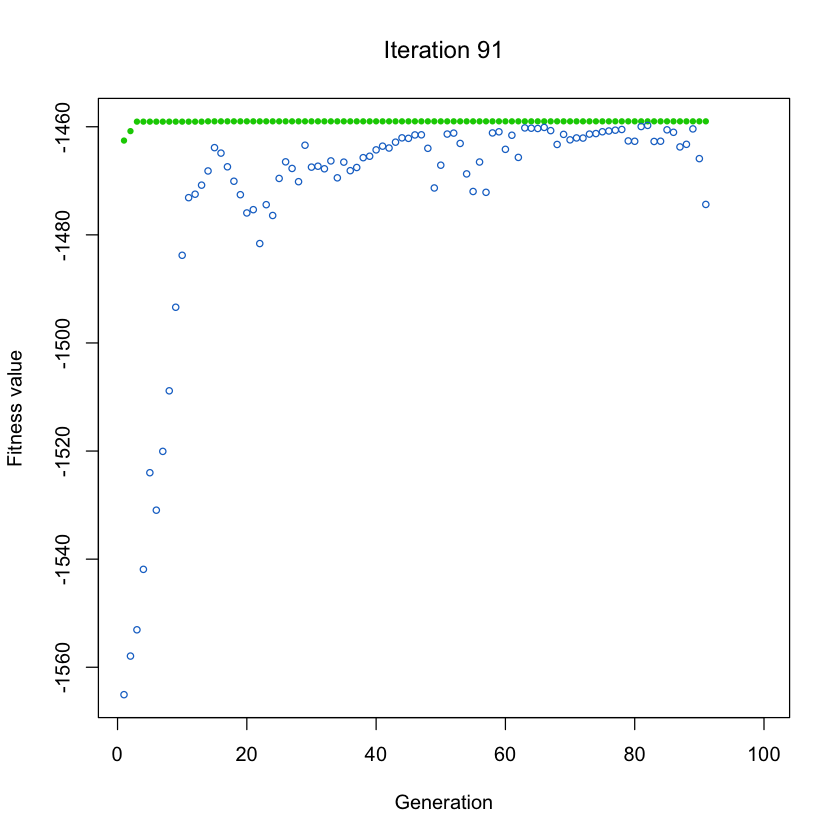

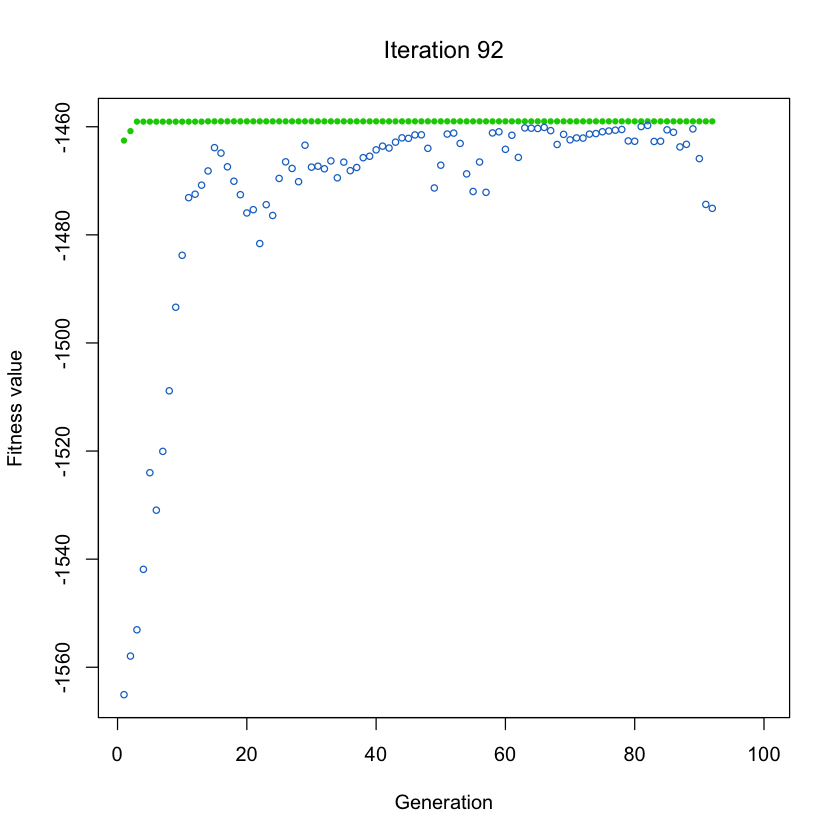

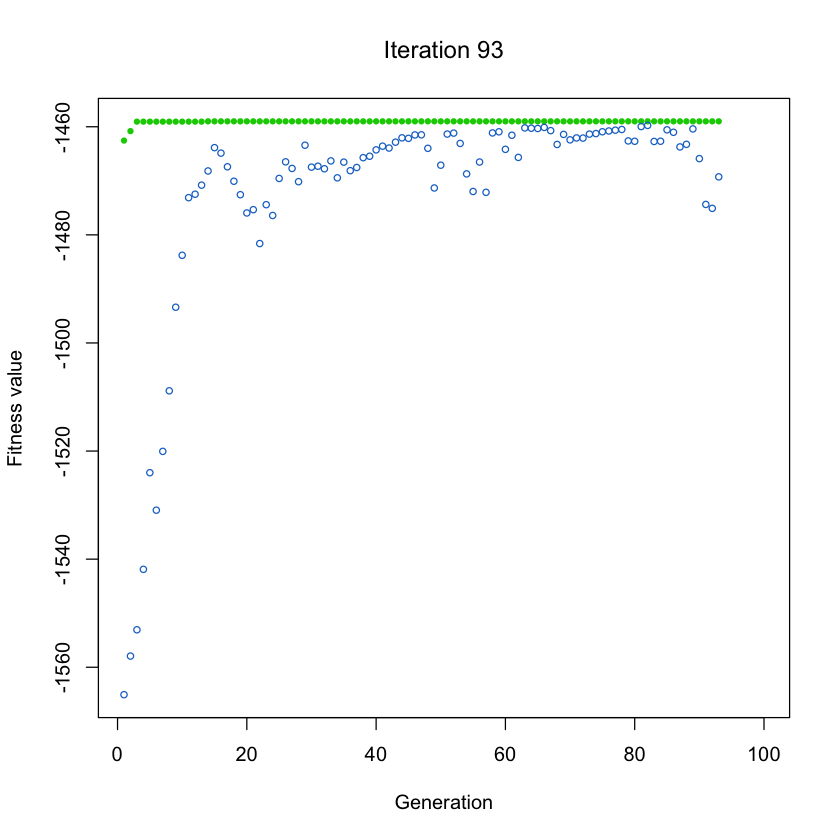

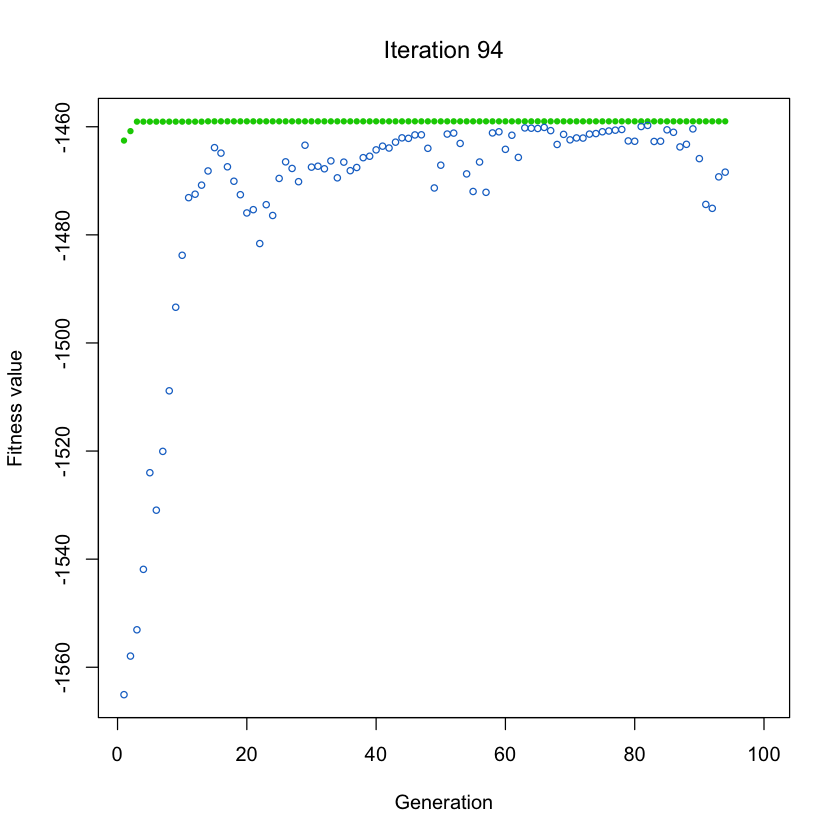

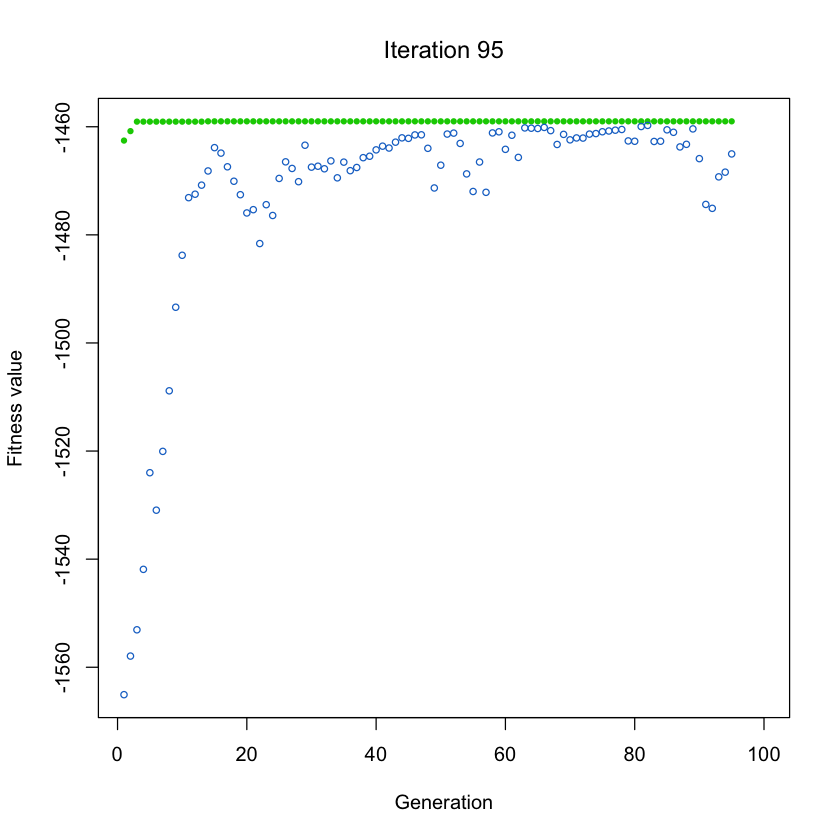

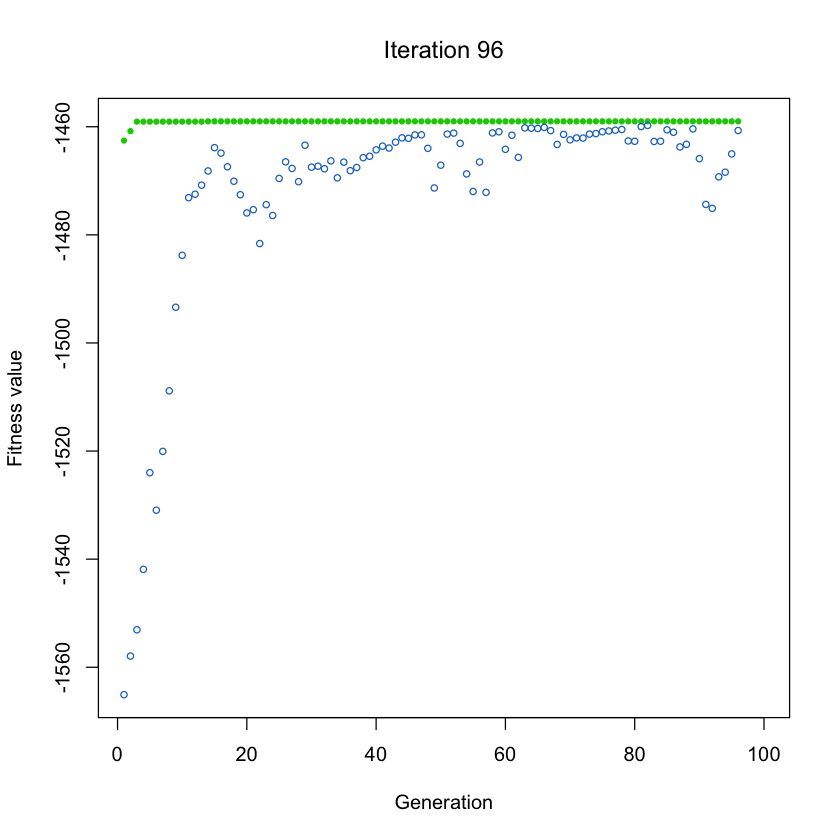

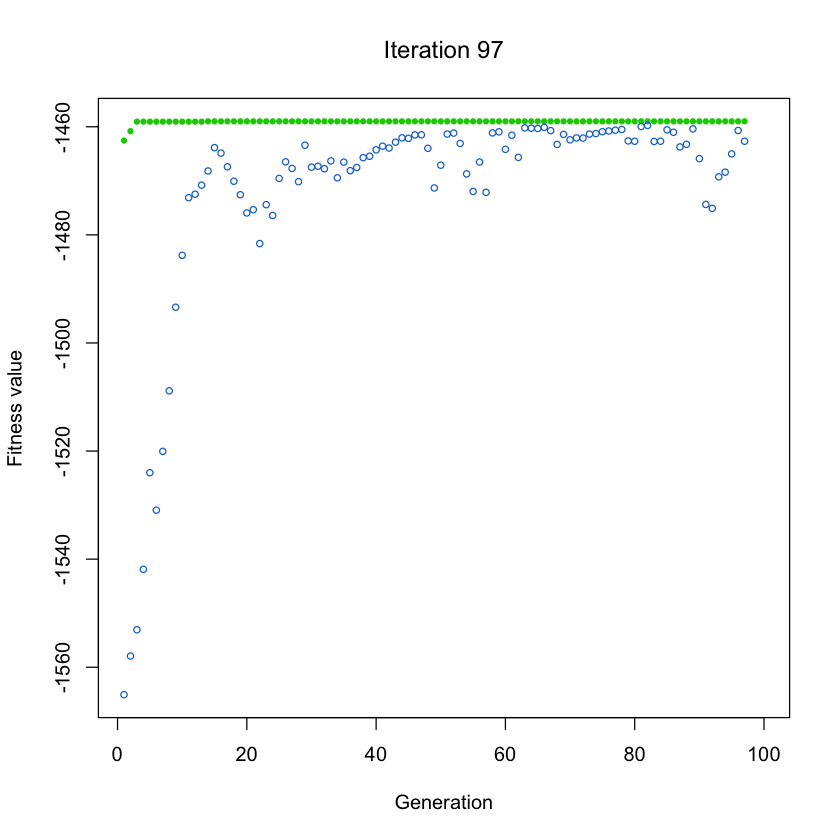

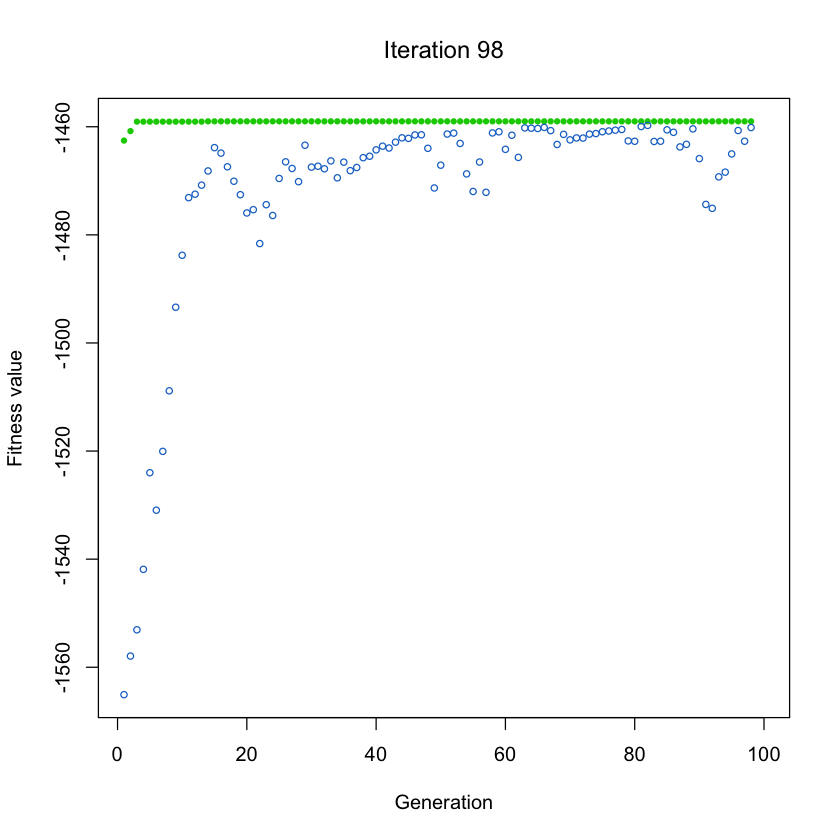

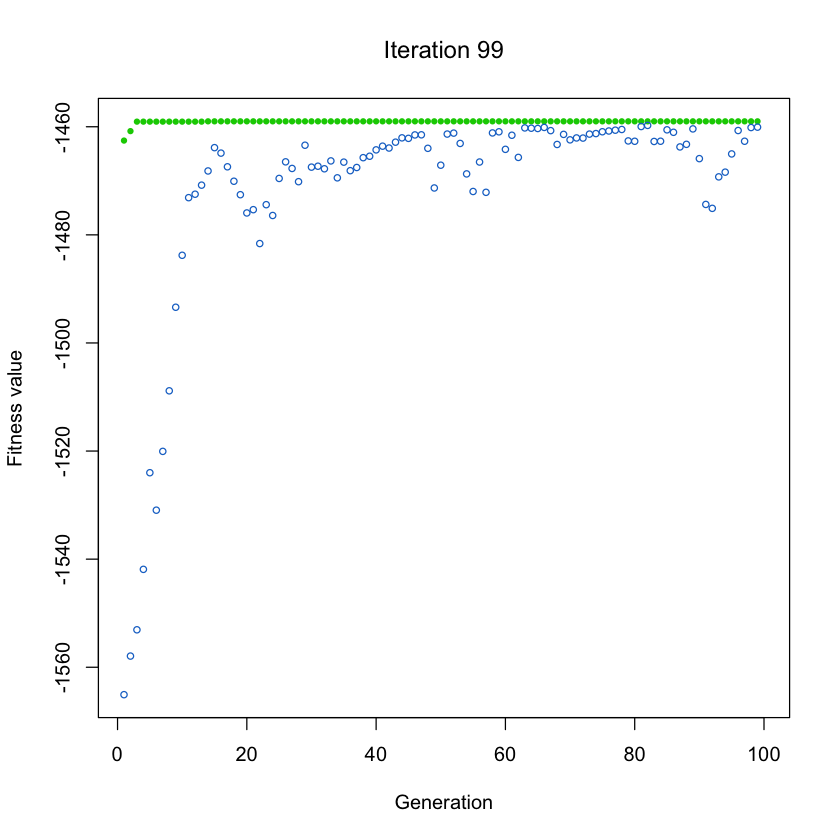

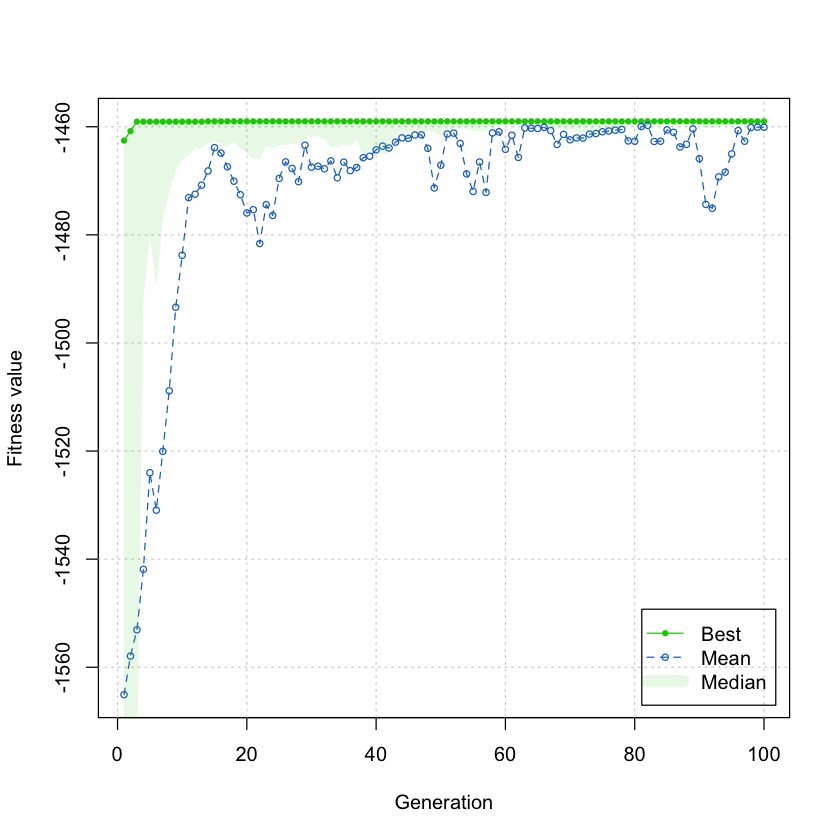

In [16]:
GA4 <- ga("binary", fitness = fitness, nBits = ncol(x),
         names = colnames(x), monitor = plot)
plot(GA4)

In [17]:
summary(GA4)

─ Genetic Algorithm ────────── 

GA settings: 
Type                  =  binary 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.8 
Mutation probability  =  0.1 

GA results: 
Iterations             = 100 
Fitness function value = -1458.996 
Solution = 
     age weight height neck chest abdomen hip thigh knee ankle bicep forearm
[1,]   1      1      0    1     0       1   1     1    0     0     0       1
     wrist
[1,]     1

# 順列型
## 巡回セールスマン問題

In [18]:
# 巡回セールスマン問題(p30)の例題を取ってくる
data("eurodist", package = "datasets")
D <- as.matrix(eurodist)
D

Athens Barcelona Brussels Calais Cherbourg Cologne Copenhagen
Athens             0   3313      2963     3175   3339      2762    3276      
Barcelona       3313      0      1318     1326   1294      1498    2218      
Brussels        2963   1318         0      204    583       206     966      
Calais          3175   1326       204        0    460       409    1136      
Cherbourg       3339   1294       583      460      0       785    1545      
Cologne         2762   1498       206      409    785         0     760      
Copenhagen      3276   2218       966     1136   1545       760       0      
Geneva          2610    803       677      747    853      1662    1418      
Gibraltar       4485   1172      2256     2224   2047      2436    3196      
Hamburg         2977   2018       597      714   1115       460     460      
Hook of Holland 3030   1490       172      330    731       269     269      
Lisbon          4532   1305      2084     2052   1827      2290    2971      
Lyons           2753    645       690      739    789       714    1458      
Madrid          3949    636      1558     1550   1347      1764    2498      
Marseilles      2865    521      1011     1059   1101      1035    1778      
Milan           2282   1014       925     1077   1209       911    1537      
Munich          2179   1365       747      977   1160       583    1104      
Paris           3000   1033       285      280    340       465    1176      
Rome             817   1460      1511     1662   1794      1497    2050      
Stockholm       3927   2868      1616     1786   2196      1403     650      
Vienna          1991   1802      1175     1381   1588       937    1455      
                Geneva Gibraltar Hamburg ⋯ Lisbon Lyons Madrid Marseilles Milan
Athens          2610   4485      2977    ⋯ 4532   2753  3949   2865       2282 
Barcelona        803   1172      2018    ⋯ 1305    645   636    521       1014 
Brussels         677   2256       597    ⋯ 2084    690  1558   1011        925 
Calais           747   2224       714    ⋯ 2052    739  1550   1059       1077 
Cherbourg        853   2047      1115    ⋯ 1827    789  1347   1101       1209 
Cologne         1662   2436       460    ⋯ 2290    714  1764   1035        911 
Copenhagen      1418   3196       460    ⋯ 2971   1458  2498   1778       1537 
Geneva             0   1975      1118    ⋯ 1936    158  1439    425        328 
Gibraltar       1975      0      2897    ⋯  676   1817   698   1693       2185 
Hamburg         1118   2897         0    ⋯ 2671   1159  2198   1479       1238 
Hook of Holland  895   2428       550    ⋯ 2280    863  1730   1183       1098 
Lisbon          1936    676      2671    ⋯    0   1178   668   1762       2250 
Lyons            158   1817      1159    ⋯ 1178      0  1281    320        328 
Madrid          1439    698      2198    ⋯  668   1281     0   1157       1724 
Marseilles       425   1693      1479    ⋯ 1762    320  1157      0        618 
Milan            328   2185      1238    ⋯ 2250    328  1724    618          0 
Munich           591   2565       805    ⋯ 2507    724  2010   1109        331 
Paris            513   1971       877    ⋯ 1799    471  1273    792        856 
Rome             995   2631      1751    ⋯ 2700   1048  2097   1011        586 
Stockholm       2068   3886       949    ⋯ 3231   2108  3188   2428       2187 
Vienna          1019   2974      1155    ⋯ 2937   1157  2409   1363        898 
                Munich Paris Rome Stockholm Vienna
Athens          2179   3000   817 3927      1991  
Barcelona       1365   1033  1460 2868      1802  
Brussels         747    285  1511 1616      1175  
Calais           977    280  1662 1786      1381  
Cherbourg       1160    340  1794 2196      1588  
Cologne          583    465  1497 1403       937  
Copenhagen      1104   1176  2050  650      1455  
Geneva           591    513   995 2068      1019  
Gibraltar       2565   1971  2631 3886      2974  
Hamburg          805    877  1

In [19]:
tourLength <- function(tour, distMatrix) {
    tour <- c(tour, tour[1])
    route <- embed(tour, 2)[,2:1]
    sum(distMatrix[route])
}
tspFitness <- function(tour, ...) 1/tourLength(tour, ...)
GA5 <- ga(type = "permutation", fitness = tspFitness, distMatrix = D,
         min = 1, max = attr(eurodist, "Size"), popSize = 50, maxiter = 5000,
         run = 500, pmutation = 0.2)
summary(GA5)

Warning message in ga(type = "permutation", fitness = tspFitness, distMatrix = D, :
“'min' arg is deprecated. Use 'lower' instead.”Warning message in ga(type = "permutation", fitness = tspFitness, distMatrix = D, :
“'max' arg is deprecated. Use 'upper' instead.”

─ Genetic Algorithm ────────── 

GA settings: 
Type                  =  permutation 
Population size       =  50 
Number of generations =  5000 
Elitism               =  2 
Crossover probability =  0.8 
Mutation probability  =  0.2 

GA results: 
Iterations             = 1517 
Fitness function value = 7.576906e-05 
Solutions = 
     x1 x2 x3 x4 x5 x6 x7 x8 x9 x10  ...  x20 x21
[1,] 11  7 20 10  6  3  4  5 18  15        21  17
[2,]  6  3  4  5 18 15  2 14  9  12        20  10

In [20]:
apply(GA5@solution, 1, tourLength, D)

[1] 13198 13198

# 整数型

GAのこのパッケージには基本的に整数型はありません。  
使いたいなら、もうちょい拡張性の高いパッケージを使えばいいだけの話なのですが、これにはないです。そして、あんまし色々パッケージを使うのは、インフラ上めんどいので、練習も兼ねてこのパッケージで実装する方法を考えてみます。
### ここでは、例としてナップサック問題で、複数個取れる状況を考えてみます。 

## バイナリ版

まず、バイナリ型で解くことを考えてみます。  
この場合、単純に考えれば、全く同じ値段、重さのものをもう一個加えるとすればいいでしょう。しかし、これは効率が悪いです。なぜなら、こう考えると、一個目を取るor取らないで0か1,もう一個もとる取らないで0か1で、結局0~2までの値を取ることしかできません。しかし、バイナリで2つの染色体を使うのであれば、2進法で0~3までの値を表現できます。  染色体が3つになれば、前者は0~3までしか取れませんが、2進法で表現すれば、0~7までの値を表現することができます。  
  
これで見えてきました。  
__バイナリ型の染色体を複数使って2進法でそれを一つの数字とみなしてやれば、整数型を実装できそうです__

しかし、2進法で表現するのはあまりよくない点があります。いわゆるハミング距離で考えると微妙です。ハミング距離とは、長さの等しい2つの文字列において、対応するいちにあって値が異なる文字の個数です。下の例をみてください。

<img src='IMG_0357.jpg'>

つまりは、0111と、1000は7と8で近い数なのに、表現としては大きく文字列が変わってしまいます。差と2進数でのハミング距離の組み合わせが様々になっていて、GAでの探索時に不都合が出ることが多いです。  
そこでグレイコードを使用します。  
グレイコードでは　上下に隣り合うものはいずれも値が異なるビットは1つのみであることがわかります。

<img src='IMG_0358.jpg'>

2進数とグレイコードの変換  
参考 : https://en.wikipedia.org/wiki/Gray_code

In [21]:
BinaryToGray <- function(vec){
    # 2進数(ベクトル表現)をグレイコードに変換する。
    
    # 頭に0をつけて、一個右にズラす。
    mask <- c(0,vec[0:(length(vec)-1)]) 
    # ビットの排他的論理和を取るとグレイコードになる。
    
    return ( bitwXor(vec,mask) )
}

In [22]:
BinaryToGray(c(1,0,1,1))

[1] 1 1 1 0

In [23]:
GrayToBinary <- function(vec){
    # グレイコード(ベクトル表現)を2進数に変換する
    
    # 最上位の数と次の桁の数の排他的論理和を取って
    # その値と次の位の数の排他的論理和を取ってを繰り返す。
    mask <- c(0,vec[0:(length(vec)-1)]) 
    for (i in 1:length(vec)){
        vec <- bitwXor(vec,mask)
        mask <- c(0,mask[0:(length(mask)-1)])
    }
    return (vec)
}

In [24]:
GrayToBinary(c(1,1,1,0))

[1] 1 0 1 1

10進数と2進数の変換

In [25]:
# Rにはパッケージをインストールしないと10進数からの2進数はないので実装します。

DecimalToBinary <- function(p_number) {
    
    # 10進数を2進数のベクトルにする
    
    bsum <- 0
    bexp <- 1
    while (p_number > 0) {
        digit <- p_number %% 2
        p_number <- floor(p_number / 2)
        bsum <- bsum + digit * bexp
        bexp <- bexp * 10
    }
    # bsumに2進数が入るのでベクトル表現にする。
    chara <- as.character(bsum)
    return(as.numeric(unlist(strsplit(chara,''))))
}


In [26]:
DecimalToBinary(14)

[1] 1 1 1 0

In [27]:
BinaryToDecimal <- function(b_number){
    
    # 2進数のベクトルを10進数にする
    # 1つの数値の場合(エラー対応)
    if (length(b_number)==1){
        # 2進数からの10進数は標準搭載
        return (strtoi(b_number, base=2) )
    } else{
        # ベクトルを数値化
        num <- as.numeric(paste(as.character(b_number),collapse=""))
        return (strtoi(num, base=2))
    }
}

In [28]:
BinaryToDecimal(c(1,1,1,0))

[1] 14

ナップサック問題で、どれも1~3個目は3つまで、4,5個目は5個、6,7個目は1つ取れるとします。解いてみましょう。

In [29]:
# 4.7. Constrained optimization(p27)
# ナップサック問題
p <- c(6, 5, 8, 9, 6, 7, 3)  # price list
w <- c(2, 3, 6, 7, 5, 9, 4)  # weight list
W <- 32  # maximum weight capacity

In [30]:
test <- c(1,0,0,0,1,1,1,0,0,0,1,1,1,1)

In [31]:
knapsack2 <- function(x){
    # ベクトルを分解する
    one <- BinaryToDecimal(GrayToBinary(x[1:2]))  # 1つ目
    two <- BinaryToDecimal(GrayToBinary(x[3:4])) # 2つ目
    three <- BinaryToDecimal(GrayToBinary(x[5:6]))  # 3つ目
    four <- BinaryToDecimal(GrayToBinary(x[7:9]))  # 4つ目
    five <- BinaryToDecimal(GrayToBinary(x[10:12]))  # 5つ目
    x_vec <- c(one,two,three,four,five,x[13],x[14])  # 個数のベクトル化
    
    f <- sum(x_vec * p)
    if ((four > 5) | (five > 5)){
        penalty <- 1e+15
    }else{
        penalty <- sum(w) * abs(sum(x_vec*w)-W)
    }
    f - penalty
}

In [32]:
nBit = length(w)+3+2*2
GA6 <- ga(type = "binary", fitness = knapsack2, nBits = nBit,
         maxiter = 1000, run = 200, popSize = 50)

summary(GA6)

─ Genetic Algorithm ────────── 

GA settings: 
Type                  =  binary 
Population size       =  50 
Number of generations =  1000 
Elitism               =  2 
Crossover probability =  0.8 
Mutation probability  =  0.1 

GA results: 
Iterations             = 201 
Fitness function value = 54 
Solution = 
     x1 x2 x3 x4 x5 x6 x7 x8 x9 x10  ...  x13 x14
[1,]  1  0  1  1  0  1  0  1  1   0         0   0

In [33]:
answer <- GA6@solution

In [34]:
conversion <- function(x){
    # ベクトルを分解する
    one <- BinaryToDecimal(GrayToBinary(x[1:2]))  # 1つ目
    two <- BinaryToDecimal(GrayToBinary(x[3:4])) # 2つ目
    three <- BinaryToDecimal(GrayToBinary(x[5:6]))  # 3つ目
    four <- BinaryToDecimal(GrayToBinary(x[7:9]))  # 4つ目
    five <- BinaryToDecimal(GrayToBinary(x[10:12]))  # 5つ目
    x_vec <- c(one,two,three,four,five,x[13],x[14])  # 個数のベクトル化
    return(x_vec)
}

In [35]:
conversion(answer)

[1] 3 2 1 2 0 0 0

## 実数版

実数型のGAの方法を考えてみると、交差では2つの値の間(外もだけど)の解を探しているだけなので、実数値で出てきたものを四捨五入とか切り捨てとかでやっても大丈夫なんじゃないか？という発想が湧いてきます。実際、GAの場合はまずまず大丈夫です。普通の最適化計算ではこのようなやり方は禁じ手なのですが、GAの場合はまあまあいけます。素晴らしいですね。交差等の仕方にもよりますが、四捨五入がいいのではと思います。やってみましょう。

In [36]:
# ナップサック問題
p <- c(6, 5, 8, 9, 6, 7, 3)  # price list
w <- c(2, 3, 6, 7, 5, 9, 4)  # weight list
W <- 32  # maximum weight capacity

In [37]:
knapsack3 <- function(x1,x2,x3,x4,x5,x6,x7){
    # 四捨五入する
    x1 = round(x1,digits=0)
    x2 = round(x2,digits=0)
    x3 = round(x3,digits=0)
    x4 = round(x4,digits=0)
    x5 = round(x5,digits=0)
    x6 = round(x6,digits=0)
    x7 = round(x7,digits=0)
    x_vec = c(x1,x2,x3,x4,x5,x6,x7)
    f <- sum(x_vec * p)
    penalty <- sum(w) * abs(sum(x_vec*w)-W)
    f - penalty
}

In [43]:
GA7 <- ga(type = "real-valued", fitness = function(x){knapsack3(x[1], x[2],x[3], x[4],x[5], x[6],x[7])},
         lower = c(0,0,0,0,0,0,0), upper = c(3,3,3,5,5,1,1),
         popSize = 50, maxiter = 1000, run = 200)

In [44]:
summary(GA7)

─ Genetic Algorithm ────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  1000 
Elitism               =  2 
Crossover probability =  0.8 
Mutation probability  =  0.1 
Search domain = 
      x1 x2 x3 x4 x5 x6 x7
lower  0  0  0  0  0  0  0
upper  3  3  3  5  5  1  1

GA results: 
Iterations             = 218 
Fitness function value = 52 
Solutions = 
           x1       x2      x3       x4       x5        x6        x7
[1,] 2.517085 1.223455 1.23093 1.494513 1.504592 0.2377266 0.4035117
[2,] 2.517085 1.223455 1.23093 1.494513 1.504592 0.2590764 0.4035117

In [45]:
# 同じ適応度関数のものがたくさん出てくるので適当に一つ
answer2 <- as.vector(GA7@solution[1,])

In [46]:
round(answer2,digits=0)

[1] 3 1 1 1 2 0 0

やるとわかりますが、やはり四捨五入は微妙です。(そりゃそうだ)  
何度かやってもバイナリでやったやつの方がいい答えにたどり着く確率が高いのがわかると思います。  
しかし、実数型のなかに四捨五入しなきゃいけないものがあっても割と使えるよ、というのは驚くべきことです。